In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis



# About Dataset
This dataset is curated for those who are interested in predicting Bitcoin prices using historical data. It contains comprehensive information on Bitcoin's market behavior over time, including daily prices, trading volumes, and other relevant financial indicators. This dataset can be used to develop and test predictive models, analyze trends, and gain insights into the cryptocurrency market.

# Features:
- **Date**: The date corresponding to each entry.
- **Open**: The opening price of Bitcoin for the given date.
- **High**: The highest price reached by Bitcoin on the given date.
- **Low**: The lowest price reached by Bitcoin on the given date.
- **Close**: The closing price of Bitcoin for the given date.
- **Volume**: The total volume of Bitcoin traded on the given date.
- **Market Cap**: The total market capitalization of Bitcoin on the given date.
- **Adjusted Close**: The closing price adjusted for any dividends or stock splits.

## Usage:
This dataset can be used for various purposes, including:

- **Time Series Analysis**: Understanding how Bitcoin prices fluctuate over time.
- **Predictive Modeling**: Building models to predict future prices based on historical data.
- **Market Research**: Analyzing trends and patterns in the cryptocurrency market.


In [2]:
df = pd.read_csv("./archive/bitcoin_price_Training - Training.csv")
df_test = pd.read_csv("./archive/BTC-USD(1).csv")

# For Now look at how the data really is in csv Files

In [3]:
df.head()

Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000

In [4]:
df_test.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

# df will be use for dataframe for training and df_test for trsting purposes Now on


In [5]:
df.shape

(1556, 7)

In [6]:
df_test.shape

(2747, 7)

# Checking on thr df for some time from now on


In [7]:
df.shape

(1556, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df.describe()

Open         High          Low        Close
count  1556.000000  1556.000000  1556.000000  1556.000000
mean    582.625328   597.992847   567.851446   584.239396
std     523.137312   542.992855   505.877401   525.904442
min      68.500000    74.560000    65.530000    68.430000
25%     254.287500   260.327500   248.835000   254.320000
50%     438.600000   447.560000   430.570000   438.855000
75%     662.437500   674.525000   646.735000   663.402500
max    2953.220000  2999.910000  2840.530000  2958.110000

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [12]:
for i in df:
    print (df[i])

0       Jul 31, 2017
1       Jul 30, 2017
2       Jul 29, 2017
3       Jul 28, 2017
4       Jul 27, 2017
            ...     
1551    May 02, 2013
1552    May 01, 2013
1553    Apr 30, 2013
1554    Apr 29, 2013
1555    Apr 28, 2013
Name: Date, Length: 1556, dtype: object
0       2763.24
1       2724.39
2       2807.02
3       2679.73
4       2538.71
         ...   
1551     116.38
1552     139.00
1553     144.00
1554     134.44
1555     135.30
Name: Open, Length: 1556, dtype: float64
0       2889.62
1       2758.53
2       2808.76
3       2897.45
4       2693.32
         ...   
1551     125.60
1552     139.89
1553     146.93
1554     147.49
1555     135.98
Name: High, Length: 1556, dtype: float64
0       2720.61
1       2644.85
2       2692.80
3       2679.73
4       2529.34
         ...   
1551      92.28
1552     107.72
1553     134.05
1554     134.00
1555     132.10
Name: Low, Length: 1556, dtype: float64
0       2875.34
1       2757.18
2       2726.45
3       2809.01
4       2671.78

# By looking at Datasest thoroughly you will come to know that Volumn does not null as shown above but contian - which is unrequired value for calculation so getting rid of it


In [13]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [14]:
volumeDf = df["Volume"] 
print(volumeDf.head)
print(volumeDf.tail)

<bound method NDFrame.head of 0         860,575,000
1         705,943,000
2         803,746,000
3       1,380,100,000
4         789,104,000
            ...      
1551                -
1552                -
1553                -
1554                -
1555                -
Name: Volume, Length: 1556, dtype: object>
<bound method NDFrame.tail of 0         860,575,000
1         705,943,000
2         803,746,000
3       1,380,100,000
4         789,104,000
            ...      
1551                -
1552                -
1553                -
1554                -
1555                -
Name: Volume, Length: 1556, dtype: object>


# Replacing the unwanted - by simple maths 


In [15]:
df["Volume"] = df["Volume"].replace("-",np.nan)
df["Market Cap"] = df["Market Cap"].replace("-",np.nan)

In [16]:
df["Volume"].head
df["Volume"].tail


<bound method NDFrame.tail of 0         860,575,000
1         705,943,000
2         803,746,000
3       1,380,100,000
4         789,104,000
            ...      
1551              NaN
1552              NaN
1553              NaN
1554              NaN
1555              NaN
Name: Volume, Length: 1556, dtype: object>

In [17]:
df["Market Cap"].head
df["Market Cap"].tail

<bound method NDFrame.tail of 0       45,535,800,000
1       44,890,700,000
2       46,246,700,000
3       44,144,400,000
4       41,816,500,000
             ...      
1551     1,292,190,000
1552     1,542,820,000
1553     1,597,780,000
1554     1,491,160,000
1555     1,500,520,000
Name: Market Cap, Length: 1556, dtype: object>

# converting the strings to numbers by removing the foramtted commas there

In [18]:
df["Volume"] = df["Volume"].str.replace(",","").astype(float)
df["Market Cap"] = df["Market Cap"].str.replace(",","").astype(float)

In [19]:
df["Volume"].head
df["Volume"].tail

<bound method NDFrame.tail of 0       8.605750e+08
1       7.059430e+08
2       8.037460e+08
3       1.380100e+09
4       7.891040e+08
            ...     
1551             NaN
1552             NaN
1553             NaN
1554             NaN
1555             NaN
Name: Volume, Length: 1556, dtype: float64>

In [20]:
df["Market Cap"].head
df["Market Cap"].tail

<bound method NDFrame.tail of 0       4.553580e+10
1       4.489070e+10
2       4.624670e+10
3       4.414440e+10
4       4.181650e+10
            ...     
1551    1.292190e+09
1552    1.542820e+09
1553    1.597780e+09
1554    1.491160e+09
1555    1.500520e+09
Name: Market Cap, Length: 1556, dtype: float64>

# Task3 of internships starts from here on
### => descriptive statistics
### => Outlier and skewness Identification
### => Visualization


In [21]:
df.describe()

Open         High          Low        Close        Volume  \
count  1556.000000  1556.000000  1556.000000  1556.000000  1.313000e+03   
mean    582.625328   597.992847   567.851446   584.239396  1.481643e+08   
std     523.137312   542.992855   505.877401   525.904442  3.242987e+08   
min      68.500000    74.560000    65.530000    68.430000  2.857830e+06   
25%     254.287500   260.327500   248.835000   254.320000  2.071070e+07   
50%     438.600000   447.560000   430.570000   438.855000  4.530140e+07   
75%     662.437500   674.525000   646.735000   663.402500  9.037880e+07   
max    2953.220000  2999.910000  2840.530000  2958.110000  2.569530e+09   

         Market Cap  
count  1.556000e+03  
mean   8.694353e+09  
std    8.707288e+09  
min    7.792550e+08  
25%    3.598355e+09  
50%    6.386210e+09  
75%    9.898830e+09  
max    4.839120e+10

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1313 non-null   float64
 6   Market Cap  1556 non-null   float64
dtypes: float64(6), object(1)
memory usage: 85.2+ KB


In [23]:
df.head()

Date     Open     High      Low    Close        Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34  8.605750e+08   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18  7.059430e+08   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45  8.037460e+08   
3  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1.380100e+09   
4  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78  7.891040e+08   

     Market Cap  
0  4.553580e+10  
1  4.489070e+10  
2  4.624670e+10  
3  4.414440e+10  
4  4.181650e+10

In [24]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [25]:
df_test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Some visulizations to better understand the concept and relationship between price of bitCoin across various factors 

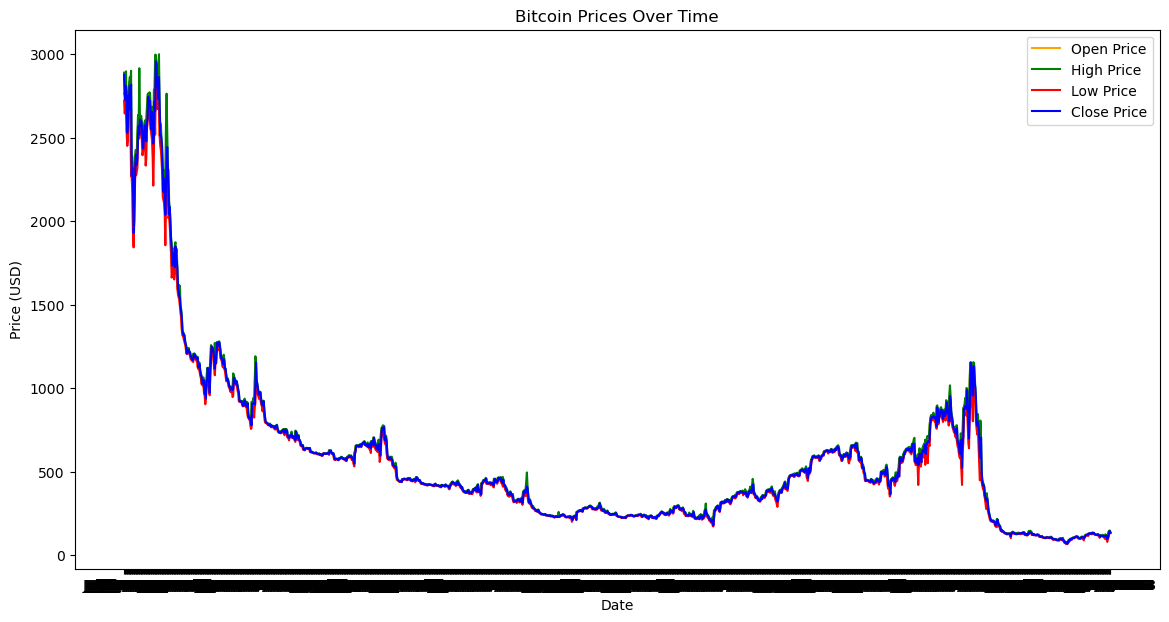

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Open'], label='Open Price', color='orange')
plt.plot(df['Date'], df['High'], label='High Price', color='green')
plt.plot(df['Date'], df['Low'], label='Low Price', color='red')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Prices Over Time')
plt.legend()
plt.show()

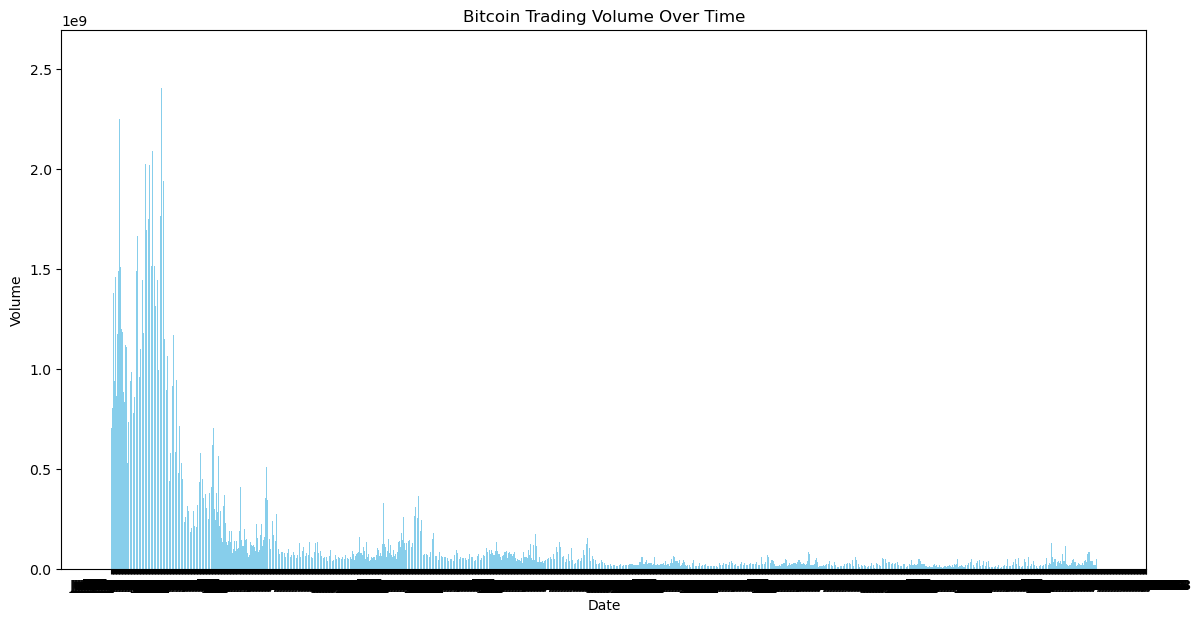

In [27]:
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Volume'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Bitcoin Trading Volume Over Time')
plt.show()


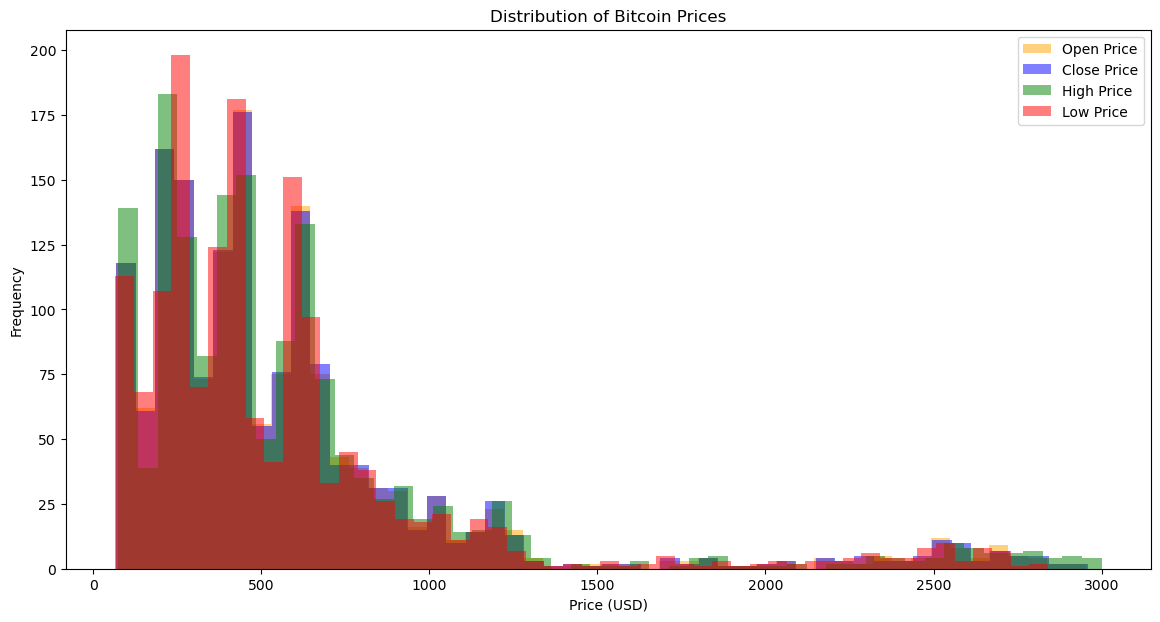

In [28]:
plt.figure(figsize=(14, 7))
plt.hist(df['Open'], bins=50, alpha=0.5, label='Open Price', color='orange')
plt.hist(df['Close'], bins=50, alpha=0.5, label='Close Price', color='blue')
plt.hist(df['High'], bins=50, alpha=0.5, label='High Price', color='green')
plt.hist(df['Low'], bins=50, alpha=0.5, label='Low Price', color='red')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Bitcoin Prices')
plt.legend()
plt.show()


In [29]:

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
              open=df['Open'],
              high=df['High'],
              low=df['Low'],
              close=df['Close'])])
fig.update_layout(title='Bitcoin Candlestick Chart')
fig.show()


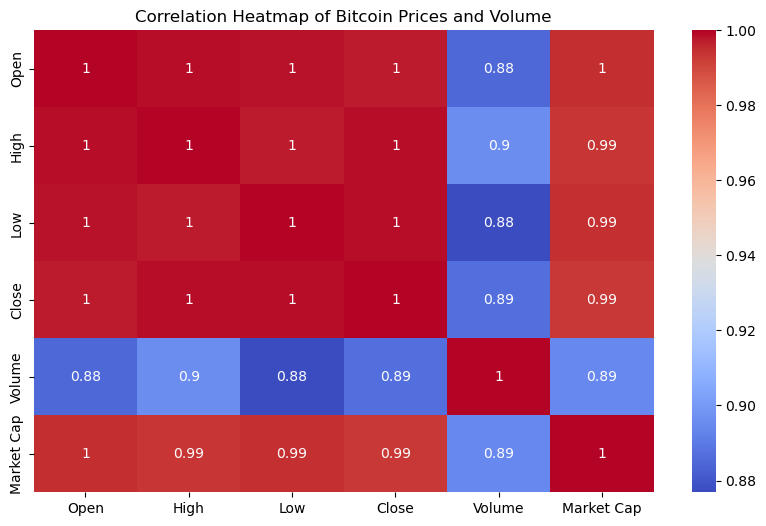

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bitcoin Prices and Volume')
plt.show()


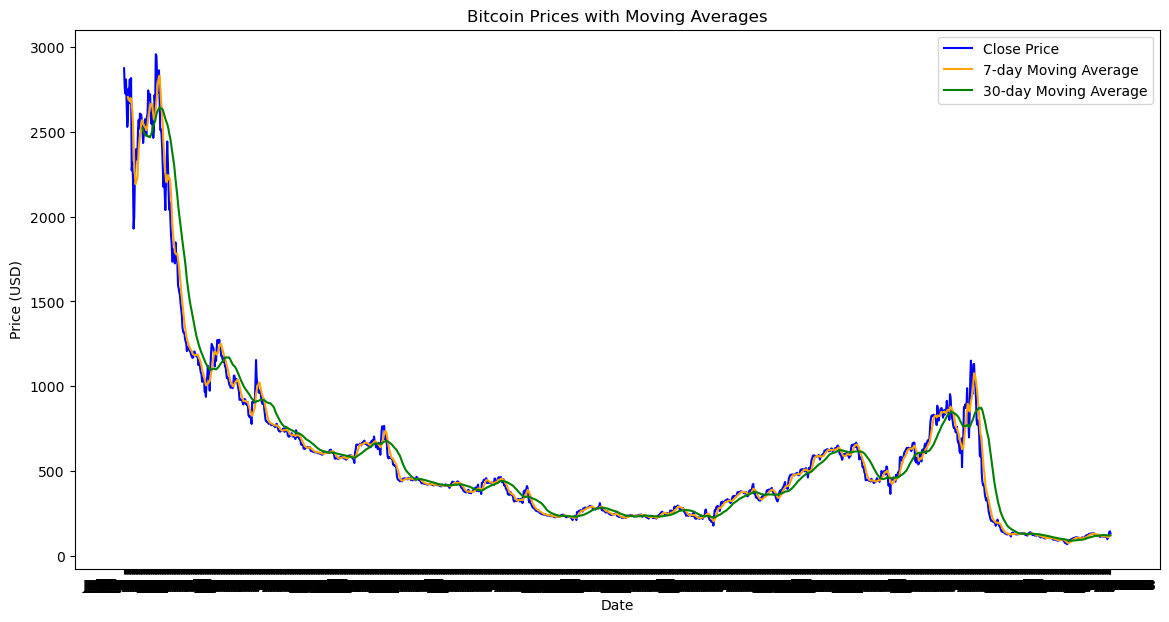

In [31]:
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['7-day MA'], label='7-day Moving Average', color='orange')
plt.plot(df['Date'], df['30-day MA'], label='30-day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Prices with Moving Averages')
plt.legend()
plt.show()


In [32]:
print("next")


next


In [33]:
df.describe()


Open         High          Low        Close        Volume  \
count  1556.000000  1556.000000  1556.000000  1556.000000  1.313000e+03   
mean    582.625328   597.992847   567.851446   584.239396  1.481643e+08   
std     523.137312   542.992855   505.877401   525.904442  3.242987e+08   
min      68.500000    74.560000    65.530000    68.430000  2.857830e+06   
25%     254.287500   260.327500   248.835000   254.320000  2.071070e+07   
50%     438.600000   447.560000   430.570000   438.855000  4.530140e+07   
75%     662.437500   674.525000   646.735000   663.402500  9.037880e+07   
max    2953.220000  2999.910000  2840.530000  2958.110000  2.569530e+09   

         Market Cap     7-day MA    30-day MA  
count  1.556000e+03  1550.000000  1527.000000  
mean   8.694353e+09   580.880057   569.752711  
std    8.707288e+09   516.169285   485.049023  
min    7.792550e+08    74.934286    89.236333  
25%    3.598355e+09   253.566429   260.155000  
50%    6.386210e+09   441.399286   441.283667  
75%    9.898830e+09   657.682500   660.288667  
max    4.839120e+10  2831.060000  2642.308667

In [34]:

skewness = skew(df['Close'])
kurt = kurtosis(df['Close'])


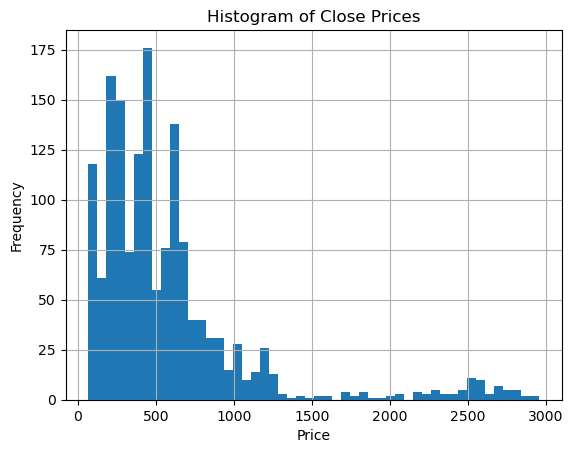

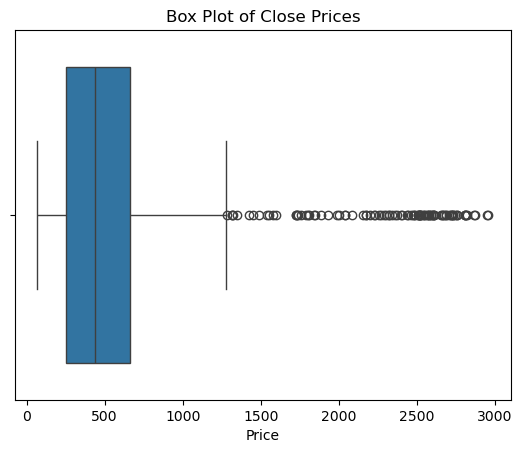

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
df['Close'].hist(bins=50)
plt.title('Histogram of Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
sns.boxplot(x=df['Close'])
plt.title('Box Plot of Close Prices')
plt.xlabel('Price')
plt.show()


# Task4

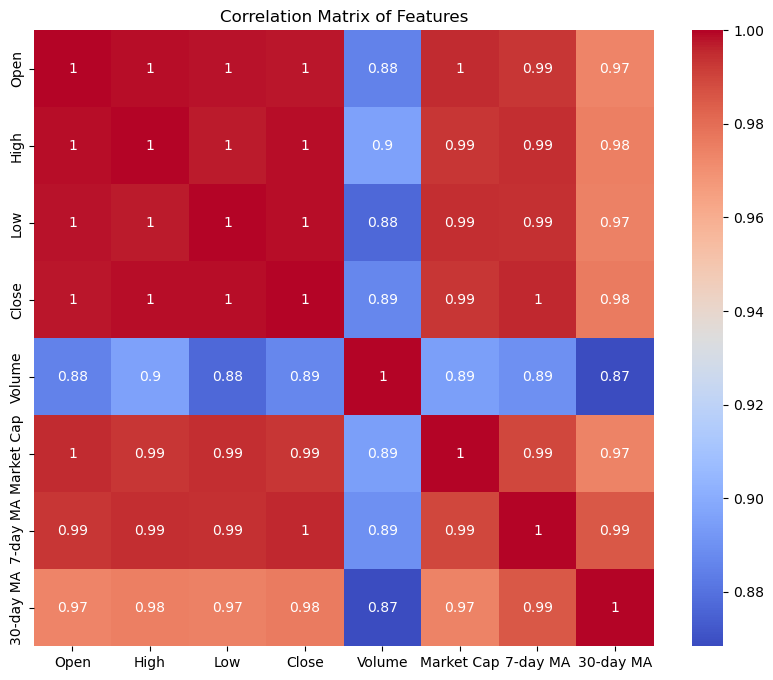

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Date' or any non-numeric columns are excluded
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')  # Use the filtered DataFrame
plt.title('Correlation Matrix of Features')
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Example: Convert 'Date' column to datetime and then to a numeric format (timestamp)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df['Date'] = df['Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)  # Convert to timestamp

# Drop any other non-numeric columns or handle them appropriately
X = df.drop('Close', axis=1).select_dtypes(include=[np.number])  # Keep only numeric columns for X
y = df['Close']

# Handle missing values if there are any after conversion
X.fillna(X.mean(), inplace=True)  # Example: fill missing values with column mean

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Calculate and display feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


            Importance
Date          0.444711
High          0.271817
Market Cap    0.121366
Low           0.120056
Open          0.040550
7-day MA      0.001154
30-day MA     0.000183
Volume        0.000162


In [38]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek


In [39]:
df['Prev_Close'] = df['Close'].shift(1)
df['7_day_avg'] = df['Close'].rolling(window=7).mean()


In [40]:
df['Daily_Return'] = df['Close'].pct_change()
df['Rolling_Volatility'] = df['Close'].rolling(window=30).std()


In [41]:
df.describe()

Date         Open         High          Low  \
count                           1556  1556.000000  1556.000000  1556.000000   
mean   1970-01-01 00:00:01.434283200   582.625328   597.992847   567.851446   
min    1970-01-01 00:00:01.367107200    68.500000    74.560000    65.530000   
25%    1970-01-01 00:00:01.400695200   254.287500   260.327500   248.835000   
50%    1970-01-01 00:00:01.434283200   438.600000   447.560000   430.570000   
75%    1970-01-01 00:00:01.467871200   662.437500   674.525000   646.735000   
max    1970-01-01 00:00:01.501459200  2953.220000  2999.910000  2840.530000   
std                              NaN   523.137312   542.992855   505.877401   

             Close        Volume    Market Cap     7-day MA    30-day MA  \
count  1556.000000  1.313000e+03  1.556000e+03  1550.000000  1527.000000   
mean    584.239396  1.481643e+08  8.694353e+09   580.880057   569.752711   
min      68.430000  2.857830e+06  7.792550e+08    74.934286    89.236333   
25%     254.320000  2.071070e+07  3.598355e+09   253.566429   260.155000   
50%     438.855000  4.530140e+07  6.386210e+09   441.399286   441.283667   
75%     663.402500  9.037880e+07  9.898830e+09   657.682500   660.288667   
max    2958.110000  2.569530e+09  4.839120e+10  2831.060000  2642.308667   
std     525.904442  3.242987e+08  8.707288e+09   516.169285   485.049023   

          Day   Month    Year  DayOfWeek   Prev_Close    7_day_avg  \
count  1556.0  1556.0  1556.0     1556.0  1555.000000  1550.000000   
mean      1.0     1.0  1970.0        3.0   584.528804   580.880057   
min       1.0     1.0  1970.0        3.0    68.430000    74.934286   
25%       1.0     1.0  1970.0        3.0   254.865000   253.566429   
50%       1.0     1.0  1970.0        3.0   438.890000   441.399286   
75%       1.0     1.0  1970.0        3.0   663.555000   657.682500   
max       1.0     1.0  1970.0        3.0  2958.110000  2831.060000   
std       0.0     0.0     0.0        0.0   525.949664   516.169285   

       Daily_Return  Rolling_Volatility  
count   1555.000000         1527.000000  
mean      -0.001061           48.442319  
min       -0.300543            3.235593  
25%       -0.017737           12.957280  
50%       -0.001915           24.633719  
75%        0.011095           56.077303  
max        0.304993          373.330781  
std        0.042963           62.469802

In [42]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap',
       '7-day MA', '30-day MA', 'Day', 'Month', 'Year', 'DayOfWeek',
       'Prev_Close', '7_day_avg', 'Daily_Return', 'Rolling_Volatility'],
      dtype='object')

# Task 5 Model Creation

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Check for and handle duplicate column names manually if necessary
if df.columns.duplicated().any():
    # Renaming columns to ensure unique names
    df.columns = [f"{col}_{i}" if duplicated else col
                  for i, (col, duplicated) in enumerate(zip(df.columns, df.columns.duplicated()))]

# Check for the correct column name after handling duplicates
if 'DayOfWeek' in df.columns:
    # Extract the column for label encoding
    dayofweek_col = df['DayOfWeek']
    
    # Apply label encoding on the column
    le = LabelEncoder()
    df['DayOfWeek_Encoded'] = le.fit_transform(dayofweek_col)

    # Apply one-hot encoding (this will create new columns and remove the original)
    df = pd.get_dummies(df, columns=['DayOfWeek'])
    
else:
    print("Column 'DayOfWeek' does not exist in the DataFrame.")


In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize (Min-Max Scaling)
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])

# Alternatively, Standardize (Z-Score Normalization)
scaler = StandardScaler()
df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])


In [48]:
df.describe()

Date          Open          High  \
count                           1556  1.556000e+03  1.556000e+03   
mean   1970-01-01 00:00:01.434283200 -7.306352e-17 -1.095953e-16   
min    1970-01-01 00:00:01.367107200 -9.830891e-01 -9.642873e-01   
25%    1970-01-01 00:00:01.400695200 -6.278340e-01 -6.220596e-01   
50%    1970-01-01 00:00:01.434283200 -2.753993e-01 -2.771329e-01   
75%    1970-01-01 00:00:01.467871200  1.526135e-01  1.409904e-01   
max    1970-01-01 00:00:01.501459200  4.532953e+00  4.424900e+00   
std                              NaN  1.000321e+00  1.000321e+00   

                Low         Close        Volume    Market Cap     7-day MA  \
count  1.556000e+03  1.556000e+03  1.313000e+03  1.556000e+03  1550.000000   
mean  -7.306352e-17 -1.826588e-16  8.658556e-17 -7.306352e-17   580.880057   
min   -9.932900e-01 -9.811197e-01 -4.482343e-01 -9.093122e-01    74.934286   
25%   -6.308228e-01 -6.275388e-01 -3.931626e-01 -5.854448e-01   253.566429   
50%   -2.714602e-01 -2.765353e-01 -3.173064e-01 -2.651670e-01   441.399286   
75%    1.559843e-01  1.505759e-01 -1.782538e-01  1.383742e-01   657.682500   
max    4.493992e+00  4.515333e+00  7.469314e+00  4.560503e+00  2831.060000   
std    1.000321e+00  1.000321e+00  1.000381e+00  1.000321e+00   516.169285   

         30-day MA     Day   Month    Year   Prev_Close    7_day_avg  \
count  1527.000000  1556.0  1556.0  1556.0  1555.000000  1550.000000   
mean    569.752711     1.0     1.0  1970.0   584.528804   580.880057   
min      89.236333     1.0     1.0  1970.0    68.430000    74.934286   
25%     260.155000     1.0     1.0  1970.0   254.865000   253.566429   
50%     441.283667     1.0     1.0  1970.0   438.890000   441.399286   
75%     660.288667     1.0     1.0  1970.0   663.555000   657.682500   
max    2642.308667     1.0     1.0  1970.0  2958.110000  2831.060000   
std     485.049023     0.0     0.0     0.0   525.949664   516.169285   

       Daily_Return  Rolling_Volatility  DayOfWeek_Encoded  
count   1555.000000         1527.000000             1556.0  
mean      -0.001061           48.442319                0.0  
min       -0.300543            3.235593                0.0  
25%       -0.017737           12.957280                0.0  
50%       -0.001915           24.633719                0.0  
75%        0.011095           56.077303                0.0  
max        0.304993          373.330781                0.0  
std        0.042963           62.469802                0.0

In [49]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Optionally remove the original 'Date' column
df.drop(columns=['Date'], inplace=True)


In [50]:
# Example: creating a feature representing the ratio of 7-day to 30-day MA
df['MA_Ratio'] = df['7-day MA'] / (df['30-day MA'] + 1e-9)  # Added small value to avoid division by zero


In [51]:
# Drop features with very low importance
df_reduced = df.drop(columns=['Volume', '7-day MA', '30-day MA'])


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the dataset
X = df_reduced.drop('Close', axis=1)
y = df_reduced['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importances after refining
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


                    Importance
High                  0.271919
Prev_Close            0.246184
Low                   0.155871
7_day_avg             0.145211
Market Cap            0.112170
Open                  0.063581
Rolling_Volatility    0.003727
MA_Ratio              0.001242
Daily_Return          0.000095
Day                   0.000000
Month                 0.000000
Year                  0.000000
DayOfWeek_Encoded     0.000000
DayOfWeek_3           0.000000
DayOfWeek             0.000000


# task6 => model evalution

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.0021308469751806325
R^2 Score: 0.9978344790635194


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop any unnecessary columns if needed
df_reduced = df.drop(columns=['Volume', '7-day MA', '30-day MA'])

# Ensure that all necessary columns are present and properly formatted
# Here we assume 'Close' is the target variable and other columns are features
if 'Close' not in df_reduced.columns:
    raise ValueError("The target column 'Close' is missing from the DataFrame.")

# Split dataset
X = df_reduced.drop('Close', axis=1)
y = df_reduced['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Feature Importances:
                    Importance
High                  0.271919
Prev_Close            0.246184
Low                   0.155871
7_day_avg             0.145211
Market Cap            0.112170
Open                  0.063581
Rolling_Volatility    0.003727
MA_Ratio              0.001242
Daily_Return          0.000095
Day                   0.000000
Month                 0.000000
Year                  0.000000
DayOfWeek_Encoded     0.000000
DayOfWeek_3           0.000000
DayOfWeek             0.000000
Mean Squared Error: 0.0021308469751806325
R^2 Score: 0.9978344790635194


In [55]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', '7-day MA',
       '30-day MA', 'Day', 'Month', 'Year', 'Prev_Close', '7_day_avg',
       'Daily_Return', 'Rolling_Volatility', 'DayOfWeek_Encoded',
       'DayOfWeek_3', 'DayOfWeek', 'MA_Ratio'],
      dtype='object')

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.018521951179954733
Mean Squared Error (MSE): 0.0021308469751806325
Root Mean Squared Error (RMSE): 0.04616109807165155
R² Score: 0.9978344790635194


# Model Interpretation

In [59]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', '7-day MA',
       '30-day MA', 'Day', 'Month', 'Year', 'Prev_Close', '7_day_avg',
       'Daily_Return', 'Rolling_Volatility', 'DayOfWeek_Encoded',
       'DayOfWeek_3', 'DayOfWeek', 'MA_Ratio'],
      dtype='object')

In [65]:
print("Data types in X_train:\n", X_train.dtypes)
print("Data types in X_test:\n", X_test.dtypes)


Data types in X_train:
 Open                  float64
High                  float64
Low                   float64
Volume                float64
Market Cap            float64
7-day MA              float64
30-day MA             float64
Day                     int32
Month                   int32
Year                    int32
Prev_Close            float64
7_day_avg             float64
Daily_Return          float64
Rolling_Volatility    float64
DayOfWeek_3              bool
DayOfWeek               int32
MA_Ratio              float64
dtype: object
Data types in X_test:
 Open                  float64
High                  float64
Low                   float64
Volume                float64
Market Cap            float64
7-day MA              float64
30-day MA             float64
Day                     int32
Month                   int32
Year                    int32
Prev_Close            float64
7_day_avg             float64
Daily_Return          float64
Rolling_Volatility    float64
DayOfWeek

In [67]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [68]:
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())

# Fill any missing values if needed
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


Missing values in X_train:
 Open                  0
High                  0
Low                   0
Volume                0
Market Cap            0
7-day MA              0
30-day MA             0
Day                   0
Month                 0
Year                  0
Prev_Close            0
7_day_avg             0
Daily_Return          0
Rolling_Volatility    0
DayOfWeek_3           0
DayOfWeek             0
MA_Ratio              0
dtype: int64
Missing values in X_test:
 Open                  0
High                  0
Low                   0
Volume                0
Market Cap            0
7-day MA              0
30-day MA             0
Day                   0
Month                 0
Year                  0
Prev_Close            0
7_day_avg             0
Daily_Return          0
Rolling_Volatility    0
DayOfWeek_3           0
DayOfWeek             0
MA_Ratio              0
dtype: int64


Columns in DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', '7-day MA',
       '30-day MA', 'Day', 'Month', 'Year', 'Prev_Close', '7_day_avg',
       'Daily_Return', 'Rolling_Volatility', 'DayOfWeek_3', 'DayOfWeek',
       'MA_Ratio'],
      dtype='object')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


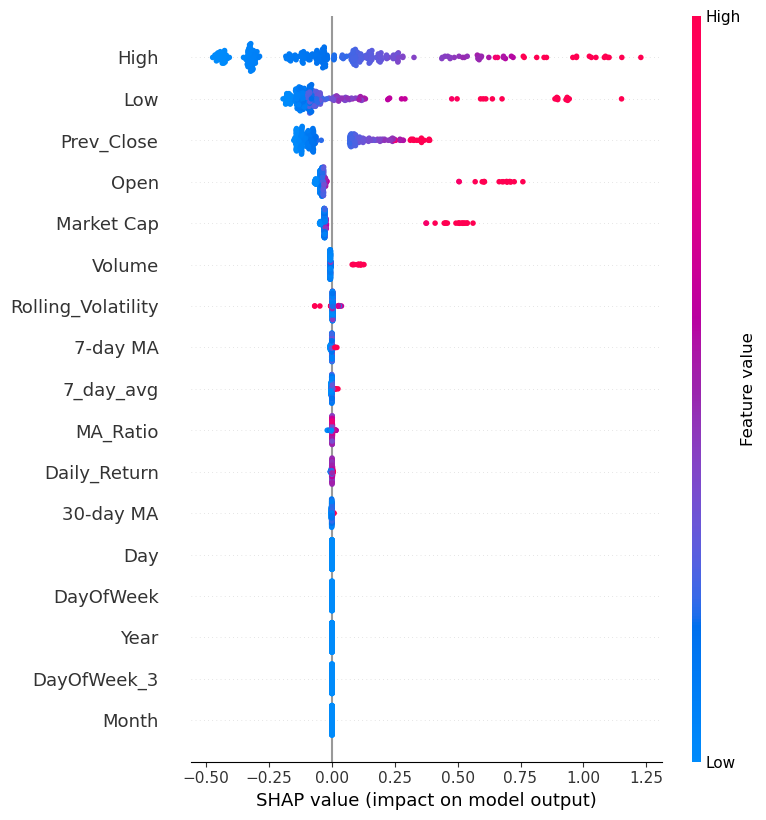

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape ()) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [71]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame

# Verify columns
print("Columns in DataFrame:", df.columns)

# Encode categorical features if present
if 'DayOfWeek_Encoded' in df.columns:
    df = pd.get_dummies(df, columns=['DayOfWeek_Encoded'], drop_first=True)

# Ensure all features are numeric
X = df.drop('Close', axis=1)
y = df['Close']

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Initialize the SHAP explainer with the trained model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary plot of SHAP values for feature importance
shap.summary_plot(shap_values, X_test)

# Plot the SHAP values for individual predictions (for the first instance)
# Ensure the input to shap.Explanation is correctly formatted
instance = X_test.iloc[0]
instance_values = shap_values[0][0]  # Get SHAP values for the first instance
shap_explanation = shap.Explanation(values=instance_values, base_values=explainer.expected_value, data=instance)
shap.plots.waterfall(shap_explanation)


# model Evaluation

In [73]:
from sklearn.utils import resample

# Perform bootstrapping
n_iterations = 500
n_size = int(len(X_train) * 0.50)
r2_scores = []

for i in range(n_iterations):
    # Prepare train and test sets
    X_train_boot, y_train_boot = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    # Train model
    model.fit(X_train_boot, y_train_boot)
    
    # Evaluate model
    y_pred_boot = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred_boot))
    print(f"{i}  y_pred_boot : {y_pred_boot }")
    
    
# Calculate mean and standard deviation of R² scores
print(f"Bootstrap Mean R²: {np.mean(r2_scores)}")
print(f"Bootstrap R² Standard Deviation: {np.std(r2_scores)}")


0  y_pred_boot : [-9.14215164e-01  8.12926209e-01  7.73070244e-03 -2.87101058e-01
 -8.63063199e-01 -9.11078796e-01  3.57124805e+00  2.80715422e-02
 -6.15800043e-01  1.55422362e-02  3.60579737e+00  4.03032581e-01
 -6.35518897e-01 -8.67001872e-01 -6.03650586e-01 -9.06764649e-01
  1.32656468e-01 -1.73322844e-02 -9.20857479e-01 -3.81311183e-01
 -4.88080287e-01 -9.00835431e-01 -4.21751676e-01 -3.36547412e-01
  9.16957624e-01  1.39287560e-01  3.58130908e-01  2.34226759e-01
  2.36625114e-01 -2.67067216e-01 -6.83876300e-01  8.85130018e-01
 -4.35353575e-01 -1.52633731e-02 -2.65900280e-01 -3.27067358e-01
 -9.13939170e-01 -6.69930883e-01 -9.57120015e-01 -6.57644855e-01
  2.95163449e+00  1.14637397e+00 -6.52396588e-01 -6.79477320e-01
 -6.59825610e-01 -6.10167362e-01  2.92619248e-01 -1.31504161e-01
  5.15906670e-03 -6.36857403e-01 -6.61517906e-01 -8.69796054e-01
  8.49909070e-01 -2.60601797e-01  5.11294070e-01 -8.95836909e-01
 -6.74615939e-01 -4.37247303e-01  5.19780538e-02 -3.67102895e-01
 -1.3463

2  y_pred_boot : [-9.14260054e-01  7.91179909e-01  2.71296940e-03 -2.83080975e-01
 -8.64833481e-01 -9.08693185e-01  3.58638133e+00  3.85292739e-02
 -6.13216804e-01  1.27530005e-02  3.64796326e+00  4.02754494e-01
 -6.42489704e-01 -8.66702863e-01 -6.08183855e-01 -9.05711077e-01
  1.42063100e-01 -1.33749707e-02 -9.18323124e-01 -3.85529084e-01
 -4.64222469e-01 -9.00117199e-01 -4.17510570e-01 -3.50247079e-01
  8.98005696e-01  1.57882464e-01  3.63332573e-01  2.51390335e-01
  2.43622359e-01 -2.72436647e-01 -6.81773341e-01  8.83855803e-01
 -4.26695418e-01 -3.75739545e-03 -2.44908352e-01 -3.15015859e-01
 -9.09945716e-01 -6.47340432e-01 -9.55139932e-01 -6.57738628e-01
  2.95858741e+00  1.15183014e+00 -6.52851760e-01 -6.79979283e-01
 -6.61662655e-01 -6.06983821e-01  2.95149038e-01 -1.46862837e-01
  4.15989492e-03 -6.25243957e-01 -6.56491233e-01 -8.75447565e-01
  8.64935259e-01 -2.51337631e-01  5.87125750e-01 -8.96436260e-01
 -6.73373679e-01 -4.38562604e-01  9.47731539e-02 -3.73329982e-01
 -1.2535

4  y_pred_boot : [-9.15713637e-01  7.59502949e-01 -1.44932001e-04 -2.85735542e-01
 -8.64041068e-01 -9.11654371e-01  3.50995772e+00  8.51658499e-02
 -6.16801117e-01  1.74818049e-02  3.58579739e+00  4.07018806e-01
 -6.40276613e-01 -8.69636277e-01 -6.08177387e-01 -9.07281068e-01
  1.41044147e-01 -1.31153344e-02 -9.18979538e-01 -3.91148070e-01
 -4.67641299e-01 -9.00888309e-01 -4.36590699e-01 -3.90384188e-01
  9.44466328e-01  1.38072500e-01  3.56849274e-01  2.36455066e-01
  2.44243204e-01 -2.73749665e-01 -6.83014270e-01  8.49944639e-01
 -4.30084004e-01 -1.35684140e-02 -2.58816108e-01 -3.24771527e-01
 -9.13922812e-01 -6.66704545e-01 -9.54136005e-01 -6.59027870e-01
  2.97836561e+00  1.14772351e+00 -6.55301661e-01 -6.77823446e-01
 -6.61131019e-01 -6.10427759e-01  3.01047632e-01 -1.28305214e-01
 -2.09248957e-03 -6.37043238e-01 -6.61043142e-01 -8.69794912e-01
  8.43473894e-01 -2.61488935e-01  7.13480180e-01 -9.00018860e-01
 -6.72327145e-01 -4.47427329e-01  7.84016110e-02 -3.51679548e-01
 -1.4113

6  y_pred_boot : [-9.19162520e-01  7.02841559e-01  4.18766554e-03 -2.90537957e-01
 -8.65578723e-01 -9.12206740e-01  3.60428083e+00 -6.44612998e-04
 -6.21366721e-01  1.34084633e-02  3.67269128e+00  4.13002614e-01
 -6.32695423e-01 -8.65292077e-01 -6.12099132e-01 -9.14269374e-01
  1.41717109e-01 -1.39602461e-02 -9.24569993e-01 -3.92539264e-01
 -4.74747915e-01 -9.06265158e-01 -4.20852745e-01 -3.16723372e-01
  9.25392856e-01  1.50113728e-01  3.60694935e-01  2.25242582e-01
  2.45584563e-01 -2.75338487e-01 -6.82413397e-01  8.75279626e-01
 -4.40914547e-01 -1.55192052e-02 -2.64533432e-01 -3.16662125e-01
 -9.16005799e-01 -6.66615907e-01 -9.58834186e-01 -6.61137106e-01
  2.91151164e+00  1.18655654e+00 -6.59059635e-01 -6.75069209e-01
 -6.56316811e-01 -6.04229014e-01  3.11948933e-01 -1.47694244e-01
  1.30256415e-03 -6.29370367e-01 -6.62228339e-01 -8.76755067e-01
  8.47757037e-01 -2.78180981e-01  6.32734622e-01 -8.99754849e-01
 -6.71216130e-01 -4.36289407e-01  6.24637464e-02 -3.76504202e-01
 -1.2527

8  y_pred_boot : [-9.15312104e-01  8.01137770e-01  5.66825819e-03 -2.78557597e-01
 -8.65824284e-01 -9.17651113e-01  3.54744520e+00  3.97865603e-02
 -6.17500898e-01  1.72493686e-02  3.64741317e+00  3.72137953e-01
 -6.39235025e-01 -8.64118673e-01 -6.05248348e-01 -9.05413969e-01
  1.33299757e-01 -1.53050290e-02 -9.22343017e-01 -3.79491827e-01
 -4.71419245e-01 -8.99579095e-01 -4.27549840e-01 -3.50826838e-01
  9.33920909e-01  1.42495257e-01  3.52021941e-01  2.28027063e-01
  2.33819330e-01 -2.82810306e-01 -6.83247467e-01  9.21167346e-01
 -4.37026660e-01 -2.91817808e-02 -2.51870409e-01 -3.28153076e-01
 -9.15710213e-01 -6.59729364e-01 -9.61650621e-01 -6.58924967e-01
  2.95660809e+00  1.16025453e+00 -6.54144806e-01 -6.75418814e-01
 -6.54945018e-01 -6.06270725e-01  2.99216293e-01 -1.00108522e-01
  5.68670853e-03 -6.38416742e-01 -6.62225106e-01 -8.68048216e-01
  8.38372849e-01 -2.56300964e-01  6.35266504e-01 -8.97867017e-01
 -6.73314714e-01 -4.31066057e-01  4.77835486e-02 -3.65689827e-01
 -1.1577

10  y_pred_boot : [-9.17524243e-01  7.71779657e-01  2.54082958e-03 -2.89345913e-01
 -8.60842120e-01 -9.09458779e-01  3.43122781e+00  5.38040674e-02
 -6.18187175e-01  1.47302308e-02  3.55461002e+00  4.01433868e-01
 -6.40683282e-01 -8.63833739e-01 -6.13839741e-01 -9.06497214e-01
  1.28454734e-01 -9.07623052e-03 -9.17547449e-01 -3.89349827e-01
 -4.88767134e-01 -9.00439033e-01 -4.19168628e-01 -3.09791368e-01
  9.48560022e-01  1.38667856e-01  3.60041374e-01  2.30436449e-01
  2.40943065e-01 -2.76957172e-01 -6.83144944e-01  8.68665843e-01
 -4.40147622e-01 -4.55304281e-03 -2.75178521e-01 -3.16276950e-01
 -9.15722386e-01 -6.60422298e-01 -9.56923148e-01 -6.60060138e-01
  3.06324424e+00  1.15739929e+00 -6.52680761e-01 -6.75659620e-01
 -6.56919966e-01 -6.04610004e-01  2.94800193e-01 -1.33104396e-01
 -3.06274947e-03 -6.37936653e-01 -6.59875255e-01 -8.69090946e-01
  8.97667122e-01 -2.49133291e-01  7.11552024e-01 -8.98306021e-01
 -6.73202490e-01 -4.36302912e-01  9.48480965e-02 -3.59192643e-01
 -1.342

12  y_pred_boot : [-9.18430402e-01  7.74560333e-01  7.52223256e-03 -2.87314093e-01
 -8.63167244e-01 -9.09882757e-01  3.51856509e+00  3.51572356e-02
 -6.12751932e-01  1.20317252e-02  3.58932901e+00  4.06887752e-01
 -6.41539225e-01 -8.63670729e-01 -6.03760717e-01 -9.05618445e-01
  1.43288051e-01 -1.12969293e-02 -9.22449534e-01 -3.88424266e-01
 -4.72871686e-01 -9.02660493e-01 -4.19591084e-01 -3.65638471e-01
  8.94727811e-01  1.64795828e-01  3.59187333e-01  2.28178279e-01
  2.37909029e-01 -2.80264349e-01 -6.83449089e-01  8.79009068e-01
 -4.48657225e-01 -2.50101007e-02 -2.55670609e-01 -3.20355427e-01
 -9.10861767e-01 -6.54152414e-01 -9.63557664e-01 -6.58192849e-01
  2.97279380e+00  1.16683502e+00 -6.53636375e-01 -6.73481338e-01
 -6.59797839e-01 -6.06768123e-01  3.01466854e-01 -1.33392183e-01
  4.37254941e-03 -6.32428559e-01 -6.59236720e-01 -8.66434096e-01
  8.77682165e-01 -2.65887916e-01  6.41746760e-01 -8.99972449e-01
 -6.72732102e-01 -4.34226582e-01  8.20281500e-02 -3.62363249e-01
 -1.403

14  y_pred_boot : [-9.16020255e-01  7.80712477e-01  7.20039767e-03 -2.87499167e-01
 -8.62081527e-01 -9.08267115e-01  3.67932732e+00  3.19223385e-02
 -6.21983952e-01  1.66226275e-02  3.74320375e+00  4.27260547e-01
 -6.40037329e-01 -8.63210422e-01 -6.11143708e-01 -9.06997656e-01
  1.35130906e-01 -1.38520168e-02 -9.19860970e-01 -3.73917350e-01
 -4.81434358e-01 -9.04423547e-01 -4.26714249e-01 -3.20064406e-01
  9.30592049e-01  1.37615616e-01  3.62793329e-01  2.30906458e-01
  2.36165377e-01 -2.79027034e-01 -6.87565228e-01  9.05484743e-01
 -4.31593699e-01 -2.22231476e-02 -2.65494943e-01 -3.09879245e-01
 -9.21736248e-01 -6.68686531e-01 -9.56679109e-01 -6.59314706e-01
  3.16720109e+00  1.14348507e+00 -6.54311620e-01 -6.79284637e-01
 -6.57349840e-01 -6.06085080e-01  2.90176955e-01 -9.68677279e-02
  4.02541663e-03 -6.32580156e-01 -6.58038970e-01 -8.78854793e-01
  8.81400575e-01 -2.50020048e-01  7.79761999e-01 -9.00278877e-01
 -6.70105115e-01 -4.30953453e-01  6.38191810e-02 -3.66623567e-01
 -1.348

16  y_pred_boot : [-9.12933912e-01  7.97934067e-01  4.42809066e-03 -2.87419469e-01
 -8.63828223e-01 -9.09940771e-01  3.49141170e+00  3.01528172e-02
 -6.18077995e-01  1.19704776e-02  3.58538824e+00  4.40877852e-01
 -6.41810845e-01 -8.67749397e-01 -6.07024336e-01 -9.08390371e-01
  1.38041686e-01 -5.23665663e-03 -9.20068108e-01 -3.90199494e-01
 -4.73103362e-01 -8.97299241e-01 -4.18622536e-01 -3.25292321e-01
  9.33799556e-01  1.47121728e-01  3.60455841e-01  2.19523926e-01
  2.28395309e-01 -2.71211316e-01 -6.82334650e-01  8.73205008e-01
 -4.39524494e-01 -2.33413907e-02 -2.61148079e-01 -3.12222249e-01
 -9.18990190e-01 -6.69443565e-01 -9.68154273e-01 -6.60607752e-01
  3.12565301e+00  1.15422260e+00 -6.55748084e-01 -6.80443585e-01
 -6.58812362e-01 -6.09397773e-01  2.84522780e-01 -1.28576263e-01
  1.27365227e-03 -6.37045710e-01 -6.62284641e-01 -8.69553726e-01
  8.67623684e-01 -2.14766955e-01  6.30652016e-01 -8.93238644e-01
 -6.73926619e-01 -4.36114034e-01  9.64780038e-02 -3.71186128e-01
 -1.518

18  y_pred_boot : [-9.17129178e-01  7.78602290e-01 -1.73451483e-03 -2.87509438e-01
 -8.60980403e-01 -9.08487949e-01  3.48285112e+00  4.31667777e-02
 -6.15712166e-01  1.57714389e-02  3.58287805e+00  4.19211061e-01
 -6.40106946e-01 -8.67302784e-01 -6.09599015e-01 -9.06803642e-01
  1.38285725e-01 -1.86789694e-02 -9.19090811e-01 -3.87517346e-01
 -4.88649204e-01 -9.04000711e-01 -4.35845838e-01 -3.26438335e-01
  9.17792645e-01  1.38334609e-01  3.59358712e-01  2.17350019e-01
  2.29033082e-01 -2.75521088e-01 -6.83415232e-01  8.68920914e-01
 -4.39954559e-01 -2.21657042e-02 -2.60905942e-01 -3.23260881e-01
 -9.11735210e-01 -6.54313331e-01 -9.58297414e-01 -6.60218393e-01
  3.01438107e+00  1.17843858e+00 -6.53217533e-01 -6.73961808e-01
 -6.58262847e-01 -6.06683670e-01  2.90842499e-01 -1.20693400e-01
  3.18259725e-03 -6.35184318e-01 -6.62734297e-01 -8.69313111e-01
  9.35278817e-01 -2.59730446e-01  7.50080149e-01 -8.98188091e-01
 -6.73486283e-01 -4.42748740e-01  5.25503950e-02 -3.71881725e-01
 -1.320

20  y_pred_boot : [-9.15585435e-01  7.93442264e-01  6.60922579e-03 -2.93356295e-01
 -8.66569906e-01 -9.14988938e-01  3.48870140e+00  3.67266562e-02
 -6.11882103e-01  1.54783257e-02  3.62097706e+00  4.21815032e-01
 -6.36384351e-01 -8.65045565e-01 -6.06996375e-01 -9.08054651e-01
  1.32563265e-01 -2.11981073e-02 -9.18159734e-01 -3.78713108e-01
 -4.63280740e-01 -9.05514971e-01 -4.25379166e-01 -3.57123922e-01
  8.96286010e-01  1.37111180e-01  3.65371051e-01  2.30672880e-01
  2.37878215e-01 -2.70582292e-01 -6.84913895e-01  8.71435487e-01
 -4.34599013e-01 -2.25371839e-02 -2.48798141e-01 -3.19942672e-01
 -9.13749721e-01 -6.38245363e-01 -9.64194867e-01 -6.59482852e-01
  2.88526764e+00  1.16762572e+00 -6.53559911e-01 -6.69829691e-01
 -6.58629000e-01 -6.02079834e-01  2.84257628e-01 -1.68508706e-01
  3.59268946e-03 -6.20701558e-01 -6.58314203e-01 -8.76734905e-01
  8.90348232e-01 -2.74148915e-01  6.83436932e-01 -9.04022775e-01
 -6.73062876e-01 -4.47959536e-01  7.01097977e-02 -3.66438683e-01
 -1.228

22  y_pred_boot : [-9.11752709e-01  7.91349386e-01  5.45560369e-03 -2.72418958e-01
 -8.61831781e-01 -9.08781443e-01  3.54975435e+00  5.98692855e-02
 -6.17652686e-01  1.57573634e-02  3.63620829e+00  3.69341109e-01
 -6.35148558e-01 -8.65970555e-01 -6.11945442e-01 -9.06016744e-01
  1.43564426e-01 -2.16601267e-02 -9.18302962e-01 -3.83996184e-01
 -4.71067166e-01 -9.01829657e-01 -4.27885941e-01 -3.32606456e-01
  9.12898548e-01  1.46594467e-01  3.57505878e-01  2.31723599e-01
  2.40216844e-01 -2.84941036e-01 -6.84054527e-01  8.60051434e-01
 -4.36970168e-01 -1.71569111e-02 -2.54104803e-01 -3.18448765e-01
 -9.15562230e-01 -6.66487516e-01 -9.66720852e-01 -6.59631215e-01
  2.94358633e+00  1.18178437e+00 -6.50529299e-01 -6.74132236e-01
 -6.56755434e-01 -6.12759350e-01  2.88379093e-01 -1.45415531e-01
  3.48693284e-03 -6.33295535e-01 -6.60783126e-01 -8.77401400e-01
  8.45294962e-01 -2.55787779e-01  5.81539099e-01 -8.96076953e-01
 -6.73491419e-01 -4.54795864e-01  7.56390047e-02 -3.67115449e-01
 -1.390

24  y_pred_boot : [-9.16036803e-01  7.93588916e-01  3.05724903e-03 -2.93142119e-01
 -8.66458443e-01 -9.08926573e-01  3.52337435e+00  2.94498020e-02
 -6.12537375e-01  1.74753378e-02  3.51118799e+00  4.02177968e-01
 -6.33602153e-01 -8.68353122e-01 -6.06257220e-01 -9.05370792e-01
  1.37829222e-01 -1.84370226e-02 -9.23683805e-01 -3.88626459e-01
 -4.97771283e-01 -8.98356617e-01 -4.17784852e-01 -3.08794859e-01
  9.32010062e-01  1.46173723e-01  3.56067512e-01  2.39263513e-01
  2.46093184e-01 -2.75971695e-01 -6.82713929e-01  8.89519298e-01
 -4.45617864e-01 -1.96284965e-02 -2.70335020e-01 -3.18108479e-01
 -9.18695174e-01 -6.59064771e-01 -9.66302391e-01 -6.59869548e-01
  2.89725029e+00  1.17342864e+00 -6.55668005e-01 -6.71211755e-01
 -6.61116754e-01 -6.05393478e-01  2.96487163e-01 -1.39336999e-01
  9.34508294e-04 -6.31330288e-01 -6.60276407e-01 -8.74272069e-01
  9.32659629e-01 -2.55489720e-01  7.01035898e-01 -8.98369551e-01
 -6.72722972e-01 -4.32688356e-01  3.87873885e-02 -3.77035648e-01
 -1.313

26  y_pred_boot : [-9.14312362e-01  7.91266074e-01  1.58198226e-03 -2.82020365e-01
 -8.61759502e-01 -9.07727681e-01  3.49877985e+00  3.24638656e-02
 -6.14860787e-01  1.48068853e-02  3.52423277e+00  4.22446718e-01
 -6.34356335e-01 -8.69046627e-01 -6.02911431e-01 -9.05625863e-01
  1.28913140e-01 -1.65729671e-02 -9.18403393e-01 -3.91543326e-01
 -4.82995410e-01 -8.99458122e-01 -4.18704707e-01 -3.25738173e-01
  9.11446297e-01  1.23263150e-01  3.50885628e-01  2.30487996e-01
  2.38980291e-01 -2.69105504e-01 -6.83261733e-01  8.90368204e-01
 -4.39093669e-01 -4.25612540e-03 -2.61744958e-01 -3.18645822e-01
 -9.20140768e-01 -6.64440669e-01 -9.59664451e-01 -6.59758466e-01
  3.00985236e+00  1.13966794e+00 -6.55380598e-01 -6.80580346e-01
 -6.58464849e-01 -6.02299336e-01  2.92154185e-01 -1.29498209e-01
 -2.57162791e-03 -6.24560343e-01 -6.59877157e-01 -8.76937669e-01
  8.69248455e-01 -2.69093711e-01  6.08300849e-01 -8.98891297e-01
 -6.71094776e-01 -4.46564347e-01  5.93395513e-02 -3.67245743e-01
 -1.518

28  y_pred_boot : [-9.15668747e-01  8.04535296e-01  9.61225722e-03 -2.92455842e-01
 -8.57562714e-01 -9.08590472e-01  3.52649208e+00  2.85755980e-02
 -6.18523846e-01  1.41552267e-02  3.60096928e+00  4.27274242e-01
 -6.37834510e-01 -8.65194880e-01 -6.04040326e-01 -9.05740559e-01
  1.33500809e-01 -2.59660949e-02 -9.18249703e-01 -3.86648278e-01
 -4.75464626e-01 -9.01014037e-01 -4.20773237e-01 -3.62519411e-01
  9.20098748e-01  1.48866522e-01  3.66669423e-01  2.30364930e-01
  2.45666353e-01 -2.77936182e-01 -6.83306242e-01  9.02128112e-01
 -4.40956203e-01 -2.19146274e-02 -2.64374417e-01 -3.31866160e-01
 -9.14924456e-01 -6.56538025e-01 -9.65566659e-01 -6.59967316e-01
  3.04216291e+00  1.15679119e+00 -6.53738708e-01 -6.85796468e-01
 -6.56981784e-01 -6.06612722e-01  2.99620679e-01 -1.03857746e-01
  6.53314189e-03 -6.36309979e-01 -6.59458315e-01 -8.69365609e-01
  8.56081186e-01 -2.63078898e-01  6.18122710e-01 -8.97627924e-01
 -6.69827599e-01 -4.27568481e-01  6.87119463e-02 -3.65999108e-01
 -1.132

30  y_pred_boot : [-9.13473156e-01  8.21114738e-01  1.14069566e-03 -2.88295004e-01
 -8.64488060e-01 -9.08851059e-01  3.53493378e+00 -7.63729380e-03
 -6.14719652e-01  1.69366638e-02  3.61221219e+00  4.11425205e-01
 -6.35356458e-01 -8.63632687e-01 -6.12495529e-01 -9.06775300e-01
  1.38781031e-01 -7.74932734e-03 -9.15095265e-01 -3.85288278e-01
 -4.73636710e-01 -9.04395586e-01 -4.24746719e-01 -3.04562883e-01
  9.60691409e-01  1.45833628e-01  3.63292249e-01  2.39114008e-01
  2.56716779e-01 -2.72095411e-01 -6.84771237e-01  9.50995277e-01
 -4.49605421e-01 -2.17360204e-02 -2.61330300e-01 -3.19268759e-01
 -9.25354037e-01 -6.74095525e-01 -9.44197736e-01 -6.59006757e-01
  3.08693848e+00  1.14161036e+00 -6.50378462e-01 -6.77839994e-01
 -6.60841140e-01 -6.12698293e-01  3.01758636e-01 -1.14660898e-01
  2.98382807e-03 -6.39501889e-01 -6.61576871e-01 -8.58641393e-01
  8.53896817e-01 -2.56635353e-01  5.98501624e-01 -9.02178311e-01
 -6.70153809e-01 -4.37303796e-01  8.41341523e-02 -3.68870705e-01
 -1.367

32  y_pred_boot : [-9.15783253e-01  8.04763168e-01  6.45610694e-03 -2.84739223e-01
 -8.62111009e-01 -9.11701162e-01  3.56491578e+00  2.21156947e-02
 -6.12122718e-01  9.73627397e-03  3.63215740e+00  4.02857968e-01
 -6.38991937e-01 -8.66177313e-01 -6.04677718e-01 -9.06549902e-01
  1.40446318e-01 -1.94078532e-02 -9.19098419e-01 -3.74663352e-01
 -4.70657074e-01 -9.04070328e-01 -4.22441377e-01 -3.60006360e-01
  9.35503835e-01  1.52882991e-01  3.65088590e-01  2.24575517e-01
  2.27164461e-01 -2.77035538e-01 -6.83699786e-01  9.15161854e-01
 -4.48826702e-01 -9.49925699e-03 -2.69003361e-01 -3.13234545e-01
 -9.13075428e-01 -6.41315539e-01 -9.67613126e-01 -6.51836991e-01
  2.86935070e+00  1.14152895e+00 -6.50847520e-01 -6.76667732e-01
 -6.62471237e-01 -6.10805706e-01  3.03792739e-01 -1.53621180e-01
 -3.25048649e-03 -6.23477859e-01 -6.52547805e-01 -8.73356780e-01
  8.74632342e-01 -2.64771575e-01  4.97984904e-01 -8.97482603e-01
 -6.73989008e-01 -4.26516430e-01  6.85103239e-02 -3.61183949e-01
 -1.172

34  y_pred_boot : [-9.14905626e-01  8.00029037e-01  5.44818551e-03 -2.90440190e-01
 -8.64561672e-01 -9.11168004e-01  3.73700367e+00  4.08465992e-02
 -6.20246766e-01  1.35823150e-02  3.64208882e+00  4.47872055e-01
 -6.43069082e-01 -8.68503959e-01 -6.14168994e-01 -9.08950159e-01
  1.47082165e-01 -2.28148901e-02 -9.19068746e-01 -3.84014824e-01
 -4.77062387e-01 -9.05127133e-01 -4.21180667e-01 -3.60980995e-01
  8.96692298e-01  1.40368141e-01  3.59213962e-01  2.16044039e-01
  2.33540102e-01 -2.78230056e-01 -6.83011797e-01  8.83907540e-01
 -4.47857013e-01 -1.95836070e-02 -2.62759536e-01 -3.25143197e-01
 -9.12779271e-01 -6.66820954e-01 -9.62851415e-01 -6.59867646e-01
  2.95427916e+00  1.14655752e+00 -6.51065690e-01 -6.75142440e-01
 -6.59522415e-01 -6.14538762e-01  3.02772264e-01 -1.47450776e-01
  6.41254891e-03 -6.39694571e-01 -6.60431238e-01 -8.76123000e-01
  8.73270631e-01 -2.67145202e-01  5.92914403e-01 -8.99954569e-01
 -6.71727794e-01 -4.28894623e-01  7.06264073e-02 -3.73295174e-01
 -1.368

36  y_pred_boot : [-9.17390906e-01  7.86303312e-01  7.44900181e-03 -2.90098002e-01
 -8.64975568e-01 -9.11191780e-01  3.83040179e+00  3.61244521e-02
 -6.16684708e-01  1.36334814e-02  3.45957857e+00  4.11570145e-01
 -6.37863042e-01 -8.63275664e-01 -6.08096358e-01 -9.08498030e-01
  1.48671938e-01 -1.92166924e-02 -9.19396668e-01 -3.87304311e-01
 -4.71006680e-01 -9.02308985e-01 -4.24041231e-01 -3.17544127e-01
  8.98869819e-01  1.53664563e-01  3.55920670e-01  2.39130366e-01
  2.58126423e-01 -2.72428849e-01 -6.89214727e-01  8.00843515e-01
 -4.34254924e-01 -1.24776809e-03 -2.68234343e-01 -3.19449839e-01
 -9.14106745e-01 -6.63942509e-01 -9.54659652e-01 -6.57650942e-01
  3.02536530e+00  1.16278964e+00 -6.50818037e-01 -6.79331048e-01
 -6.62057911e-01 -6.08363793e-01  2.89572088e-01 -1.33175344e-01
  3.81333276e-03 -6.30870932e-01 -6.59032625e-01 -8.75970642e-01
  8.68636170e-01 -2.67289952e-01  6.48589936e-01 -9.00079727e-01
 -6.71707442e-01 -4.29160346e-01  6.42798690e-02 -3.59891283e-01
 -1.127

38  y_pred_boot : [-9.18506486e-01  7.80379990e-01  8.68574556e-03 -2.91377924e-01
 -8.59729393e-01 -9.11637632e-01  3.67265115e+00 -1.72980467e-02
 -6.10354909e-01  1.52420852e-02  3.64098237e+00  4.18760834e-01
 -6.34604749e-01 -8.65438729e-01 -6.08363983e-01 -9.06986814e-01
  1.41919112e-01 -1.31368281e-02 -9.18131773e-01 -3.81994036e-01
 -4.67624941e-01 -9.03272208e-01 -4.25902624e-01 -2.92557414e-01
  9.34514744e-01  1.50092234e-01  3.70514133e-01  2.33832454e-01
  2.40315753e-01 -2.64120297e-01 -6.82436603e-01  8.77763004e-01
 -4.47081908e-01 -4.16462253e-02 -2.54644238e-01 -3.20016283e-01
 -9.13091595e-01 -6.60079159e-01 -9.66921333e-01 -6.58893011e-01
  2.96946608e+00  1.14468358e+00 -6.51646971e-01 -6.68503359e-01
 -6.62800110e-01 -6.06482809e-01  3.02189842e-01 -1.25258434e-01
  8.83277769e-03 -6.31238797e-01 -6.61815204e-01 -8.75447375e-01
  8.86663299e-01 -2.50363948e-01  7.37863548e-01 -8.96109669e-01
 -6.74140605e-01 -4.23849690e-01  6.51489373e-02 -3.63968429e-01
 -1.452

40  y_pred_boot : [-9.15999332e-01  8.01192931e-01  2.30763243e-03 -2.75660132e-01
 -8.64780983e-01 -9.09918516e-01  3.52487282e+00  2.23660107e-02
 -6.17451064e-01  1.25154285e-02  3.50926592e+00  4.21914512e-01
 -6.34913269e-01 -8.65623042e-01 -6.06958904e-01 -9.06957902e-01
  1.32372294e-01 -1.67141028e-02 -9.19481121e-01 -3.86091724e-01
 -4.68952224e-01 -8.99225495e-01 -4.21293271e-01 -3.45391404e-01
  9.21081181e-01  1.47165096e-01  3.59460474e-01  2.36919748e-01
  2.44156468e-01 -2.86229707e-01 -6.86047735e-01  8.67961686e-01
 -4.43778726e-01 -1.71264775e-02 -2.55384724e-01 -3.20198314e-01
 -9.13285609e-01 -6.50886513e-01 -9.66786855e-01 -6.58100788e-01
  3.04633840e+00  1.12883378e+00 -6.55905387e-01 -6.79791927e-01
 -6.59407719e-01 -6.06663889e-01  3.00012891e-01 -1.06424056e-01
 -2.50010905e-03 -6.36559534e-01 -6.61500026e-01 -8.72656808e-01
  8.89682308e-01 -2.60457808e-01  6.96804111e-01 -8.96431504e-01
 -6.71896510e-01 -4.40194984e-01  7.40743394e-02 -3.61723954e-01
 -1.126

42  y_pred_boot : [-9.17335365e-01  7.90806528e-01  6.40532094e-03 -2.86640940e-01
 -8.61381555e-01 -9.10346679e-01  3.51583101e+00  3.64400101e-02
 -6.12858830e-01  1.53995789e-02  3.57755465e+00  4.01447563e-01
 -6.41941899e-01 -8.64677129e-01 -6.01161311e-01 -9.07022763e-01
  1.40471615e-01 -1.14736341e-02 -9.17966481e-01 -3.85366264e-01
 -4.65455789e-01 -9.03117377e-01 -4.16928338e-01 -3.55974484e-01
  9.10362672e-01  1.54374046e-01  3.64040915e-01  2.40731932e-01
  2.43761593e-01 -2.81383923e-01 -6.82702516e-01  8.86830113e-01
 -4.30263562e-01 -1.22964815e-02 -2.68794701e-01 -3.15000452e-01
 -9.11020401e-01 -6.61152703e-01 -9.64413798e-01 -6.60206790e-01
  3.17280277e+00  1.16837705e+00 -6.51545589e-01 -6.69946290e-01
 -6.57527876e-01 -6.11310522e-01  2.98478659e-01 -1.31008285e-01
  3.19458047e-03 -6.40005184e-01 -6.60257196e-01 -8.73990749e-01
  8.81349980e-01 -2.51625799e-01  6.70805673e-01 -8.93640747e-01
 -6.76032621e-01 -4.61661865e-01  7.74861315e-02 -3.56737035e-01
 -1.427

44  y_pred_boot : [-9.17450442e-01  7.88535423e-01  7.28523122e-03 -2.90436195e-01
 -8.62570556e-01 -9.08996760e-01  3.52806511e+00  4.02295588e-02
 -6.16453413e-01  1.62610388e-02  3.64823164e+00  4.23561157e-01
 -6.37673783e-01 -8.65685431e-01 -6.10560906e-01 -9.05025751e-01
  1.46176576e-01 -1.39794573e-02 -9.19458106e-01 -3.83182466e-01
 -4.86154794e-01 -9.00178446e-01 -4.33820675e-01 -3.60267138e-01
  9.09680199e-01  1.64933349e-01  3.55705733e-01  2.27220193e-01
  2.55353165e-01 -2.76568383e-01 -6.84186723e-01  8.69317311e-01
 -4.45579441e-01 -3.03269633e-03 -2.55366464e-01 -3.16300536e-01
 -9.15505928e-01 -6.65575460e-01 -9.64181172e-01 -6.59631976e-01
  2.97751671e+00  1.16227303e+00 -6.54329689e-01 -6.75222518e-01
 -6.58309067e-01 -6.04871542e-01  3.03229148e-01 -1.14863282e-01
  6.63910241e-05 -6.36887646e-01 -6.60097800e-01 -8.70013463e-01
  8.82607076e-01 -2.55432467e-01  6.32768099e-01 -8.95965110e-01
 -6.72306412e-01 -4.51237610e-01  4.25210156e-02 -3.63352149e-01
 -1.161

46  y_pred_boot : [-9.15811405e-01  7.85012358e-01  4.00049915e-03 -2.92782242e-01
 -8.62250433e-01 -9.09698634e-01  3.50318130e+00  2.92791839e-02
 -6.16302387e-01  1.63342696e-02  3.59350031e+00  4.20603396e-01
 -6.41799432e-01 -8.74791152e-01 -6.11297588e-01 -9.08038674e-01
  1.40725165e-01 -1.08409965e-02 -9.13897514e-01 -3.85006578e-01
 -4.74910164e-01 -9.04267005e-01 -4.31603971e-01 -3.38278511e-01
  9.29924032e-01  1.45303894e-01  3.61932249e-01  2.20598992e-01
  2.24363623e-01 -2.71735534e-01 -6.83347517e-01  8.68199829e-01
 -4.37692014e-01 -2.24051783e-02 -2.60071112e-01 -3.12990886e-01
 -9.20246715e-01 -6.46456718e-01 -9.48813936e-01 -6.58772989e-01
  3.11023632e+00  1.12080997e+00 -6.56280100e-01 -6.59155881e-01
 -6.55545320e-01 -6.10069023e-01  2.95063634e-01 -1.23591626e-01
  6.99877534e-03 -6.35345045e-01 -6.60187579e-01 -8.72391275e-01
  8.74856029e-01 -2.57767291e-01  5.82269314e-01 -8.95158621e-01
 -6.73613914e-01 -4.40913596e-01  6.70190795e-02 -3.69081457e-01
 -1.138

48  y_pred_boot : [-9.14748322e-01  7.84820627e-01  1.80414724e-03 -2.85439956e-01
 -8.61540570e-01 -9.08786198e-01  3.50556939e+00  1.82609041e-02
 -6.21001709e-01  1.20233559e-02  3.52179751e+00  4.41755861e-01
 -6.37101061e-01 -8.66313694e-01 -6.12620307e-01 -9.06023401e-01
  1.32226974e-01 -1.59652470e-02 -9.19623208e-01 -3.78533360e-01
 -4.92730344e-01 -9.04912386e-01 -4.22220924e-01 -3.21042465e-01
  9.31305335e-01  1.45503044e-01  3.75200520e-01  2.15770327e-01
  2.21520368e-01 -2.80442005e-01 -6.82880172e-01  9.20004784e-01
 -4.39197904e-01 -2.16911309e-02 -2.74902146e-01 -3.21717899e-01
 -9.19892545e-01 -6.60540038e-01 -9.50870864e-01 -6.58385342e-01
  2.96171617e+00  1.13658749e+00 -6.54863989e-01 -6.75319144e-01
 -6.55000940e-01 -6.09992749e-01  2.89790449e-01 -1.36737592e-01
  2.58400719e-03 -6.30971743e-01 -6.58425286e-01 -8.70284893e-01
  8.53801142e-01 -2.56051599e-01  6.63292388e-01 -8.95060282e-01
 -6.70163319e-01 -4.51385594e-01  8.29609386e-02 -3.66397598e-01
 -1.339

50  y_pred_boot : [-9.16741911e-01  7.72424087e-01  8.05367858e-03 -2.84637461e-01
 -8.64859540e-01 -9.09699775e-01  3.55029835e+00  3.22725146e-02
 -6.15356854e-01  1.55363397e-02  3.59064526e+00  4.12320903e-01
 -6.40939304e-01 -8.66173889e-01 -6.07861259e-01 -9.07085723e-01
  1.45791782e-01 -1.05161183e-02 -9.18453798e-01 -3.78284185e-01
 -4.62878827e-01 -9.00319392e-01 -4.26687809e-01 -3.44947074e-01
  9.06905990e-01  1.45892593e-01  3.64019801e-01  2.27659958e-01
  2.42183613e-01 -2.75506823e-01 -6.83735735e-01  8.71106805e-01
 -4.32192289e-01 -1.64738679e-02 -2.65104632e-01 -3.18489660e-01
 -9.13108904e-01 -6.63582823e-01 -9.53535323e-01 -6.60010303e-01
  3.02585946e+00  1.15859685e+00 -6.55478556e-01 -6.75797142e-01
 -6.55993454e-01 -6.12642942e-01  2.96556970e-01 -1.31491798e-01
  2.89519033e-03 -6.40646761e-01 -6.61518286e-01 -8.73539762e-01
  8.30916247e-01 -2.54191729e-01  7.54478559e-01 -8.98488242e-01
 -6.74525399e-01 -4.48306098e-01  8.99855746e-02 -3.52861131e-01
 -1.525

52  y_pred_boot : [-9.16841961e-01  7.93275640e-01  4.59661649e-03 -2.84286334e-01
 -8.64185627e-01 -9.14163998e-01  3.56329291e+00  3.67802953e-02
 -6.15765044e-01  1.75734860e-02  3.60989144e+00  4.39129825e-01
 -6.32763899e-01 -8.64142069e-01 -6.12539658e-01 -9.09136184e-01
  1.46281192e-01 -9.25046264e-03 -9.20782726e-01 -3.87991920e-01
 -4.67636734e-01 -9.05520106e-01 -4.15308131e-01 -3.08391234e-01
  9.56927919e-01  1.54790795e-01  3.70132762e-01  2.36736767e-01
  2.39885879e-01 -2.75039477e-01 -6.83496261e-01  9.06890203e-01
 -4.37869099e-01 -1.89937666e-02 -2.42600537e-01 -3.13421521e-01
 -9.23827033e-01 -6.68765278e-01 -9.61446907e-01 -6.59991853e-01
  3.05785826e+00  1.12243284e+00 -6.50296672e-01 -6.77086573e-01
 -6.58173258e-01 -6.11446142e-01  2.95793849e-01 -1.13932585e-01
  4.42200394e-03 -6.32206775e-01 -6.62247741e-01 -8.76479643e-01
  8.91226621e-01 -2.64339038e-01  7.07836467e-01 -8.96893524e-01
 -6.73508538e-01 -4.32903864e-01  8.19958143e-02 -3.62009459e-01
 -1.290

54  y_pred_boot : [-9.15530465e-01  7.89005622e-01  8.42782115e-03 -2.90801778e-01
 -8.64369560e-01 -9.13406012e-01  3.68061048e+00  8.39567570e-03
 -6.09393779e-01  1.48416937e-02  3.70165509e+00  4.21813700e-01
 -6.38471142e-01 -8.66353257e-01 -6.05003928e-01 -9.04672341e-01
  1.54042510e-01 -1.42023831e-02 -9.21276511e-01 -3.81509191e-01
 -4.71088850e-01 -8.98422049e-01 -4.16442732e-01 -3.51473741e-01
  9.10559349e-01  1.59431152e-01  3.67875733e-01  2.26263628e-01
  2.30411151e-01 -2.74049816e-01 -6.81109890e-01  8.57913857e-01
 -4.42263705e-01 -1.32821484e-02 -2.45370181e-01 -3.26615610e-01
 -9.15062929e-01 -6.60982656e-01 -9.51330221e-01 -6.59787378e-01
  2.99451499e+00  1.13611292e+00 -6.55468856e-01 -6.73691520e-01
 -6.59639585e-01 -6.02133853e-01  3.01586496e-01 -1.43657803e-01
  6.16870002e-03 -6.37809973e-01 -6.61876261e-01 -8.74649636e-01
  8.61068866e-01 -2.46877403e-01  6.37869715e-01 -8.96927381e-01
 -6.71105999e-01 -4.40351907e-01  1.08467875e-01 -3.64979013e-01
 -1.342

56  y_pred_boot : [-9.13600787e-01  7.86546971e-01  2.56080160e-03 -2.88754931e-01
 -8.64176307e-01 -9.08176385e-01  3.60960822e+00  3.93462248e-02
 -6.14100519e-01  1.39528436e-02  3.63344835e+00  4.01702824e-01
 -6.38117923e-01 -8.64709655e-01 -6.13251232e-01 -9.05761863e-01
  1.38653781e-01 -8.62676489e-03 -9.20561512e-01 -3.93839918e-01
 -4.75244933e-01 -9.01460079e-01 -4.23915122e-01 -3.51948505e-01
  9.14159449e-01  1.49531876e-01  3.67244998e-01  2.35106479e-01
  2.40373006e-01 -2.75392697e-01 -6.82419864e-01  8.75942317e-01
 -4.43357221e-01 -1.49187130e-02 -2.67307451e-01 -3.28453036e-01
 -9.11675864e-01 -6.61611869e-01 -9.61506062e-01 -6.61193218e-01
  3.04520608e+00  1.16623643e+00 -6.52334199e-01 -6.73079235e-01
 -6.57761263e-01 -6.14325537e-01  2.91470762e-01 -1.43199968e-01
  1.90686050e-03 -6.33092962e-01 -6.61592278e-01 -8.73127007e-01
  8.61377766e-01 -2.59744902e-01  6.93734126e-01 -8.98406833e-01
 -6.71759750e-01 -4.36029581e-01  4.96734726e-02 -3.58976945e-01
 -1.413

58  y_pred_boot : [-9.16924322e-01  8.07570093e-01  5.35935756e-03 -2.81022144e-01
 -8.62247960e-01 -9.13138387e-01  3.65734630e+00  6.89278343e-02
 -6.14953800e-01  1.93903695e-02  3.68434943e+00  4.19662238e-01
 -6.40570487e-01 -8.67247243e-01 -6.13019557e-01 -9.08765655e-01
  1.41206966e-01 -9.80207090e-03 -9.19652120e-01 -3.91642996e-01
 -4.71455385e-01 -9.02251162e-01 -4.22127341e-01 -3.25371068e-01
  9.34065469e-01  1.39678441e-01  3.72764314e-01  2.30589568e-01
  2.27528333e-01 -2.83135184e-01 -6.83129917e-01  8.90864081e-01
 -4.32269705e-01 -2.27224482e-02 -2.55625530e-01 -3.16885050e-01
 -9.18597977e-01 -6.34960251e-01 -9.51027597e-01 -6.59139333e-01
  2.97779784e+00  1.11753970e+00 -6.54067771e-01 -6.70766855e-01
 -6.56894287e-01 -6.11857185e-01  2.99467750e-01 -1.38083516e-01
  5.50182466e-03 -6.23952623e-01 -6.59788329e-01 -8.75406290e-01
  8.98217019e-01 -2.58536500e-01  7.31184523e-01 -8.98138066e-01
 -6.73416096e-01 -4.48390171e-01  4.67314985e-02 -3.77123715e-01
 -1.160

60  y_pred_boot : [-9.16152831e-01  7.68049834e-01  9.44867684e-03 -2.87620901e-01
 -8.61831781e-01 -9.11481850e-01  3.48681338e+00  5.23423055e-02
 -6.12008592e-01  1.58254585e-02  3.65605744e+00  4.18320498e-01
 -6.37081850e-01 -8.63655512e-01 -6.05789685e-01 -9.06814674e-01
  1.31072401e-01 -1.29711554e-02 -9.19028232e-01 -3.87223282e-01
 -4.75183305e-01 -9.05253432e-01 -4.21815397e-01 -3.05043923e-01
  9.16504735e-01  1.37953619e-01  3.61488870e-01  2.22018717e-01
  2.28468159e-01 -2.73055209e-01 -6.81249694e-01  8.75516817e-01
 -4.38055314e-01 -2.68049199e-02 -2.54108607e-01 -3.16438818e-01
 -9.20809356e-01 -6.66784623e-01 -9.53864956e-01 -6.57733493e-01
  2.87808799e+00  1.14050315e+00 -6.53147726e-01 -6.74345841e-01
 -6.58073588e-01 -6.09097432e-01  3.00990950e-01 -1.40006157e-01
  9.55119989e-03 -6.37184944e-01 -6.57354215e-01 -8.75276757e-01
  8.52423072e-01 -2.58104533e-01  5.96087672e-01 -8.96674783e-01
 -6.73535357e-01 -4.48493074e-01  4.55246177e-02 -3.76588465e-01
 -1.274

62  y_pred_boot : [-9.17621631e-01  7.92747808e-01  6.73229149e-03 -2.84760717e-01
 -8.63083932e-01 -9.08510013e-01  3.51466275e+00  5.83849591e-03
 -6.15005156e-01  1.55481327e-02  3.63369924e+00  4.10579533e-01
 -6.42727276e-01 -8.62099597e-01 -6.11836643e-01 -9.06913773e-01
  1.47532582e-01 -1.78795179e-02 -9.18846011e-01 -3.82266987e-01
 -4.69022031e-01 -9.03192700e-01 -4.32335137e-01 -3.45253312e-01
  9.01655631e-01  1.44128778e-01  3.70844146e-01  2.42817202e-01
  2.44239590e-01 -2.69288486e-01 -6.83299204e-01  8.76582753e-01
 -4.42506603e-01 -8.71197886e-03 -2.62168555e-01 -3.16611339e-01
 -9.11488317e-01 -6.59195445e-01 -9.53974897e-01 -6.60146494e-01
  3.05073110e+00  1.15348610e+00 -6.52170619e-01 -6.81674432e-01
 -6.55211882e-01 -6.11766265e-01  3.02929757e-01 -1.62141055e-01
  4.44749205e-03 -6.32676402e-01 -6.63525380e-01 -8.76468992e-01
  8.43158526e-01 -2.68926707e-01  5.70206973e-01 -8.96903225e-01
 -6.70711504e-01 -4.38962995e-01  1.99214351e-02 -3.69441144e-01
 -1.284

64  y_pred_boot : [-9.14069083e-01  8.02188869e-01  4.15171590e-03 -2.88937533e-01
 -8.64357386e-01 -9.10597185e-01  3.57872234e+00  3.12919834e-02
 -6.15036541e-01  1.62018836e-02  3.52491448e+00  4.04127998e-01
 -6.35280184e-01 -8.65217515e-01 -6.03299078e-01 -9.05583066e-01
  1.26708609e-01 -2.34762494e-02 -9.18774302e-01 -3.84496816e-01
 -4.71663664e-01 -9.03469835e-01 -4.22054110e-01 -2.89116520e-01
  9.65952801e-01  1.41108818e-01  3.64658526e-01  2.30571879e-01
  2.35646104e-01 -2.75702929e-01 -6.82472362e-01  8.59789895e-01
 -4.49590204e-01 -1.36422154e-02 -2.75207052e-01 -3.23208003e-01
 -9.19786027e-01 -6.66309289e-01 -9.63325228e-01 -6.60260239e-01
  2.89312007e+00  1.14645976e+00 -6.49459749e-01 -6.68538548e-01
 -6.61053604e-01 -6.06592940e-01  2.92864428e-01 -1.28049382e-01
  1.24550123e-03 -6.34293566e-01 -6.60496289e-01 -8.72367879e-01
  8.47787280e-01 -2.62883553e-01  6.43817383e-01 -9.00082390e-01
 -6.77817549e-01 -4.34237995e-01  6.73956948e-02 -3.68792148e-01
 -1.197

66  y_pred_boot : [-9.16847097e-01  7.93894773e-01 -3.77558518e-04 -2.83205942e-01
 -8.69101408e-01 -9.16067997e-01  3.55318821e+00  1.04718151e-02
 -6.15937945e-01  1.12940918e-02  3.55295501e+00  4.14570704e-01
 -6.40911343e-01 -8.72084087e-01 -6.04458977e-01 -9.10076391e-01
  1.40780136e-01 -5.57142578e-03 -9.22855252e-01 -3.77709752e-01
 -4.69518859e-01 -8.99225685e-01 -4.23829147e-01 -3.43280266e-01
  9.22033751e-01  1.41687056e-01  3.64587387e-01  2.44933095e-01
  2.54854055e-01 -2.76279074e-01 -6.82393235e-01  8.76183883e-01
 -4.35800758e-01 -2.71573785e-02 -2.50846890e-01 -3.18122935e-01
 -9.19855073e-01 -6.57364105e-01 -9.65729099e-01 -6.59364541e-01
  2.81749895e+00  1.14720290e+00 -6.54228308e-01 -6.73100728e-01
 -6.56024268e-01 -6.09127675e-01  2.94864864e-01 -1.42671946e-01
  2.50107574e-03 -6.35317465e-01 -6.59664312e-01 -8.71849177e-01
  8.71980057e-01 -2.56304959e-01  6.88830519e-01 -8.94388842e-01
 -6.77955071e-01 -4.42966910e-01  8.02603406e-02 -3.71710726e-01
 -1.766

68  y_pred_boot : [-9.17134313e-01  7.96889055e-01  5.19520655e-03 -2.85231866e-01
 -8.73569054e-01 -9.09421689e-01  3.55429599e+00  4.45111802e-02
 -6.11923949e-01  1.26438201e-02  3.63402868e+00  3.92324533e-01
 -6.36072597e-01 -8.62829812e-01 -6.12550500e-01 -9.06036526e-01
  1.41918351e-01 -9.31456332e-03 -9.18672349e-01 -3.75241209e-01
 -4.68845897e-01 -9.02796873e-01 -4.21518860e-01 -3.36216067e-01
  9.35061978e-01  1.51314712e-01  3.56555591e-01  2.25417385e-01
  2.54095308e-01 -2.78340567e-01 -6.80867372e-01  8.70134833e-01
 -4.43096633e-01 -1.69031713e-02 -2.61171475e-01 -3.13036156e-01
 -9.21431912e-01 -6.69739532e-01 -9.45993696e-01 -6.57158489e-01
  2.74785328e+00  1.20702786e+00 -6.51369645e-01 -6.80040531e-01
 -6.55923457e-01 -6.14372709e-01  2.91058387e-01 -1.37786409e-01
  2.51210791e-03 -6.36565811e-01 -6.55456302e-01 -8.63893655e-01
  8.88366817e-01 -2.51519091e-01  7.33635375e-01 -9.01147945e-01
 -6.70808320e-01 -4.37053099e-01  7.39495618e-02 -3.67587740e-01
 -1.245

70  y_pred_boot : [-9.24097321e-01  7.97339662e-01  1.18489336e-02 -2.84343397e-01
 -8.63474433e-01 -9.13038146e-01  3.49191689e+00  4.17791976e-02
 -6.13099065e-01  1.65486359e-02  3.63395222e+00  4.26658152e-01
 -6.38225391e-01 -8.67623478e-01 -6.04465825e-01 -9.06904072e-01
  1.40809238e-01 -1.00672233e-02 -9.24126804e-01 -3.89654543e-01
 -4.73245258e-01 -9.03183950e-01 -4.26660800e-01 -3.77765863e-01
  8.86232664e-01  1.60632897e-01  3.56528391e-01  2.30204203e-01
  2.44538029e-01 -2.71019965e-01 -6.83072474e-01  8.84343881e-01
 -4.34523690e-01 -2.11237353e-02 -2.51142286e-01 -3.28447710e-01
 -9.14940815e-01 -6.56985588e-01 -9.58846739e-01 -6.59891803e-01
  2.95417588e+00  1.15166599e+00 -6.58372027e-01 -6.77726059e-01
 -6.56512536e-01 -6.00928875e-01  3.00751095e-01 -1.35421341e-01
  1.00077033e-02 -6.34918975e-01 -6.61944737e-01 -8.78317640e-01
  8.88646616e-01 -2.55117099e-01  6.86609630e-01 -8.96909882e-01
 -6.69678855e-01 -4.51311602e-01  6.97930984e-02 -3.55285164e-01
 -1.581

72  y_pred_boot : [-9.16147315e-01  8.04696024e-01  4.12984178e-03 -2.86374266e-01
 -8.61841292e-01 -9.09896262e-01  3.56433184e+00  5.72603686e-02
 -6.15878029e-01  1.47269972e-02  3.59947518e+00  4.10911258e-01
 -6.39031120e-01 -8.62049952e-01 -6.11295115e-01 -9.05413779e-01
  1.24335742e-01 -3.11524736e-03 -9.21741193e-01 -3.82196419e-01
 -4.89831358e-01 -9.03847402e-01 -4.40238352e-01 -3.60243742e-01
  9.16774262e-01  1.28091624e-01  3.60109660e-01  2.29159191e-01
  2.46801525e-01 -2.74107450e-01 -6.84051293e-01  8.68052607e-01
 -4.41914290e-01 -2.43835498e-02 -2.66629734e-01 -3.18031825e-01
 -9.26586977e-01 -6.64955186e-01 -9.58886493e-01 -6.59363781e-01
  3.13735528e+00  1.14993451e+00 -6.58264558e-01 -6.82036592e-01
 -6.59365683e-01 -6.13262835e-01  2.89215445e-01 -1.48732599e-01
  3.76140550e-03 -6.36860446e-01 -6.60417162e-01 -8.78004365e-01
  8.87710784e-01 -2.71856507e-01  5.49035297e-01 -9.02193909e-01
 -6.72882367e-01 -4.71293706e-01  6.03602168e-02 -3.63072731e-01
 -1.223

74  y_pred_boot : [-9.15375063e-01  7.95549217e-01  1.22495857e-03 -2.86542221e-01
 -8.65607255e-01 -9.22519151e-01  3.55781867e+00  5.21785349e-02
 -6.14951898e-01  9.19893145e-03  3.60761787e+00  3.88486671e-01
 -6.41105167e-01 -8.62938992e-01 -6.18803835e-01 -9.08635552e-01
  1.46210624e-01 -9.56145557e-03 -9.16773485e-01 -3.80761857e-01
 -4.79772115e-01 -9.01411386e-01 -4.23936996e-01 -3.28795604e-01
  9.31469486e-01  1.58096640e-01  3.48711911e-01  2.30220561e-01
  2.40457840e-01 -2.75625704e-01 -6.82023848e-01  9.12990419e-01
 -4.38401116e-01 -1.54349422e-02 -2.57497954e-01 -3.10900671e-01
 -9.14512082e-01 -6.67912757e-01 -9.55489918e-01 -6.60883556e-01
  2.97536277e+00  1.15308077e+00 -6.56600033e-01 -6.83079512e-01
 -6.55558444e-01 -6.11341527e-01  2.93798739e-01 -1.24560555e-01
  1.97666748e-03 -6.33134237e-01 -6.62359964e-01 -8.61486741e-01
  8.95521176e-01 -2.45633241e-01  7.53405776e-01 -8.97043790e-01
 -6.69768444e-01 -4.51418500e-01  7.24798111e-02 -3.75317103e-01
 -1.710

76  y_pred_boot : [-9.17096842e-01  8.00430570e-01  8.60509663e-03 -2.92997560e-01
 -8.58405153e-01 -9.15114476e-01  3.50479105e+00  3.85015033e-02
 -6.15664994e-01  1.24142370e-02  3.59755862e+00  4.08491600e-01
 -6.42043091e-01 -8.65453375e-01 -6.02863878e-01 -9.08109051e-01
  1.42527973e-01 -9.01574382e-03 -9.19387157e-01 -3.80309158e-01
 -4.71900095e-01 -8.97325680e-01 -4.16325943e-01 -3.40391551e-01
  9.62850860e-01  1.58088461e-01  3.64066212e-01  2.10250250e-01
  2.13758479e-01 -2.73681950e-01 -6.81791792e-01  8.76218882e-01
 -4.34974868e-01 -1.96113776e-02 -2.53935706e-01 -3.24404802e-01
 -9.19483784e-01 -6.64193967e-01 -9.55605565e-01 -6.62061525e-01
  3.10127059e+00  1.16829374e+00 -6.59856043e-01 -6.77034076e-01
 -6.58263798e-01 -6.03005965e-01  2.99826676e-01 -1.23360141e-01
  3.13618608e-03 -6.31317924e-01 -6.63547824e-01 -8.74433557e-01
  8.77661622e-01 -2.65272968e-01  6.49835429e-01 -8.94121787e-01
 -6.74416599e-01 -4.27069751e-01  7.46185294e-02 -3.66443438e-01
 -1.225

78  y_pred_boot : [-9.15225368e-01  7.48059360e-01  9.45540459e-04 -2.84325707e-01
 -8.57514971e-01 -9.08683675e-01  3.48279824e+00  6.07094419e-02
 -6.19589211e-01  1.33630032e-02  3.58141381e+00  4.30679186e-01
 -6.37869509e-01 -8.63548614e-01 -6.09209656e-01 -9.07907239e-01
  1.35484506e-01 -1.26407611e-02 -9.20252992e-01 -3.94537417e-01
 -4.68793970e-01 -9.04779049e-01 -4.19856046e-01 -3.69535107e-01
  9.77424160e-01  1.41792622e-01  3.58218975e-01  2.12669528e-01
  2.20470410e-01 -2.84535699e-01 -6.89110112e-01  8.79432095e-01
 -4.45974697e-01 -1.81342087e-02 -2.58262027e-01 -3.29454300e-01
 -9.14733105e-01 -6.67103795e-01 -9.65122520e-01 -6.59890662e-01
  2.64979178e+00  1.16947875e+00 -6.54269393e-01 -6.75966048e-01
 -6.59016458e-01 -6.05959732e-01  2.89653308e-01 -1.39349552e-01
  3.04792876e-03 -6.24754167e-01 -6.61245716e-01 -8.64475697e-01
  9.02126210e-01 -2.64098042e-01  7.50896529e-01 -8.98564326e-01
 -6.72590395e-01 -4.31101627e-01  8.76100451e-02 -3.63577928e-01
 -1.639

80  y_pred_boot : [-9.21337758e-01  7.96461273e-01  1.17930823e-03 -2.91167171e-01
 -8.61970634e-01 -9.17275259e-01  3.50939812e+00  4.39590013e-02
 -6.13203300e-01  1.46018392e-02  3.56218513e+00  4.03341862e-01
 -6.36303512e-01 -8.62595093e-01 -6.11327451e-01 -9.07376744e-01
  1.40509467e-01 -1.44827523e-02 -9.19014156e-01 -3.87133883e-01
 -4.73028990e-01 -8.98355476e-01 -4.26353040e-01 -3.56915071e-01
  9.26538299e-01  1.44462596e-01  3.48656941e-01  2.38265292e-01
  2.43276558e-01 -2.74875517e-01 -6.78355463e-01  8.75090557e-01
 -4.52840698e-01 -1.12309265e-02 -2.70726662e-01 -3.35727418e-01
 -9.10664519e-01 -6.79681415e-01 -9.49268538e-01 -6.57959082e-01
  3.15736534e+00  1.12090964e+00 -6.55701672e-01 -6.83032530e-01
 -6.58618729e-01 -6.12442080e-01  3.03059671e-01 -1.46614233e-01
  9.25542374e-03 -6.37076144e-01 -6.59608200e-01 -8.63349275e-01
  9.30686963e-01 -2.62536230e-01  6.84007180e-01 -8.97587029e-01
 -6.71589131e-01 -4.28450293e-01  7.31503004e-02 -3.71615431e-01
 -1.292

82  y_pred_boot : [-9.17334034e-01  7.87903166e-01  4.49124029e-03 -2.89036061e-01
 -8.63325689e-01 -9.12350728e-01  3.60861247e+00  5.11860205e-02
 -6.13677683e-01  1.45984154e-02  3.61546364e+00  4.16945662e-01
 -6.40811103e-01 -8.66382740e-01 -6.08724431e-01 -9.08226981e-01
  1.37630452e-01 -1.30221316e-02 -9.18654089e-01 -3.84568905e-01
 -4.81388708e-01 -9.05338266e-01 -4.20272415e-01 -3.46608937e-01
  9.15633954e-01  1.48144296e-01  3.61386538e-01  2.32100594e-01
  2.51827818e-01 -2.74349777e-01 -6.82750069e-01  8.78615905e-01
 -4.43951056e-01 -9.97801491e-03 -2.70041907e-01 -3.40762270e-01
 -9.19915180e-01 -6.55534858e-01 -9.58066499e-01 -6.60514740e-01
  2.75499508e+00  1.14137088e+00 -6.52806870e-01 -6.73509869e-01
 -6.59304435e-01 -6.08264504e-01  2.88354175e-01 -1.33883305e-01
  8.61650921e-03 -6.25345719e-01 -6.59917291e-01 -8.74738654e-01
  8.91333328e-01 -2.65188134e-01  6.46852750e-01 -9.02110026e-01
 -6.73382619e-01 -4.53081123e-01  7.85438879e-02 -3.75386530e-01
 -1.358

84  y_pred_boot : [-9.16112697e-01  7.91380390e-01  6.31421047e-03 -2.81218821e-01
 -8.61457449e-01 -9.07835910e-01  3.68016615e+00  6.50525010e-02
 -6.11634259e-01  1.61320766e-02  3.75536652e+00  3.94871251e-01
 -6.38612849e-01 -8.64559009e-01 -6.08265645e-01 -9.07048632e-01
  1.34879829e-01 -1.93583986e-02 -9.18906878e-01 -3.81328872e-01
 -4.83733994e-01 -9.02182686e-01 -4.19393266e-01 -3.43976053e-01
  9.45857902e-01  1.48045007e-01  3.48996846e-01  2.36928498e-01
  2.43795450e-01 -2.86676319e-01 -6.83690275e-01  8.59389694e-01
 -4.42128656e-01 -1.95809440e-02 -2.76802912e-01 -3.12778802e-01
 -9.18902313e-01 -6.62003321e-01 -9.58334695e-01 -6.60056905e-01
  3.18224078e+00  1.14246155e+00 -6.54909259e-01 -6.77003262e-01
 -6.58223854e-01 -6.07816750e-01  2.94063130e-01 -1.40781642e-01
  1.83324933e-03 -6.36405655e-01 -6.60136032e-01 -8.72480103e-01
  8.67121150e-01 -2.59270709e-01  6.79487226e-01 -9.00248063e-01
 -6.72225193e-01 -4.39975482e-01  5.27430774e-02 -3.68159320e-01
 -1.183

86  y_pred_boot : [-9.18256170e-01  7.75934789e-01  3.22463361e-03 -2.89583295e-01
 -8.63378757e-01 -9.08248665e-01  3.53173540e+00  3.03915305e-02
 -6.13804362e-01  1.38862702e-02  3.58314605e+00  3.97015295e-01
 -6.34043059e-01 -8.60500123e-01 -6.06718098e-01 -9.09059529e-01
  1.28815943e-01 -2.21025546e-02 -9.19128282e-01 -3.89939858e-01
 -4.77752468e-01 -9.06991759e-01 -4.21706216e-01 -3.54281427e-01
  1.00147504e+00  1.39687381e-01  3.49796297e-01  2.35133869e-01
  2.47810017e-01 -2.77347292e-01 -6.82046102e-01  8.88746286e-01
 -4.42773087e-01  8.61657962e-04 -2.52843332e-01 -3.24445507e-01
 -9.22875414e-01 -6.57680234e-01 -9.63361938e-01 -6.59729173e-01
  2.95679602e+00  1.14363020e+00 -6.54901080e-01 -6.77275452e-01
 -6.61307153e-01 -6.07476274e-01  2.90597509e-01 -1.36511623e-01
  1.67746755e-03 -6.34880363e-01 -6.61071484e-01 -8.71254011e-01
  9.69593606e-01 -2.69653308e-01  6.87936153e-01 -9.03079715e-01
 -6.70954021e-01 -4.54540032e-01  6.44601879e-02 -3.63801044e-01
 -1.498

88  y_pred_boot : [-9.16201144e-01  7.87265393e-01  2.60949530e-03 -2.82507873e-01
 -8.66253207e-01 -9.08393034e-01  3.69309147e+00  3.23392782e-02
 -6.17443455e-01  1.80471083e-02  3.63340346e+00  4.27166393e-01
 -6.38981665e-01 -8.70846202e-01 -6.11991473e-01 -9.06913202e-01
  1.39103056e-01 -1.64116693e-02 -9.21489546e-01 -3.82876989e-01
 -4.67520135e-01 -9.00426860e-01 -4.26931278e-01 -3.26869921e-01
  9.22517455e-01  1.28573235e-01  3.58174275e-01  2.37383670e-01
  2.40589085e-01 -2.82839408e-01 -6.81859506e-01  8.81803059e-01
 -4.39470475e-01 -2.63506990e-02 -2.75724613e-01 -3.20853016e-01
 -9.13586521e-01 -6.63519673e-01 -9.61461363e-01 -6.58437649e-01
  2.93996797e+00  1.16412644e+00 -6.50835346e-01 -6.81584844e-01
 -6.59360357e-01 -6.10502892e-01  3.03839911e-01 -1.38737838e-01
  5.41832258e-03 -6.31318495e-01 -6.60120435e-01 -8.74611784e-01
  8.89410878e-01 -2.51349805e-01  6.95934282e-01 -8.99589176e-01
 -6.71004427e-01 -4.38556517e-01  6.02223148e-02 -3.62968306e-01
 -1.479

90  y_pred_boot : [-9.18070526e-01  8.05944370e-01  4.67098850e-03 -2.79661955e-01
 -8.65160452e-01 -9.08792285e-01  3.56583164e+00  3.11964981e-02
 -6.13688715e-01  1.51654307e-02  3.72009269e+00  4.16223626e-01
 -6.41741799e-01 -8.65130589e-01 -6.11450897e-01 -9.06226926e-01
  1.37182318e-01 -1.64854707e-02 -9.18474721e-01 -3.87592289e-01
 -4.74776256e-01 -9.00403274e-01 -4.25737141e-01 -3.55776666e-01
  9.21732649e-01  1.35159818e-01  3.59760054e-01  2.42621666e-01
  2.49279768e-01 -2.79092086e-01 -6.82982124e-01  8.90461597e-01
 -4.46946288e-01 -1.30006379e-02 -2.56003096e-01 -3.24472897e-01
 -9.16277989e-01 -6.62838913e-01 -9.56376866e-01 -6.60418494e-01
  2.90742898e+00  1.16986088e+00 -6.56923580e-01 -6.81472620e-01
 -6.61538258e-01 -6.12129185e-01  2.99017523e-01 -1.36318180e-01
  2.35974990e-03 -6.40500490e-01 -6.64357547e-01 -8.74092131e-01
  8.80667317e-01 -2.51840356e-01  6.43956617e-01 -8.97571431e-01
 -6.70612404e-01 -4.38696321e-01  8.76123276e-02 -3.73467123e-01
 -1.678

92  y_pred_boot : [-9.21046737e-01  7.81572986e-01  1.04901456e-03 -2.92142757e-01
 -8.62959725e-01 -9.14170655e-01  3.48772524e+00  6.91990734e-02
 -6.17366230e-01  1.19453699e-02  3.73096641e+00  4.02231798e-01
 -6.40643718e-01 -8.62495423e-01 -6.11563882e-01 -9.08782203e-01
  1.46975647e-01 -1.08276818e-02 -9.16101284e-01 -3.75472124e-01
 -4.65206424e-01 -9.04116549e-01 -4.24371816e-01 -3.59594176e-01
  9.18875889e-01  1.50073974e-01  3.67546290e-01  2.25894241e-01
  2.35667027e-01 -2.76564769e-01 -6.83891137e-01  8.64031382e-01
 -4.55902885e-01 -1.70654202e-02 -2.66965644e-01 -3.27156567e-01
 -9.15366314e-01 -6.71266536e-01 -9.57314220e-01 -6.60122147e-01
  3.07334514e+00  1.16806568e+00 -6.54153555e-01 -6.76664498e-01
 -6.57197672e-01 -6.08528705e-01  3.00669305e-01 -1.36392552e-01
  1.60518785e-03 -6.39186711e-01 -6.61015182e-01 -8.74081099e-01
  8.29194468e-01 -2.63463693e-01  6.50197208e-01 -8.98882357e-01
 -6.72947229e-01 -4.33915019e-01  5.72352610e-02 -3.64836927e-01
 -1.489

94  y_pred_boot : [-9.16375947e-01  7.96384619e-01  4.25519000e-03 -2.82963615e-01
 -8.63573152e-01 -9.11377045e-01  3.55105405e+00  8.46756794e-02
 -6.13483859e-01  1.54277299e-02  3.66694562e+00  4.06825553e-01
 -6.37384854e-01 -8.66987416e-01 -6.03543688e-01 -9.07908570e-01
  1.46292604e-01 -5.35154331e-03 -9.18952338e-01 -3.87783830e-01
 -4.73588206e-01 -9.04495827e-01 -4.29786707e-01 -3.36407798e-01
  9.20727011e-01  1.48827910e-01  3.63951896e-01  2.24063662e-01
  2.31994077e-01 -2.77492232e-01 -6.77397757e-01  8.65044440e-01
 -4.45455044e-01 -2.03659396e-02 -2.59146883e-01 -3.23426173e-01
 -9.18811012e-01 -6.36120530e-01 -9.65929960e-01 -6.57467009e-01
  3.12354643e+00  1.15672252e+00 -6.54034484e-01 -6.84042354e-01
 -6.57153353e-01 -6.07824929e-01  3.04039061e-01 -1.17448042e-01
  4.47183890e-03 -6.23091543e-01 -6.58966623e-01 -8.71464573e-01
  8.85065156e-01 -2.68246897e-01  6.30108396e-01 -8.99158922e-01
 -6.71205859e-01 -4.31850102e-01  5.73518595e-02 -3.60264855e-01
 -1.357

96  y_pred_boot : [-9.13809827e-01  8.00547929e-01  1.13640890e-02 -2.86985600e-01
 -8.58513763e-01 -9.09910337e-01  3.56921851e+00  5.19738692e-02
 -6.15075154e-01  1.35366647e-02  3.60697876e+00  4.02311115e-01
 -6.40365061e-01 -8.71239365e-01 -6.10400179e-01 -9.07690970e-01
  1.42610904e-01 -1.76605865e-02 -9.18117317e-01 -3.79605192e-01
 -4.72148509e-01 -9.05809415e-01 -4.23234932e-01 -3.18955864e-01
  9.09316518e-01  1.55136977e-01  3.64789770e-01  2.27494856e-01
  2.48380076e-01 -2.77389709e-01 -6.82331227e-01  8.80858097e-01
 -4.32780798e-01 -1.36629483e-02 -2.73669397e-01 -3.12892548e-01
 -9.19662201e-01 -6.70496947e-01 -9.61608014e-01 -6.60694678e-01
  3.13156872e+00  1.14834683e+00 -6.51940465e-01 -6.81023154e-01
 -6.56079809e-01 -6.08675357e-01  2.91438997e-01 -1.47655632e-01
  1.28093026e-02 -6.38258298e-01 -6.60909805e-01 -8.75652231e-01
  8.82981599e-01 -2.70050846e-01  6.58030806e-01 -9.00198608e-01
 -6.71240477e-01 -4.38778492e-01  5.38613205e-02 -3.63127702e-01
 -1.458

98  y_pred_boot : [-9.15065021e-01  7.70544054e-01  7.77159753e-03 -2.93566287e-01
 -8.66856362e-01 -9.08802366e-01  3.44670898e+00  4.61768469e-02
 -6.12758589e-01  1.46769721e-02  3.77263357e+00  4.08994895e-01
 -6.32492660e-01 -8.71654213e-01 -6.07706618e-01 -9.07703524e-01
  1.37050883e-01 -1.73575823e-02 -9.19107549e-01 -3.87344446e-01
 -4.78680311e-01 -9.02907195e-01 -4.26481432e-01 -2.96349816e-01
  9.24339284e-01  1.34074672e-01  3.62436876e-01  2.01596468e-01
  2.01240205e-01 -2.76711231e-01 -6.81174942e-01  8.41192899e-01
 -4.44488779e-01 -2.06141634e-02 -2.49711528e-01 -3.21599399e-01
 -9.09544184e-01 -6.59602304e-01 -9.66400919e-01 -6.59635400e-01
  2.88209228e+00  1.15148662e+00 -6.57038086e-01 -6.78736643e-01
 -6.57416603e-01 -6.07420543e-01  3.05326400e-01 -1.41211706e-01
  6.53960902e-03 -6.32378154e-01 -6.61547579e-01 -8.75585467e-01
  8.27346010e-01 -2.56557367e-01  6.21730228e-01 -8.99300818e-01
 -6.71511145e-01 -4.44263000e-01  6.22349241e-02 -3.73352427e-01
 -1.288

100  y_pred_boot : [-9.15138062e-01  7.94666454e-01  6.73172086e-03 -2.85532017e-01
 -8.67566415e-01 -9.09019205e-01  3.51597538e+00  3.88104039e-02
 -6.22234839e-01  1.25449110e-02  3.63134197e+00  4.03378572e-01
 -6.43448931e-01 -8.71379550e-01 -6.07461438e-01 -9.06402680e-01
  1.46398551e-01 -1.28370576e-02 -9.20288942e-01 -3.84608088e-01
 -4.68439038e-01 -9.01677489e-01 -4.27537667e-01 -3.48411174e-01
  9.34342795e-01  1.53255232e-01  3.66069692e-01  2.34958115e-01
  2.51589865e-01 -2.81286346e-01 -6.82236122e-01  8.58661952e-01
 -4.37331947e-01 -1.41651020e-02 -2.67943893e-01 -3.23944305e-01
 -9.23270289e-01 -6.64002996e-01 -9.50077500e-01 -6.58499277e-01
  3.03439893e+00  1.17512817e+00 -6.58722774e-01 -6.67934632e-01
 -6.59684094e-01 -6.08071821e-01  3.00477954e-01 -1.11073352e-01
  4.95135766e-03 -6.23280041e-01 -6.60095708e-01 -8.74937233e-01
  8.61537733e-01 -2.70097638e-01  6.84486128e-01 -8.99223783e-01
 -6.75832901e-01 -4.49745225e-01  6.34515056e-02 -3.74086827e-01
 -1.28

102  y_pred_boot : [-9.17087902e-01  7.88546836e-01 -6.71458634e-03 -2.89821247e-01
 -8.64183535e-01 -9.10163316e-01  3.49888409e+00  9.05760561e-03
 -6.22847124e-01  1.52534978e-02  3.54818988e+00  4.23292962e-01
 -6.37766605e-01 -8.69623153e-01 -6.09238568e-01 -9.05209684e-01
  1.42637153e-01 -1.16988425e-02 -9.19794016e-01 -3.77692633e-01
 -4.73101079e-01 -9.01477769e-01 -4.21656572e-01 -2.99105385e-01
  9.14743773e-01  1.61486178e-01  3.67562458e-01  2.24177598e-01
  2.33934026e-01 -2.77280529e-01 -6.80868324e-01  8.58893817e-01
 -4.39933826e-01 -1.94923063e-02 -2.67536844e-01 -3.17527389e-01
 -9.19082441e-01 -6.58192849e-01 -9.60933531e-01 -6.59724228e-01
  3.02917311e+00  1.15892287e+00 -6.52210563e-01 -6.72395621e-01
 -6.57833353e-01 -6.10540744e-01  2.83624610e-01 -1.42770855e-01
  9.49166424e-03 -6.22109871e-01 -6.57468150e-01 -8.70532926e-01
  8.51480963e-01 -2.60960342e-01  6.51736385e-01 -8.97484505e-01
 -6.71396068e-01 -4.35552344e-01  1.08719522e-01 -3.74673243e-01
 -1.45

104  y_pred_boot : [-9.20803269e-01  7.75970738e-01  4.20554526e-03 -2.95716418e-01
 -8.62005253e-01 -9.11074611e-01  3.50265309e+00  2.82933268e-02
 -6.12155054e-01  1.40452855e-02  3.61933973e+00  4.25163484e-01
 -6.39749162e-01 -8.69403461e-01 -6.07047922e-01 -9.06968173e-01
  1.39272343e-01 -1.98742475e-02 -9.22375162e-01 -3.83443434e-01
 -4.65792080e-01 -9.06223312e-01 -4.26298260e-01 -3.39222141e-01
  9.00680615e-01  1.47938489e-01  3.84576339e-01  2.32276158e-01
  2.45143086e-01 -2.78254593e-01 -6.83152933e-01  8.69524830e-01
 -4.45250378e-01 -1.29314016e-02 -2.71297481e-01 -3.18799511e-01
 -9.18803974e-01 -6.58047910e-01 -9.60202745e-01 -6.62123724e-01
  3.11654805e+00  1.16768184e+00 -6.52376045e-01 -6.76756940e-01
 -6.55845281e-01 -6.09376660e-01  2.91503668e-01 -1.33086136e-01
  1.46538369e-03 -6.32195552e-01 -6.63782543e-01 -8.73513513e-01
  8.48350491e-01 -2.67448587e-01  6.32813179e-01 -9.02850322e-01
 -6.69636819e-01 -4.48869499e-01  7.81427356e-02 -3.62324636e-01
 -1.43

106  y_pred_boot : [-9.17482587e-01  7.88343311e-01  1.66795707e-03 -2.90299244e-01
 -8.60147664e-01 -9.09821890e-01  3.60847476e+00  3.70503932e-02
 -6.16296681e-01  1.19628692e-02  3.67206378e+00  3.98076666e-01
 -6.34371171e-01 -8.68546946e-01 -6.11548094e-01 -9.07024856e-01
  1.39563174e-01 -1.91240602e-02 -9.20711398e-01 -3.80367742e-01
 -4.87670004e-01 -9.04411564e-01 -4.23069450e-01 -3.49989154e-01
  9.21449998e-01  1.49240665e-01  3.59139209e-01  2.34877086e-01
  2.43601246e-01 -2.73595595e-01 -6.85872742e-01  8.76064431e-01
 -4.34723030e-01 -2.40925289e-02 -2.71184877e-01 -3.18867416e-01
 -9.16251360e-01 -6.55574422e-01 -9.64965026e-01 -6.59527551e-01
  3.11575639e+00  1.12820533e+00 -6.53783787e-01 -6.65479594e-01
 -6.55260196e-01 -6.10203502e-01  2.81799167e-01 -1.47490910e-01
  3.48662284e-04 -6.30497930e-01 -6.59887618e-01 -8.73640953e-01
  8.77477499e-01 -2.73994465e-01  6.64623476e-01 -9.00775705e-01
 -6.72632812e-01 -4.45529226e-01  5.60013703e-02 -3.65534996e-01
 -1.74

108  y_pred_boot : [-9.15401312e-01  7.91612066e-01  7.54068290e-03 -2.87716957e-01
 -8.64643842e-01 -9.09857459e-01  3.55452614e+00  1.07949363e-01
 -6.15593285e-01  1.64790192e-02  3.59356137e+00  4.23025907e-01
 -6.39099595e-01 -8.64936955e-01 -6.12836004e-01 -9.05083575e-01
  1.34409631e-01 -2.04515340e-02 -9.22523146e-01 -3.86055204e-01
 -4.76774980e-01 -9.01239626e-01 -4.19460029e-01 -3.18885867e-01
  9.13707700e-01  1.65417053e-01  3.60936121e-01  2.40069812e-01
  2.51578643e-01 -2.75331449e-01 -6.83288743e-01  8.73261310e-01
 -4.55943400e-01 -1.23402297e-02 -2.47688077e-01 -3.17108737e-01
 -9.21492019e-01 -6.44510302e-01 -9.61566929e-01 -6.58213582e-01
  2.99381007e+00  1.15490944e+00 -6.54035625e-01 -6.77422294e-01
 -6.56657857e-01 -6.11917862e-01  2.95433782e-01 -1.50882350e-01
  1.45048322e-02 -6.27480443e-01 -6.59060206e-01 -8.76186340e-01
  8.65806800e-01 -2.49742723e-01  6.72704537e-01 -8.97415650e-01
 -6.70872611e-01 -4.28540072e-01  5.15287784e-02 -3.73346530e-01
 -1.11

110  y_pred_boot : [-9.17089804e-01  7.82732504e-01 -1.13364225e-03 -2.81334469e-01
 -8.63885666e-01 -9.11971450e-01  3.44338697e+00  2.96373488e-02
 -6.18953530e-01  3.67942511e-03  3.61494418e+00  4.10353183e-01
 -6.35019216e-01 -8.66284972e-01 -6.03993534e-01 -9.07785504e-01
  1.38770760e-01 -1.14551838e-02 -9.20459750e-01 -3.80409398e-01
 -4.77466773e-01 -8.97439236e-01 -4.21734367e-01 -3.57580045e-01
  9.04410819e-01  1.38376455e-01  3.65557647e-01  2.35366496e-01
  2.45728362e-01 -2.85257355e-01 -6.85421184e-01  8.66152602e-01
 -4.39619409e-01 -6.21718786e-03 -2.71394488e-01 -3.24640853e-01
 -9.18111991e-01 -6.60143450e-01 -9.63158604e-01 -6.59777677e-01
  2.93830345e+00  1.17110732e+00 -6.54333303e-01 -6.73646060e-01
 -6.56948687e-01 -6.00399140e-01  2.85722433e-01 -1.21580919e-01
 -5.53414467e-03 -6.31827116e-01 -6.60558678e-01 -8.71535522e-01
  8.79212212e-01 -2.73675864e-01  6.10384026e-01 -8.95096042e-01
 -6.74440375e-01 -4.31347948e-01  5.39661261e-02 -3.63242589e-01
 -1.52

112  y_pred_boot : [-9.13546006e-01  7.83060236e-01 -1.17195753e-02 -2.79784069e-01
 -8.58868123e-01 -9.08851250e-01  3.57269117e+00  8.31997222e-03
 -6.10765381e-01  1.60322165e-02  3.63396572e+00  4.26577884e-01
 -6.36752027e-01 -8.65856620e-01 -6.03314105e-01 -9.06606394e-01
  1.24056515e-01 -1.94723343e-02 -9.20649199e-01 -3.87101548e-01
 -4.68461483e-01 -9.04601583e-01 -4.23747547e-01 -3.43911572e-01
  9.21407961e-01  1.34738313e-01  3.54847887e-01  2.25598084e-01
  2.37146098e-01 -2.86091044e-01 -6.84266421e-01  8.95036332e-01
 -4.43078564e-01 -2.08513549e-02 -2.74356624e-01 -3.22371841e-01
 -9.10976273e-01 -6.68806933e-01 -9.50394960e-01 -6.60009162e-01
  2.71443457e+00  1.18104807e+00 -6.52949908e-01 -6.79792497e-01
 -6.61416714e-01 -6.09109986e-01  2.98427112e-01 -1.32739003e-01
  9.99560027e-04 -6.34960821e-01 -6.61262454e-01 -8.71711466e-01
  8.90492031e-01 -2.76120249e-01  5.04277803e-01 -8.97630396e-01
 -6.73485713e-01 -4.38368400e-01  6.13658557e-02 -3.59049795e-01
 -1.23

114  y_pred_boot : [-9.15435740e-01  7.63396543e-01  5.79455745e-03 -2.88267804e-01
 -8.63717901e-01 -9.10939562e-01  3.48434350e+00  4.65916943e-02
 -6.14455831e-01  1.66874891e-02  3.65426947e+00  4.11644517e-01
 -6.36747842e-01 -8.65768552e-01 -6.05205931e-01 -9.06774349e-01
  1.32347377e-01 -1.54252415e-02 -9.20279241e-01 -3.94135124e-01
 -4.89516751e-01 -9.02245455e-01 -4.35300126e-01 -3.20319477e-01
  9.33056406e-01  1.37377854e-01  3.61924451e-01  2.25512680e-01
  2.35042759e-01 -2.75047847e-01 -6.83397923e-01  9.14302867e-01
 -4.37953933e-01 -1.76170284e-02 -2.65959054e-01 -3.14235619e-01
 -9.10408497e-01 -6.58279395e-01 -9.48100460e-01 -6.59596407e-01
  2.88169931e+00  1.14829509e+00 -6.54656850e-01 -6.68188752e-01
 -6.57367339e-01 -6.01567028e-01  2.87364514e-01 -1.03437953e-01
  2.31600166e-03 -6.33363820e-01 -6.59841017e-01 -8.77760896e-01
  8.90558984e-01 -2.57841663e-01  6.69552001e-01 -8.97290872e-01
 -6.73818580e-01 -4.48065292e-01  7.34008067e-02 -3.67405329e-01
 -1.30

116  y_pred_boot : [-9.16019874e-01  7.82625226e-01  9.14814545e-03 -2.82340108e-01
 -8.58376621e-01 -9.07087435e-01  3.57229820e+00  5.61164472e-02
 -6.12021717e-01  1.22000608e-02  3.62322115e+00  4.35402855e-01
 -6.39191276e-01 -8.69800809e-01 -6.11237482e-01 -9.07001460e-01
  1.39244192e-01 -2.34975529e-02 -9.19063991e-01 -3.76511811e-01
 -4.75162572e-01 -9.03946882e-01 -4.17097434e-01 -3.20755058e-01
  9.26622562e-01  1.46376867e-01  3.55575059e-01  2.30917490e-01
  2.38815949e-01 -2.72186712e-01 -6.82033168e-01  8.85411718e-01
 -4.39379935e-01 -1.29188478e-02 -2.43313063e-01 -3.27758200e-01
 -9.11943109e-01 -6.50046356e-01 -9.52010411e-01 -6.59467255e-01
  2.98316651e+00  1.15471410e+00 -6.57210036e-01 -6.78147754e-01
 -6.55739714e-01 -6.05406412e-01  2.84239558e-01 -1.45765517e-01
  7.11271098e-03 -6.29622965e-01 -6.59032245e-01 -8.77957003e-01
  8.79256151e-01 -2.53215192e-01  6.46525590e-01 -8.98148147e-01
 -6.71674536e-01 -4.22628353e-01  6.24169548e-02 -3.63086997e-01
 -1.41

118  y_pred_boot : [-9.17223522e-01  7.87341287e-01  5.21936319e-03 -2.92583853e-01
 -8.63696978e-01 -9.12718404e-01  3.52476497e+00  2.83439226e-02
 -6.17119338e-01  1.69815533e-02  3.59753580e+00  3.84938118e-01
 -6.40498017e-01 -8.66503523e-01 -6.13214712e-01 -9.08071770e-01
  1.40074077e-01 -1.14325488e-02 -9.15699751e-01 -3.81535250e-01
 -4.76644306e-01 -9.05446305e-01 -4.17754799e-01 -3.20032071e-01
  9.17233809e-01  1.57939337e-01  3.64904657e-01  2.31817182e-01
  2.46157285e-01 -2.69890119e-01 -6.81506097e-01  8.84649168e-01
 -4.49273885e-01 -1.47311662e-02 -2.72351814e-01 -3.18974504e-01
 -9.20670503e-01 -6.39594331e-01 -9.61610677e-01 -6.60193666e-01
  2.86747828e+00  1.12921724e+00 -6.53428856e-01 -6.74888510e-01
 -6.54424794e-01 -6.05020286e-01  2.86841627e-01 -1.40440596e-01
  2.86456656e-03 -6.21783851e-01 -6.61291556e-01 -8.75319744e-01
  9.01741796e-01 -2.66250266e-01  5.46846364e-01 -8.99018357e-01
 -6.74358205e-01 -4.26087127e-01  6.28609043e-02 -3.59912206e-01
 -1.57

120  y_pred_boot : [-9.15945883e-01  7.90697347e-01  8.97334269e-03 -2.85810104e-01
 -8.60672263e-01 -9.08713538e-01  3.69245236e+00  1.20612781e-03
 -6.16318935e-01  1.50969552e-02  3.65788631e+00  4.26842275e-01
 -6.40711052e-01 -8.65426555e-01 -6.13213951e-01 -9.07029421e-01
  1.44730031e-01 -8.29484889e-03 -9.20511297e-01 -3.84819602e-01
 -4.79916485e-01 -9.05714120e-01 -4.18408360e-01 -3.68309396e-01
  9.23598797e-01  1.52206796e-01  3.51882898e-01  2.34830485e-01
  2.49676926e-01 -2.76522543e-01 -6.82579641e-01  8.71290167e-01
 -4.39659353e-01 -2.22294245e-02 -2.54816568e-01 -3.37347244e-01
 -9.24206882e-01 -6.56302355e-01 -9.52134618e-01 -6.59216558e-01
  2.85514603e+00  1.15598679e+00 -6.54856951e-01 -6.76446898e-01
 -6.57531490e-01 -6.07703575e-01  2.68710454e-01 -1.35058801e-01
  1.02490794e-02 -6.33884425e-01 -6.58950074e-01 -8.69846840e-01
  8.90308668e-01 -2.60055134e-01  6.71089086e-01 -9.00947464e-01
 -6.70307308e-01 -4.37005927e-01  1.09813229e-01 -3.60689403e-01
 -1.49

122  y_pred_boot : [-9.17305692e-01  7.83188437e-01 -5.21554335e-03 -2.89684677e-01
 -8.63005756e-01 -9.11653420e-01  3.54670662e+00  7.38774723e-02
 -6.14915948e-01  1.63505078e-03  3.75341630e+00  4.11924315e-01
 -6.40434868e-01 -8.64809134e-01 -6.09665208e-01 -9.07620593e-01
  1.43193897e-01 -1.30377288e-02 -9.17787684e-01 -3.83423272e-01
 -4.72126254e-01 -9.04451698e-01 -4.16915974e-01 -3.72307224e-01
  9.56029749e-01  1.62548119e-01  3.66088332e-01  2.39702137e-01
  2.46009872e-01 -2.78888562e-01 -6.83966460e-01  8.85138577e-01
 -4.38215471e-01 -2.23007532e-02 -2.71025291e-01 -3.19143981e-01
 -9.10900950e-01 -6.53384537e-01 -9.66105143e-01 -6.59145610e-01
  2.98904342e+00  1.13244187e+00 -6.53615452e-01 -6.67558967e-01
 -6.55892643e-01 -6.11820475e-01  2.96376081e-01 -1.30978612e-01
 -2.68232998e-03 -6.39174538e-01 -6.59170337e-01 -8.77762989e-01
  8.99633701e-01 -2.59530916e-01  5.90478957e-01 -8.98722771e-01
 -6.73758093e-01 -4.32920983e-01  8.57707169e-02 -3.61146477e-01
 -1.55

124  y_pred_boot : [-9.15943600e-01  7.98446492e-01  7.38071651e-03 -2.85412756e-01
 -8.59860067e-01 -9.15409111e-01  3.61207638e+00  2.40309166e-02
 -6.14198857e-01  9.94417322e-03  3.54858551e+00  4.03520278e-01
 -6.40295254e-01 -8.68746286e-01 -6.00261619e-01 -9.07093521e-01
  1.40325534e-01 -1.55916751e-02 -9.17269933e-01 -3.84992502e-01
 -4.65142133e-01 -9.02269422e-01 -4.17443806e-01 -3.47064109e-01
  9.38681669e-01  1.49414707e-01  3.52313152e-01  2.20242348e-01
  2.35386087e-01 -2.81219392e-01 -6.83674678e-01  8.67696914e-01
 -4.35290996e-01 -1.84596576e-02 -2.60795621e-01 -3.12669432e-01
 -9.08792475e-01 -6.52653371e-01 -9.36671136e-01 -6.59713196e-01
  3.06681200e+00  1.16657615e+00 -6.55521353e-01 -6.74204706e-01
 -6.60590633e-01 -6.01390514e-01  2.89551545e-01 -1.42056998e-01
  4.78302204e-03 -6.31725924e-01 -6.60008021e-01 -8.73126436e-01
  8.67171745e-01 -2.63401304e-01  7.17450618e-01 -8.95421681e-01
 -6.72932773e-01 -4.35775270e-01  6.35618272e-02 -3.78049847e-01
 -1.85

126  y_pred_boot : [-9.17429709e-01  8.25940360e-01  3.87267820e-03 -2.87928660e-01
 -8.64545884e-01 -9.12625772e-01  3.48451355e+00  6.69317733e-02
 -6.14557973e-01  1.49689440e-02  3.60058714e+00  4.29963237e-01
 -6.41833860e-01 -8.70391600e-01 -6.10663809e-01 -9.07248732e-01
  1.33737239e-01 -1.58370456e-02 -9.17277731e-01 -3.81469818e-01
 -4.76053515e-01 -9.01698793e-01 -4.21218138e-01 -3.67828165e-01
  9.22677041e-01  1.33135986e-01  3.62977452e-01  2.18888245e-01
  2.35258837e-01 -2.71481414e-01 -6.89246302e-01  8.85518236e-01
 -4.48291832e-01 -1.14726831e-02 -2.68094349e-01 -3.37650819e-01
 -9.20299023e-01 -6.61624994e-01 -9.58103400e-01 -6.58102880e-01
  3.24372551e+00  1.16902624e+00 -6.50467481e-01 -6.66315186e-01
 -6.57333101e-01 -6.08600985e-01  2.95347807e-01 -1.05261874e-01
  4.94565137e-03 -6.34269599e-01 -6.59759987e-01 -8.67258085e-01
  8.81259820e-01 -2.53932663e-01  5.91683936e-01 -8.98732472e-01
 -6.74712566e-01 -4.39527348e-01  5.31069487e-02 -3.59166013e-01
 -1.46

128  y_pred_boot : [-9.16089681e-01  7.83642658e-01  1.02181457e-03 -2.74024138e-01
 -8.65368541e-01 -9.08533029e-01  3.56446879e+00  3.08811303e-02
 -6.13057979e-01  1.38463261e-02  3.64003189e+00  4.03076709e-01
 -6.44408920e-01 -8.62838181e-01 -6.11663171e-01 -9.08041527e-01
  1.32272054e-01 -1.59614428e-02 -9.19997350e-01 -3.78478770e-01
 -4.73017577e-01 -9.01254463e-01 -4.20308365e-01 -3.54219799e-01
  9.07915243e-01  1.37918050e-01  3.59468653e-01  2.51169502e-01
  2.49859908e-01 -3.17710561e-01 -6.85621665e-01  8.71623795e-01
 -4.30897722e-01 -1.88689890e-02 -2.54764450e-01 -3.32081287e-01
 -9.15291371e-01 -6.47165439e-01 -9.56700603e-01 -6.59263160e-01
  3.09666923e+00  1.14607116e+00 -6.53578551e-01 -6.68568981e-01
 -6.59059825e-01 -6.06602451e-01  2.86469767e-01 -1.34685419e-01
  2.43659464e-03 -6.32813163e-01 -6.60158857e-01 -8.76179493e-01
  8.54287508e-01 -2.63446954e-01  6.93091027e-01 -8.97112075e-01
 -6.73268874e-01 -4.29412184e-01  3.88771675e-02 -3.70506128e-01
 -1.31

130  y_pred_boot : [-9.11111512e-01  7.95149206e-01  8.03579886e-03 -2.92277806e-01
 -8.64130656e-01 -9.08786198e-01  3.53014544e+00  3.07641513e-02
 -6.20251522e-01  1.49033217e-02  3.63456412e+00  3.88678022e-01
 -6.42625513e-01 -8.63183602e-01 -6.08645684e-01 -9.05806943e-01
  1.47142271e-01 -1.01436876e-02 -9.17341071e-01 -3.73009669e-01
 -4.80438801e-01 -8.99634636e-01 -4.20632102e-01 -2.73362969e-01
  9.05459255e-01  1.44931653e-01  3.65118453e-01  2.29303941e-01
  2.34311592e-01 -2.67028223e-01 -6.83557699e-01  8.70381345e-01
 -4.50150752e-01 -1.21361347e-02 -2.61072186e-01 -3.20513301e-01
 -9.16005799e-01 -6.59739064e-01 -9.58107014e-01 -6.60857878e-01
  2.84261273e+00  1.14540314e+00 -6.52365013e-01 -6.73029209e-01
 -6.56761901e-01 -6.08517292e-01  2.97113144e-01 -1.31768933e-01
  6.55996146e-03 -6.38240228e-01 -6.61293649e-01 -8.64417683e-01
  8.62257106e-01 -2.64725164e-01  6.31762650e-01 -8.97452740e-01
 -6.73524516e-01 -4.20931492e-01  4.60343798e-02 -3.63599612e-01
 -1.45

132  y_pred_boot : [-9.16362823e-01  7.91661520e-01  1.01912557e-02 -2.91008536e-01
 -8.65076950e-01 -9.09937347e-01  3.41856802e+00  2.44130480e-02
 -6.16233151e-01  1.32608605e-02  3.58011183e+00  4.11223393e-01
 -6.41741799e-01 -8.66892692e-01 -6.09855988e-01 -9.06336487e-01
  1.40200757e-01 -1.50434906e-02 -9.19266184e-01 -3.79754316e-01
 -4.67110994e-01 -9.03219900e-01 -4.28540452e-01 -3.10226568e-01
  9.04340631e-01  1.40679515e-01  3.47842082e-01  2.29263236e-01
  2.47237296e-01 -2.74082152e-01 -6.83197632e-01  8.73173243e-01
 -4.50288083e-01 -2.66919353e-02 -2.58483811e-01 -3.20522051e-01
 -9.16075035e-01 -6.76773108e-01 -9.61556848e-01 -6.60175976e-01
  2.73616983e+00  1.13606993e+00 -6.53051670e-01 -6.82685587e-01
 -6.57410326e-01 -6.12889644e-01  2.88414281e-01 -1.36112943e-01
  9.45818733e-03 -6.32183189e-01 -6.60969721e-01 -8.76016293e-01
  8.82204212e-01 -2.66612235e-01  6.33648961e-01 -8.95911471e-01
 -6.72936007e-01 -4.40934139e-01  6.00762337e-02 -3.76435346e-01
 -1.38

134  y_pred_boot : [-9.15267405e-01  7.95917654e-01  5.80520920e-03 -2.88656403e-01
 -8.66352877e-01 -9.10509688e-01  3.48255781e+00  3.99839980e-02
 -6.11243188e-01  1.61343591e-02  3.52212277e+00  4.12359896e-01
 -6.38433100e-01 -8.60824240e-01 -6.13561655e-01 -9.07109119e-01
  1.46468738e-01 -1.65767713e-02 -9.21221921e-01 -3.83873118e-01
 -4.76316004e-01 -8.99282368e-01 -4.30053571e-01 -3.52370580e-01
  9.07003187e-01  1.47657930e-01  3.65034000e-01  2.39524671e-01
  2.43250119e-01 -2.78903969e-01 -6.85219371e-01  8.71439291e-01
 -4.39584411e-01 -1.41167887e-02 -2.49490695e-01 -3.22898341e-01
 -9.11816239e-01 -6.67810044e-01 -9.49485567e-01 -6.59725940e-01
  3.05889794e+00  1.15724294e+00 -6.50909528e-01 -6.79776139e-01
 -6.57005750e-01 -6.05270412e-01  2.86162769e-01 -1.26877880e-01
  3.47513984e-03 -6.33897549e-01 -6.59321174e-01 -8.62251574e-01
  8.87778118e-01 -2.57218346e-01  5.05830866e-01 -8.93695337e-01
 -6.74057293e-01 -4.40314816e-01  5.48087553e-02 -3.59156503e-01
 -1.35

136  y_pred_boot : [-9.17563046e-01  8.03833993e-01  3.24384479e-03 -2.80721993e-01
 -8.60177147e-01 -9.11149934e-01  3.34677202e+00  4.87806281e-02
 -6.15360658e-01  1.33186843e-02  3.60522446e+00  4.00154707e-01
 -6.38700345e-01 -8.70363830e-01 -6.08998523e-01 -9.06190976e-01
  1.53931237e-01 -1.52856276e-02 -9.20252992e-01 -3.91005603e-01
 -4.72206713e-01 -9.04221925e-01 -4.38169060e-01 -3.45338716e-01
  9.32723159e-01  1.61957708e-01  3.69083755e-01  2.32122659e-01
  2.42497839e-01 -2.76335757e-01 -6.82393235e-01  8.38491159e-01
 -4.41111034e-01 -1.04390833e-02 -2.57039549e-01 -3.21321693e-01
 -9.16590123e-01 -6.72910709e-01 -9.59286124e-01 -6.59461929e-01
  2.96731271e+00  1.16294542e+00 -6.52580711e-01 -6.81459876e-01
 -6.58077772e-01 -6.00552449e-01  2.91840529e-01 -1.43337870e-01
 -4.36055055e-03 -6.42643964e-01 -6.59812866e-01 -8.75822088e-01
  8.32638976e-01 -2.50120289e-01  7.15224213e-01 -8.99827890e-01
 -6.72514312e-01 -4.51425538e-01  1.26815317e-01 -3.79837438e-01
 -1.32

138  y_pred_boot : [-9.14940815e-01  7.89653857e-01  5.25949745e-03 -2.84904515e-01
 -8.64556536e-01 -9.10993011e-01  3.55330538e+00  4.32192756e-02
 -6.13499837e-01  1.48968545e-02  3.57455257e+00  3.99929879e-01
 -6.42332780e-01 -8.69320910e-01 -5.95475942e-01 -9.11910393e-01
  1.35741670e-01 -4.75827912e-03 -9.20070581e-01 -3.88453749e-01
 -4.88409350e-01 -9.04004325e-01 -4.34804630e-01 -3.60175647e-01
  9.12653748e-01  1.48105683e-01  3.48803212e-01  2.27979320e-01
  2.46633760e-01 -2.74538275e-01 -6.83427596e-01  8.61413716e-01
 -4.53520698e-01 -2.15813799e-02 -2.57008545e-01 -3.23334492e-01
 -9.25760135e-01 -6.64966599e-01 -9.57202757e-01 -6.60030846e-01
  3.03774187e+00  1.15234580e+00 -6.54069292e-01 -6.81389118e-01
 -6.56663183e-01 -5.94963326e-01  3.01981182e-01 -1.52457477e-01
  4.95440102e-03 -6.25856813e-01 -6.60755545e-01 -8.73778095e-01
  8.74272655e-01 -2.63495268e-01  7.09958637e-01 -8.99732785e-01
 -6.71124259e-01 -4.44900012e-01  6.13243900e-02 -3.59737594e-01
 -1.14

140  y_pred_boot : [-9.14656451e-01  8.04473859e-01  2.54025895e-03 -2.91589437e-01
 -8.62594142e-01 -9.13108334e-01  3.33363462e+00  3.49198538e-02
 -6.16865598e-01  1.56673942e-02  3.66053650e+00  4.51625464e-01
 -6.45066095e-01 -8.65581766e-01 -6.11093303e-01 -9.07968296e-01
  1.47723552e-01 -6.04447741e-03 -9.18183320e-01 -3.81459546e-01
 -4.63234900e-01 -9.01465786e-01 -4.29401722e-01 -3.27533182e-01
  9.05367954e-01  1.50877800e-01  3.64457474e-01  1.99904552e-01
  2.07670435e-01 -2.75611438e-01 -6.82522768e-01  9.01569846e-01
 -4.39553406e-01 -2.00243229e-02 -2.54355499e-01 -3.18413956e-01
 -9.16176227e-01 -6.71950149e-01 -9.59899360e-01 -6.60621447e-01
  3.02230216e+00  1.15753415e+00 -6.52894747e-01 -6.83348278e-01
 -6.53888973e-01 -6.10889208e-01  2.91702247e-01 -1.30850981e-01
  6.03498257e-03 -6.37106768e-01 -6.62854700e-01 -8.77627369e-01
  8.66700786e-01 -2.48791103e-01  7.00014662e-01 -8.95665530e-01
 -6.72975190e-01 -4.39470475e-01  8.16108298e-02 -3.66837363e-01
 -1.30

142  y_pred_boot : [-9.13494269e-01  7.97816708e-01  4.75962624e-03 -2.84565942e-01
 -8.62772939e-01 -9.10832855e-01  3.61325587e+00  2.96980257e-02
 -6.17422532e-01  1.34362339e-02  3.59568563e+00  3.99573997e-01
 -6.42199063e-01 -8.68334482e-01 -6.15057845e-01 -9.09917185e-01
  1.36101166e-01 -1.29435750e-02 -9.18589608e-01 -3.89921217e-01
 -4.75538998e-01 -9.02631011e-01 -4.19439867e-01 -3.66644870e-01
  9.21041427e-01  1.32249989e-01  3.61808993e-01  2.36163475e-01
  2.46251058e-01 -2.77880070e-01 -6.83840541e-01  8.64388026e-01
 -4.40707599e-01 -3.24820397e-03 -2.56210995e-01 -3.25338732e-01
 -9.22610071e-01 -6.90057546e-01 -9.62956411e-01 -6.62308227e-01
  3.03654145e+00  1.14175777e+00 -6.54173527e-01 -6.85599981e-01
 -6.57932072e-01 -6.14328390e-01  2.81400677e-01 -1.47212253e-01
 -5.18796294e-03 -6.41457625e-01 -6.64431539e-01 -8.73686223e-01
  8.91250777e-01 -2.56004427e-01  6.71278344e-01 -8.97332718e-01
 -6.71227923e-01 -4.22883805e-01  8.41453747e-02 -3.59442578e-01
 -1.43

144  y_pred_boot : [-9.15556333e-01  7.91075865e-01  1.26548523e-02 -2.87372487e-01
 -8.60579250e-01 -9.10049571e-01  3.54106937e+00  1.28169110e-02
 -6.16637917e-01  1.60343088e-02  3.65211915e+00  4.23189297e-01
 -6.37189319e-01 -8.60955105e-01 -6.07444890e-01 -9.06891328e-01
  1.37507957e-01 -9.70658561e-03 -9.17049480e-01 -3.89356484e-01
 -4.84389837e-01 -9.05506792e-01 -4.22229674e-01 -3.41167036e-01
  9.31801973e-01  1.41351335e-01  3.75334618e-01  1.98461811e-01
  2.14089824e-01 -2.82804600e-01 -6.82577738e-01  9.05586315e-01
 -4.34613469e-01 -2.64109955e-02 -2.60121327e-01 -3.21750045e-01
 -9.11676054e-01 -6.65483018e-01 -9.57063333e-01 -6.60433710e-01
  2.85807944e+00  1.16354668e+00 -6.54978114e-01 -6.76565208e-01
 -6.57041700e-01 -6.04951811e-01  2.83523418e-01 -1.47318770e-01
  1.48538671e-02 -6.37748535e-01 -6.58761767e-01 -8.67032877e-01
  8.62514270e-01 -2.63620806e-01  6.27735149e-01 -9.06400017e-01
 -6.72726966e-01 -4.27844475e-01  8.90980560e-02 -3.63851830e-01
 -1.87

146  y_pred_boot : [-9.13684669e-01  7.53650956e-01 -6.23880136e-04 -2.78330486e-01
 -8.64594958e-01 -9.10480206e-01  3.49959547e+00  3.76115119e-02
 -6.19568478e-01  1.54069971e-02  3.54508223e+00  4.16081159e-01
 -6.38696541e-01 -8.64749409e-01 -6.17031651e-01 -9.07321202e-01
  1.50278259e-01 -1.81684465e-02 -9.19675896e-01 -3.87146628e-01
 -4.79658750e-01 -8.99482849e-01 -4.16266788e-01 -3.36780229e-01
  9.45754999e-01  1.63230401e-01  3.62426604e-01  2.37517578e-01
  2.40629599e-01 -2.93969151e-01 -6.80647490e-01  9.00019827e-01
 -4.31828608e-01 -1.74705669e-02 -2.60259800e-01 -3.19742001e-01
 -9.20144382e-01 -6.42992999e-01 -9.51109768e-01 -6.58557101e-01
  3.06104751e+00  1.15375982e+00 -6.52933550e-01 -6.69952757e-01
 -6.59427881e-01 -6.10785163e-01  3.00364208e-01 -1.33345962e-01
  7.49141858e-03 -6.25955151e-01 -6.58909940e-01 -8.72330979e-01
  8.90228019e-01 -2.58194312e-01  6.11047288e-01 -8.94681004e-01
 -6.69500819e-01 -4.48857136e-01  1.10052893e-01 -3.67416171e-01
 -1.73

148  y_pred_boot : [-9.17598235e-01  8.00722542e-01  5.67023069e-04 -2.91333605e-01
 -8.62967714e-01 -9.06959994e-01  3.52600096e+00  3.01849627e-02
 -6.15978269e-01  1.61037354e-02  3.58654605e+00  4.15212852e-01
 -6.32224654e-01 -8.62349342e-01 -6.07151206e-01 -9.06585281e-01
  1.46820056e-01 -7.98024197e-03 -9.19589350e-01 -3.80180766e-01
 -4.80793922e-01 -9.03915497e-01 -4.23992918e-01 -3.54587475e-01
  9.22500716e-01  1.56392171e-01  3.70058390e-01  2.03450252e-01
  2.13083424e-01 -2.83458541e-01 -6.78952531e-01  8.51215050e-01
 -4.40840556e-01 -2.14993995e-02 -2.69245689e-01 -3.14845431e-01
 -9.12337984e-01 -6.70297607e-01 -9.60311164e-01 -6.59335629e-01
  3.04700793e+00  1.19233226e+00 -6.50825836e-01 -6.87043102e-01
 -6.58427949e-01 -6.11080369e-01  2.98333910e-01 -1.46525595e-01
 -2.05292594e-03 -6.37461509e-01 -6.57073465e-01 -8.74180388e-01
  8.71040231e-01 -2.60584298e-01  5.12842948e-01 -8.98885210e-01
 -6.71799123e-01 -4.37010682e-01  9.66800066e-02 -3.69373049e-01
 -1.79

150  y_pred_boot : [-9.14051394e-01  7.86941466e-01  8.86739586e-03 -2.88784224e-01
 -8.59750506e-01 -9.08351378e-01  3.53468194e+00  3.38406037e-02
 -6.21572909e-01  1.36563066e-02  3.57609384e+00  3.87836154e-01
 -6.40974303e-01 -8.64523249e-01 -6.12079731e-01 -9.08023837e-01
  1.34269827e-01 -2.71779212e-02 -9.18293071e-01 -3.75082765e-01
 -4.73056570e-01 -9.04368386e-01 -4.19470301e-01 -3.44771130e-01
  9.34234756e-01  1.53718012e-01  3.57970180e-01  2.37804034e-01
  2.46842420e-01 -2.78147314e-01 -6.85620143e-01  8.81547988e-01
 -4.39363577e-01 -1.67220916e-02 -2.68786142e-01 -3.42902319e-01
 -9.14546890e-01 -6.50148118e-01 -9.65144204e-01 -6.60545934e-01
  3.17345195e+00  1.16005290e+00 -6.52945153e-01 -6.69710049e-01
 -6.56490853e-01 -6.05379783e-01  2.87944083e-01 -1.39659404e-01
  7.74572901e-03 -6.30770881e-01 -6.61725044e-01 -8.68513089e-01
  8.86754599e-01 -2.64979855e-01  7.58548287e-01 -9.01578200e-01
 -6.78168296e-01 -4.29562640e-01  8.08916468e-02 -3.67106700e-01
 -1.43

152  y_pred_boot : [-9.16722129e-01  7.90002131e-01  4.65025564e-03 -2.84172208e-01
 -8.67091271e-01 -9.09394869e-01  3.49848350e+00  2.48161025e-02
 -6.13637168e-01  1.32056997e-02  3.56859348e+00  3.91679532e-01
 -6.43591208e-01 -8.72652243e-01 -6.08673835e-01 -9.06303200e-01
  1.53566795e-01 -1.98244125e-02 -9.19280640e-01 -3.76547380e-01
 -4.76191607e-01 -9.02703861e-01 -4.23421338e-01 -3.28628790e-01
  9.39765294e-01  1.68968649e-01  3.64306067e-01  2.25319237e-01
  2.41970388e-01 -2.78734872e-01 -6.82087948e-01  8.62072603e-01
 -4.38479102e-01 -2.22868678e-02 -2.70075764e-01 -3.19497011e-01
 -9.21546038e-01 -6.70695906e-01 -9.44435688e-01 -6.59563881e-01
  3.01613651e+00  1.12602343e+00 -6.52886568e-01 -6.78479099e-01
 -6.56544301e-01 -6.13582388e-01  2.96656640e-01 -1.45522620e-01
  5.10010168e-03 -6.42690755e-01 -6.57714852e-01 -8.73449983e-01
  9.00864168e-01 -2.59901064e-01  7.13564633e-01 -8.98241730e-01
 -6.73499978e-01 -4.38541681e-01  7.78132923e-02 -3.63611405e-01
 -1.24

154  y_pred_boot : [-9.14847992e-01  8.09499010e-01  6.38725102e-03 -2.83557450e-01
 -8.62239781e-01 -9.09252782e-01  3.51921294e+00  1.78546160e-02
 -6.14083780e-01  1.53965355e-02  3.61093056e+00  4.06804820e-01
 -6.38590023e-01 -8.65710919e-01 -6.14071036e-01 -9.06135245e-01
  1.42165623e-01 -9.86864431e-03 -9.20700175e-01 -3.83515143e-01
 -4.81810023e-01 -8.96015896e-01 -4.26211714e-01 -3.72474228e-01
  9.40537736e-01  1.36796383e-01  3.62613581e-01  2.35287368e-01
  2.44914835e-01 -2.63687760e-01 -6.80299216e-01  8.72798340e-01
 -4.42378211e-01 -1.78962563e-02 -2.57165087e-01 -3.24455398e-01
 -9.19056763e-01 -6.43671667e-01 -9.62612132e-01 -6.59353129e-01
  3.02138573e+00  1.15019490e+00 -6.49949920e-01 -6.82949028e-01
 -6.59938594e-01 -6.07107838e-01  2.91828356e-01 -1.43044377e-01
  5.46130998e-03 -6.25500740e-01 -6.60921218e-01 -8.70785144e-01
  8.61206768e-01 -2.68246517e-01  6.14759801e-01 -8.97263292e-01
 -6.71322648e-01 -4.42226424e-01  7.76128112e-02 -3.53258289e-01
 -1.25

156  y_pred_boot : [-9.15246291e-01  7.77846016e-01  1.15227239e-02 -2.86034552e-01
 -8.65218656e-01 -9.10448251e-01  3.50737391e+00  1.09817674e-02
 -6.13040480e-01  1.53004796e-02  3.68226910e+00  3.97745701e-01
 -6.39038158e-01 -8.63830696e-01 -6.04909774e-01 -9.07249113e-01
  1.50911848e-01 -1.90430309e-02 -9.21632964e-01 -3.86755937e-01
 -4.69942076e-01 -9.00860348e-01 -4.19918245e-01 -3.53804381e-01
  9.36903208e-01  1.65763425e-01  3.54438556e-01  2.23927852e-01
  2.35381522e-01 -2.78312226e-01 -6.81360206e-01  9.28386186e-01
 -4.44921886e-01 -2.62713816e-02 -2.66923798e-01 -3.32504884e-01
 -9.14014493e-01 -6.45468388e-01 -9.49269869e-01 -6.59770449e-01
  3.07320324e+00  1.15203347e+00 -6.57176368e-01 -6.76548470e-01
 -6.61249330e-01 -6.12539468e-01  3.01324387e-01 -1.32917420e-01
 -1.95458750e-03 -6.20726285e-01 -6.59577957e-01 -8.79223609e-01
  8.79350305e-01 -2.68544766e-01  7.99968551e-01 -8.95454207e-01
 -6.69336097e-01 -4.27223440e-01  9.08727129e-02 -3.67008361e-01
 -1.46

158  y_pred_boot : [-9.14200328e-01  7.95281783e-01  3.01159870e-03 -2.92502634e-01
 -8.63384654e-01 -9.10009627e-01  3.51219040e+00  4.16930326e-02
 -6.14900161e-01  1.11156750e-02  3.53888995e+00  3.99538808e-01
 -6.35202768e-01 -8.61802679e-01 -6.05501707e-01 -9.07721404e-01
  1.26118578e-01 -7.17508413e-03 -9.19667527e-01 -3.81449275e-01
 -4.84592220e-01 -9.05298702e-01 -4.22702155e-01 -3.31778473e-01
  8.80872934e-01  1.42253120e-01  3.64774744e-01  2.33369293e-01
  2.47082655e-01 -2.77413866e-01 -6.80442063e-01  8.68066112e-01
 -4.47909130e-01 -9.05055220e-03 -2.73559836e-01 -3.21343377e-01
 -9.15446012e-01 -6.63776456e-01 -9.43053054e-01 -6.59768357e-01
  3.11237142e+00  1.12727729e+00 -6.59170718e-01 -6.76344946e-01
 -6.57439238e-01 -6.11948486e-01  2.95256696e-01 -1.46882619e-01
  3.14189237e-03 -6.32180526e-01 -6.64840299e-01 -8.71544652e-01
  9.36164624e-01 -2.64161002e-01  6.46287067e-01 -8.95962257e-01
 -6.69496254e-01 -4.31473296e-01  6.66776531e-02 -3.61134494e-01
 -1.46

160  y_pred_boot : [-9.13499025e-01  7.75920333e-01 -2.08297908e-03 -2.88992884e-01
 -8.66103892e-01 -9.13640731e-01  3.56018431e+00  3.23643859e-02
 -6.15163411e-01  5.90183575e-03  3.58178719e+00  4.29322420e-01
 -6.39742694e-01 -8.64881034e-01 -6.14296625e-01 -9.05817214e-01
  1.47056106e-01 -1.12800006e-02 -9.18531974e-01 -3.89142308e-01
 -4.73695865e-01 -9.01556706e-01 -4.23528426e-01 -3.39599327e-01
  9.01037449e-01  1.54919377e-01  3.67627700e-01  2.35420515e-01
  2.42094405e-01 -2.80766883e-01 -6.86101374e-01  8.65906090e-01
 -4.35486342e-01 -1.72210117e-02 -2.73672059e-01 -3.18682342e-01
 -9.17579214e-01 -6.76797455e-01 -9.64063051e-01 -6.59734499e-01
  3.01483852e+00  1.14105533e+00 -6.55160526e-01 -6.81030382e-01
 -6.57328156e-01 -6.12567238e-01  3.12376524e-01 -1.40034688e-01
 -1.79176796e-03 -6.38712138e-01 -6.61000345e-01 -8.71929826e-01
  8.88500154e-01 -2.52438565e-01  6.24762932e-01 -8.95148540e-01
 -6.70548684e-01 -4.51110360e-01  5.86460466e-02 -3.66243147e-01
 -1.22

162  y_pred_boot : [-9.14844188e-01  7.85736677e-01  4.40412423e-03 -2.84996197e-01
 -8.63074612e-01 -9.10827529e-01  3.52684054e+00  4.64591181e-02
 -6.17464949e-01  1.42914169e-02  3.47639026e+00  4.29767701e-01
 -6.36475462e-01 -8.69023041e-01 -6.08135732e-01 -9.07341745e-01
  1.44945729e-01 -6.09031796e-03 -9.18418419e-01 -3.78773404e-01
 -4.61023141e-01 -9.05358999e-01 -4.17566682e-01 -3.43279125e-01
  9.17765635e-01  1.49866455e-01  3.59811221e-01  2.38399390e-01
  2.41958595e-01 -2.72593380e-01 -6.82326471e-01  8.95267817e-01
 -4.40903896e-01 -1.75204019e-02 -2.57396382e-01 -3.24750794e-01
 -9.15019752e-01 -6.59335629e-01 -9.51272207e-01 -6.58777364e-01
  3.14104059e+00  1.18612096e+00 -6.51621293e-01 -6.77531284e-01
 -6.62385833e-01 -6.11332206e-01  2.90882253e-01 -1.31425795e-01
  2.98573017e-03 -6.27516202e-01 -6.59627982e-01 -8.75322788e-01
  8.68239773e-01 -2.59642759e-01  6.49798909e-01 -8.93429424e-01
 -6.72424723e-01 -4.39176601e-01  4.40828278e-02 -3.65319108e-01
 -1.41

164  y_pred_boot : [-9.17448350e-01  7.80872634e-01  3.49320977e-03 -2.87730081e-01
 -8.65760564e-01 -9.11923898e-01  3.62490489e+00  4.39882936e-02
 -6.11483803e-01  1.92783360e-02  3.65416333e+00  4.08726509e-01
 -6.38329816e-01 -8.63768497e-01 -6.02091436e-01 -9.07892783e-01
  1.23761309e-01 -3.73818427e-03 -9.24166748e-01 -3.87387813e-01
 -4.82307041e-01 -9.02642994e-01 -4.26993096e-01 -3.55609281e-01
  9.39738855e-01  1.34316809e-01  3.58790175e-01  2.45090588e-01
  2.42993146e-01 -2.81818553e-01 -6.82469699e-01  8.93188824e-01
 -4.35443544e-01 -2.09711870e-02 -2.69547551e-01 -3.17332614e-01
 -9.14872149e-01 -6.73962188e-01 -9.52573051e-01 -6.60087719e-01
  2.91967830e+00  1.11023317e+00 -6.48387157e-01 -6.77289147e-01
 -6.58287384e-01 -6.08094836e-01  2.90043047e-01 -1.37027282e-01
  9.38971182e-03 -6.37790001e-01 -6.60640088e-01 -8.76727677e-01
  8.70427566e-01 -2.56020405e-01  6.81549861e-01 -8.96322324e-01
 -6.73794423e-01 -4.54660245e-01  6.19408598e-02 -3.52028963e-01
 -1.10

166  y_pred_boot : [-9.16757888e-01  8.07304180e-01  6.49700204e-03 -2.88583172e-01
 -8.59203463e-01 -9.11238001e-01  3.63190689e+00  3.78327258e-02
 -6.18260406e-01  1.58859452e-02  3.70777813e+00  4.11004271e-01
 -6.37961570e-01 -8.66218589e-01 -6.06719049e-01 -9.07048822e-01
  1.32976020e-01 -1.12550831e-02 -9.21152684e-01 -3.83461884e-01
 -4.93229835e-01 -9.03091128e-01 -4.17214413e-01 -3.39314013e-01
  8.98893215e-01  1.52188726e-01  3.51745567e-01  2.19271328e-01
  2.40429689e-01 -2.81389249e-01 -6.84713223e-01  8.61240625e-01
 -4.42521059e-01 -2.21649434e-02 -2.72844457e-01 -3.21892322e-01
 -9.16432630e-01 -6.63173682e-01 -9.62875382e-01 -6.60282874e-01
  2.88934840e+00  1.16368572e+00 -6.54197113e-01 -6.79442131e-01
 -6.57809577e-01 -5.99233725e-01  2.90245431e-01 -1.30197801e-01
  6.01767348e-03 -6.32124794e-01 -6.61049419e-01 -8.76150771e-01
  8.34787966e-01 -2.53363746e-01  5.66425223e-01 -8.99812102e-01
 -6.69338760e-01 -4.51094002e-01  7.70222100e-02 -3.71189362e-01
 -1.36

168  y_pred_boot : [-9.18691751e-01  7.99791465e-01  8.23456805e-03 -2.92432637e-01
 -8.64580693e-01 -9.11061677e-01  3.45339904e+00  4.09942020e-02
 -6.15697710e-01  1.39551261e-02  3.46892054e+00  4.17466267e-01
 -6.40868926e-01 -8.67059506e-01 -6.05411357e-01 -9.05633281e-01
  1.41974463e-01 -2.71647967e-02 -9.20468500e-01 -3.88667545e-01
 -4.74823048e-01 -8.98347868e-01 -4.24549472e-01 -3.25798469e-01
  9.17680611e-01  1.49520654e-01  3.58267098e-01  2.31749087e-01
  2.41557442e-01 -2.82025881e-01 -6.82344732e-01  8.71017216e-01
 -4.35705273e-01 -1.46145676e-02 -2.78689032e-01 -3.19383455e-01
 -9.17899527e-01 -6.53430568e-01 -9.62680417e-01 -6.55833678e-01
  3.06867396e+00  1.16648409e+00 -6.53732241e-01 -6.67867488e-01
 -6.56031116e-01 -6.04616661e-01  2.86983524e-01 -1.18012584e-01
  3.05420568e-03 -6.32968184e-01 -6.58844508e-01 -8.75526312e-01
  8.79257292e-01 -2.59431627e-01  5.92364696e-01 -8.96854911e-01
 -6.75211105e-01 -4.73666192e-01  7.31814948e-02 -3.67601055e-01
 -1.25

170  y_pred_boot : [-9.14545559e-01  7.96743544e-01  9.55253136e-03 -2.90762595e-01
 -8.64630337e-01 -9.11908301e-01  3.49257958e+00  4.83328743e-02
 -6.24658111e-01  1.26280327e-02  3.53336246e+00  4.14233272e-01
 -6.37282712e-01 -8.65742494e-01 -6.05681265e-01 -9.06833885e-01
  1.45643038e-01 -1.35796364e-02 -9.17296752e-01 -3.82138976e-01
 -4.64166167e-01 -9.00412404e-01 -4.23833142e-01 -3.04013937e-01
  9.33727847e-01  1.45589399e-01  3.60126588e-01  2.23521374e-01
  2.22886644e-01 -2.78794598e-01 -6.82534371e-01  8.53581449e-01
 -4.37414688e-01 -9.58960661e-03 -2.73679097e-01 -3.18734650e-01
 -9.11025918e-01 -6.66841116e-01 -9.56121034e-01 -6.59810964e-01
  3.12238577e+00  1.15997834e+00 -6.56084374e-01 -6.76016644e-01
 -6.59232536e-01 -6.03057702e-01  3.02239867e-01 -1.39074890e-01
  2.85467566e-03 -6.18053648e-01 -6.61302779e-01 -8.75118883e-01
  8.70290044e-01 -2.63269108e-01  6.49873661e-01 -8.96748394e-01
 -6.69958844e-01 -4.62810542e-01  8.94324447e-02 -3.70221384e-01
 -1.42

172  y_pred_boot : [-9.15339684e-01  7.92518986e-01  3.27903359e-03 -2.90113600e-01
 -8.58976162e-01 -9.08384475e-01  3.54171228e+00  2.82356932e-02
 -6.11511194e-01  1.58614081e-02  3.64949749e+00  4.05427511e-01
 -6.34978511e-01 -8.66870628e-01 -6.06032012e-01 -9.07247591e-01
  1.37875252e-01 -1.64814763e-02 -9.17907135e-01 -3.84102511e-01
 -4.75683367e-01 -9.02897685e-01 -4.23078580e-01 -3.31333953e-01
  9.17787129e-01  1.42685657e-01  3.64110912e-01  2.60765773e-01
  2.62526165e-01 -2.72692860e-01 -6.82054471e-01  8.77675508e-01
 -4.36237099e-01 -1.62967826e-02 -2.54385743e-01 -3.17750505e-01
 -9.14747942e-01 -6.44064260e-01 -9.59214985e-01 -6.60751741e-01
  2.81971566e+00  1.18706763e+00 -6.53913891e-01 -6.73822764e-01
 -6.59176995e-01 -6.06323794e-01  2.89658443e-01 -1.25376745e-01
  9.76956068e-03 -6.28293970e-01 -6.62376893e-01 -8.69924065e-01
  8.83579999e-01 -2.76837910e-01  6.86514525e-01 -8.97521026e-01
 -6.73694563e-01 -4.41251028e-01  4.48678234e-02 -3.72476891e-01
 -1.17

174  y_pred_boot : [-9.15763281e-01  7.98693004e-01  3.78023627e-03 -2.80311331e-01
 -8.64339697e-01 -9.11020972e-01  3.66216869e+00  4.46734291e-02
 -6.13833655e-01  1.49040825e-02  3.67664917e+00  4.20874255e-01
 -6.44883683e-01 -8.63045510e-01 -6.05834194e-01 -9.05444783e-01
  1.35201474e-01 -1.04721798e-02 -9.19205888e-01 -3.84244978e-01
 -4.78870141e-01 -8.99736399e-01 -4.33014376e-01 -3.50854989e-01
  9.20344879e-01  1.35610045e-01  3.65018022e-01  2.32929338e-01
  2.42016609e-01 -2.85816571e-01 -6.83700356e-01  8.83109420e-01
 -4.41017261e-01 -1.52561451e-02 -2.63430216e-01 -3.19353973e-01
 -9.09817895e-01 -6.55466383e-01 -9.41711885e-01 -6.60252631e-01
  2.90862255e+00  1.17325555e+00 -6.56450718e-01 -6.78968889e-01
 -6.56756576e-01 -6.08064022e-01  2.90822907e-01 -1.37497670e-01
  3.87496072e-03 -6.37104105e-01 -6.60797391e-01 -8.77236488e-01
  8.83377045e-01 -2.61342093e-01  6.62730509e-01 -8.97589691e-01
 -6.71148606e-01 -4.41521697e-01  1.12674744e-01 -3.60743613e-01
 -1.54

176  y_pred_boot : [-9.15491852e-01  7.85577472e-01 -6.36916544e-03 -2.89541258e-01
 -8.61578422e-01 -9.08687289e-01  3.51825847e+00  5.52997570e-03
 -6.17406174e-01  8.50847008e-03  3.55415029e+00  3.97577175e-01
 -6.44878357e-01 -8.62568844e-01 -6.06840593e-01 -9.06931463e-01
  1.43170311e-01 -1.29106687e-02 -9.23415610e-01 -3.88639203e-01
 -4.76491758e-01 -9.02123531e-01 -4.22913858e-01 -3.60970723e-01
  9.32869050e-01  1.43125992e-01  3.57511965e-01  2.45168384e-01
  2.47679914e-01 -2.70981162e-01 -6.81567725e-01  8.71122402e-01
 -4.58526067e-01 -1.93003847e-02 -2.59553361e-01 -3.29638994e-01
 -9.16140658e-01 -6.59457554e-01 -9.58914835e-01 -6.60053481e-01
  2.84973114e+00  1.15574713e+00 -6.55379267e-01 -6.65438319e-01
 -6.56552290e-01 -6.07595536e-01  3.01438513e-01 -1.36072619e-01
 -5.98760470e-03 -6.31831871e-01 -6.60331948e-01 -8.71575275e-01
  9.26637778e-01 -2.62280398e-01  6.95233169e-01 -9.00633808e-01
 -6.72411979e-01 -4.29933168e-01 -1.04103617e-02 -3.65424104e-01
 -1.23

178  y_pred_boot : [-9.19260478e-01  7.98691482e-01  1.87262275e-03 -2.83459492e-01
 -8.65542203e-01 -9.17342593e-01  3.56617135e+00  9.21053424e-03
 -6.13855148e-01  1.30630424e-02  3.56997155e+00  3.61304747e-01
 -6.43650554e-01 -8.68417223e-01 -6.10150243e-01 -9.07968106e-01
  1.41223515e-01 -8.99672284e-03 -9.18710011e-01 -3.92859577e-01
 -4.72072805e-01 -9.00111873e-01 -4.18792393e-01 -3.24948802e-01
  9.08806186e-01  1.44861847e-01  3.47840941e-01  2.37155038e-01
  2.45629072e-01 -2.80799979e-01 -6.82721917e-01  8.84729056e-01
 -4.25236509e-01 -2.58224866e-02 -2.60267789e-01 -3.18187797e-01
 -9.12236603e-01 -6.56869370e-01 -9.60485396e-01 -6.59175853e-01
  2.97017784e+00  1.16130829e+00 -6.52405908e-01 -6.78328453e-01
 -6.63366745e-01 -6.11834931e-01  2.93703253e-01 -1.46266910e-01
  6.64365375e-03 -6.30889382e-01 -6.57248648e-01 -8.70998179e-01
  8.79709801e-01 -2.61618468e-01  6.31961800e-01 -8.98392186e-01
 -6.73583100e-01 -4.34875007e-01  6.94041195e-02 -3.74163861e-01
 -1.52

180  y_pred_boot : [-9.14838482e-01  7.76380450e-01  7.98311077e-03 -2.84323805e-01
 -8.61151211e-01 -9.08571261e-01  3.59186622e+00  2.40164607e-02
 -6.28514233e-01  1.33820241e-02  3.63230690e+00  4.32851191e-01
 -6.41829676e-01 -8.70818621e-01 -6.10281868e-01 -9.06373007e-01
  1.32583808e-01 -1.39779356e-02 -9.23264203e-01 -3.81777197e-01
 -4.78251388e-01 -9.02985181e-01 -4.24809108e-01 -3.59062159e-01
  9.22969393e-01  1.44022641e-01  3.59635276e-01  2.36076929e-01
  2.47204960e-01 -2.78307851e-01 -6.84729962e-01  8.88228344e-01
 -4.51613845e-01 -1.81338283e-02 -2.62906759e-01 -3.16631311e-01
 -9.14565150e-01 -6.66117748e-01 -9.63643829e-01 -6.59814197e-01
  2.97368113e+00  1.14618034e+00 -6.53370081e-01 -6.71537585e-01
 -6.58413493e-01 -6.10095653e-01  3.00300488e-01 -1.52233029e-01
  2.54406315e-03 -6.17192759e-01 -6.59393263e-01 -8.74213675e-01
  9.34113972e-01 -2.65327368e-01  6.02413287e-01 -8.98408925e-01
 -6.72030038e-01 -4.21324085e-01  1.06930219e-01 -3.71009233e-01
 -1.31

182  y_pred_boot : [-9.14929212e-01  7.89932894e-01  2.68672045e-03 -2.88795066e-01
 -8.63568396e-01 -9.15280719e-01  3.57438366e+00  5.01063900e-02
 -6.11075043e-01  1.82755502e-02  3.60679540e+00  3.99281264e-01
 -6.32886204e-01 -8.66195193e-01 -6.09400626e-01 -9.07748794e-01
  1.53419763e-01 -1.11877489e-02 -9.20988343e-01 -3.79249119e-01
 -4.66814077e-01 -9.02289204e-01 -4.25255720e-01 -3.71755996e-01
  9.25893107e-01  1.66576952e-01  3.60663550e-01  2.42014516e-01
  2.50917093e-01 -2.75942783e-01 -6.82073492e-01  8.61197638e-01
 -4.47775793e-01 -2.16234163e-02 -2.74241928e-01 -3.15296989e-01
 -9.17070403e-01 -6.71558127e-01 -9.53792106e-01 -6.58130841e-01
  3.04922616e+00  1.14048203e+00 -6.53904190e-01 -6.82740368e-01
 -6.57057868e-01 -6.11792514e-01  2.93942537e-01 -1.53148318e-01
  4.08799563e-03 -6.35033101e-01 -6.61985822e-01 -8.77728370e-01
  8.53860297e-01 -2.69748032e-01  6.98731317e-01 -8.99819711e-01
 -6.71023257e-01 -4.50099776e-01  8.46981242e-02 -3.58026277e-01
 -1.59

184  y_pred_boot : [-9.13480384e-01  7.85493779e-01  8.20128134e-03 -2.74382873e-01
 -8.65186320e-01 -9.12695388e-01  3.44889278e+00  2.60165161e-02
 -6.16011937e-01  1.71365743e-02  3.61612329e+00  4.31655723e-01
 -6.40933598e-01 -8.62348391e-01 -6.08725762e-01 -9.08652480e-01
  1.39287750e-01 -1.29226520e-02 -9.18418800e-01 -3.74335050e-01
 -4.81238632e-01 -8.99410760e-01 -4.34243131e-01 -3.65783030e-01
  9.19176231e-01  1.43981936e-01  3.58568390e-01  2.42263881e-01
  2.42006337e-01 -2.82449098e-01 -6.82176776e-01  8.88425592e-01
 -4.55746723e-01 -3.24497040e-03 -2.65054987e-01 -3.16827797e-01
 -9.18029440e-01 -6.57082215e-01 -9.61569782e-01 -6.60260810e-01
  2.91221561e+00  1.16590509e+00 -6.52747335e-01 -6.80235876e-01
 -6.59236911e-01 -6.06390747e-01  2.89532905e-01 -1.06456582e-01
  1.03303694e-03 -6.36566953e-01 -6.61566790e-01 -8.67874745e-01
  9.08288815e-01 -2.61639772e-01  5.82711552e-01 -8.97674525e-01
 -6.72194569e-01 -4.28987065e-01  1.11145838e-01 -3.67150828e-01
 -1.17

186  y_pred_boot : [-9.18200439e-01  7.90876715e-01  4.47735498e-03 -2.79186430e-01
 -8.63062629e-01 -9.17010106e-01  3.41864468e+00  4.19937542e-02
 -6.14243937e-01  1.68025660e-02  3.63686756e+00  4.18922132e-01
 -6.39235976e-01 -8.67661710e-01 -6.13592469e-01 -9.12381162e-01
  1.34882873e-01 -1.11964985e-02 -9.18825468e-01 -3.80728190e-01
 -4.75522069e-01 -9.07205935e-01 -4.22046502e-01 -3.60233851e-01
  9.32709273e-01  1.65496370e-01  3.58166096e-01  2.26662498e-01
  2.27940517e-01 -2.76840383e-01 -6.84132893e-01  8.69365054e-01
 -4.36770828e-01 -1.70216719e-02 -2.57134654e-01 -3.39470365e-01
 -9.18896607e-01 -6.71526552e-01 -9.54160162e-01 -6.59386986e-01
  2.98486051e+00  1.17268435e+00 -6.55018439e-01 -6.79197141e-01
 -6.56418383e-01 -6.11937073e-01  2.86546231e-01 -1.39510470e-01
  2.53417224e-03 -6.40366012e-01 -6.59363781e-01 -8.72958100e-01
  8.98342367e-01 -2.57849652e-01  6.35403836e-01 -8.96252327e-01
 -6.71934933e-01 -4.46006462e-01  9.20974734e-02 -3.69130151e-01
 -1.61

188  y_pred_boot : [-9.15004915e-01  7.98666184e-01  9.82148794e-03 -2.90448369e-01
 -8.62236167e-01 -9.09384217e-01  3.46103292e+00  5.91038815e-02
 -6.17559863e-01  1.63920933e-02  3.56375189e+00  4.24215669e-01
 -6.39588434e-01 -8.68581755e-01 -6.06548241e-01 -9.06035575e-01
  1.27384614e-01 -2.16601267e-02 -9.20620287e-01 -3.92585485e-01
 -4.78108921e-01 -9.01315710e-01 -4.22724789e-01 -3.11917152e-01
  9.13407359e-01  1.33890929e-01  3.56318970e-01  2.35733601e-01
  2.40141331e-01 -2.70004435e-01 -6.82571842e-01  8.72480119e-01
 -4.41315129e-01 -2.02164348e-02 -2.54797737e-01 -3.21416988e-01
 -9.12355674e-01 -6.62625117e-01 -9.56429364e-01 -6.59452228e-01
  3.14738542e+00  1.17469011e+00 -6.51896336e-01 -6.72831011e-01
 -6.56990724e-01 -6.09711619e-01  2.91786320e-01 -1.44336662e-01
  9.17629649e-03 -6.35857851e-01 -6.58721442e-01 -8.73937110e-01
  8.88713189e-01 -2.64203989e-01  6.77821940e-01 -8.99262206e-01
 -6.70686396e-01 -4.43763509e-01  5.17187980e-02 -3.68714923e-01
 -1.35

190  y_pred_boot : [-9.18183700e-01  7.70492317e-01  3.95922364e-03 -2.89128693e-01
 -8.62854539e-01 -9.13038146e-01  3.49482615e+00  4.04931895e-02
 -6.14182689e-01  1.17209224e-02  3.57850988e+00  4.00163076e-01
 -6.38292345e-01 -8.70222314e-01 -6.11554181e-01 -9.08843451e-01
  1.35522358e-01 -2.12022919e-02 -9.18177424e-01 -3.83649241e-01
 -4.73462858e-01 -9.05945986e-01 -4.24612431e-01 -3.13345247e-01
  9.22637287e-01  1.30531444e-01  3.60959327e-01  2.33671537e-01
  2.42366214e-01 -2.74676367e-01 -6.82741509e-01  8.38469856e-01
 -4.44876616e-01 -1.89197750e-02 -2.66066142e-01 -3.13546108e-01
 -9.16545804e-01 -6.43892310e-01 -9.56997711e-01 -6.59237671e-01
  3.06917555e+00  1.16434841e+00 -6.55572520e-01 -6.72142642e-01
 -6.59033576e-01 -6.05727296e-01  2.83658277e-01 -1.35435987e-01
 -4.54220086e-03 -6.23637635e-01 -6.59765313e-01 -8.74048192e-01
  8.58899333e-01 -2.75652143e-01  7.04164278e-01 -8.99448041e-01
 -6.74604717e-01 -4.33342107e-01  8.76876507e-02 -3.57678003e-01
 -1.35

192  y_pred_boot : [-9.14213072e-01  7.95290342e-01 -1.40259883e-03 -2.75388512e-01
 -8.65718147e-01 -9.15793335e-01  3.45301444e+00  5.00947872e-02
 -6.12092094e-01  8.58284209e-03  3.65554825e+00  4.19603083e-01
 -6.36849034e-01 -8.69457861e-01 -6.10961678e-01 -9.08598271e-01
  1.40666961e-01 -1.03070778e-02 -9.21338139e-01 -3.94862105e-01
 -4.67580432e-01 -8.98248578e-01 -4.21225937e-01 -3.56970803e-01
  9.57610582e-01  1.44908067e-01  3.62157077e-01  2.05944853e-01
  2.10046535e-01 -2.81632527e-01 -6.83396972e-01  8.52820040e-01
 -4.46363296e-01 -2.00380180e-02 -2.61137618e-01 -3.24342033e-01
 -9.24261472e-01 -6.60289151e-01 -9.61609156e-01 -6.60059378e-01
  3.03525697e+00  1.18612686e+00 -6.53416112e-01 -6.77490769e-01
 -6.56692855e-01 -6.12296189e-01  2.89401850e-01 -1.21306637e-01
  1.41630957e-03 -6.30669880e-01 -6.62253257e-01 -8.68827696e-01
  9.38361356e-01 -2.56791706e-01  6.72597259e-01 -8.95998587e-01
 -6.71205859e-01 -4.39346458e-01  6.97767404e-02 -3.65617928e-01
 -1.29

194  y_pred_boot : [-9.16935354e-01  8.01288987e-01  4.83647098e-03 -2.90934355e-01
 -8.61620268e-01 -9.07871669e-01  3.36117299e+00  7.79930405e-02
 -6.16695931e-01  1.51960545e-02  3.69361074e+00  4.24597800e-01
 -6.42086269e-01 -8.62090276e-01 -6.11607440e-01 -9.06452705e-01
  1.40161764e-01 -9.56506956e-03 -9.18720282e-01 -3.77896347e-01
 -4.91975021e-01 -9.03863379e-01 -4.13454918e-01 -3.39166220e-01
  9.03678321e-01  1.64383453e-01  3.71325377e-01  2.48479936e-01
  2.48767533e-01 -2.71649179e-01 -6.81056631e-01  8.74217685e-01
 -4.39165188e-01 -1.93292965e-02 -2.72626477e-01 -3.24174458e-01
 -9.12393335e-01 -6.46197462e-01 -9.36212351e-01 -6.59357694e-01
  2.99853869e+00  1.19050358e+00 -6.53551922e-01 -6.70314155e-01
 -6.57489644e-01 -6.12738046e-01  2.92003920e-01 -1.45021036e-01
  5.53588589e-05 -6.25120320e-01 -6.60517783e-01 -8.71463052e-01
  8.71022161e-01 -2.52638286e-01  7.32301434e-01 -8.99181557e-01
 -6.73479055e-01 -4.43836549e-01  5.30474130e-02 -3.61404021e-01
 -1.45

196  y_pred_boot : [-9.21540142e-01  7.80072421e-01  1.38995848e-02 -2.89343060e-01
 -8.63492503e-01 -9.12220054e-01  3.52288513e+00  4.18588955e-02
 -6.17374980e-01  1.49470699e-02  3.60223056e+00  4.29148569e-01
 -6.42086839e-01 -8.68419696e-01 -6.06988957e-01 -9.08754052e-01
  1.32698884e-01 -1.62731966e-02 -9.21703912e-01 -3.86162863e-01
 -4.82670341e-01 -9.05750260e-01 -4.26992335e-01 -3.68845026e-01
  9.29675048e-01  1.41681730e-01  3.50253752e-01  2.29014251e-01
  2.28435253e-01 -2.87502020e-01 -6.85164020e-01  8.88437765e-01
 -4.33929855e-01 -1.89399372e-02 -2.75372154e-01 -3.22500803e-01
 -9.11062438e-01 -6.70361327e-01 -9.48080488e-01 -6.59648715e-01
  2.86178397e+00  1.13375393e+00 -6.52646523e-01 -6.78563552e-01
 -6.56598131e-01 -6.08771222e-01  3.00221932e-01 -1.34687321e-01
  2.53379182e-03 -6.30157074e-01 -6.58666281e-01 -8.77528270e-01
  9.00413941e-01 -2.62748124e-01  6.90313965e-01 -9.00874614e-01
 -6.71423839e-01 -4.39029378e-01  8.60547001e-02 -3.65128518e-01
 -1.43

198  y_pred_boot : [-9.12993067e-01  7.84602456e-01  5.56040926e-03 -2.90553935e-01
 -8.63884144e-01 -9.08894617e-01  3.58852290e+00  4.80353863e-02
 -6.17001788e-01  2.18646179e-02  3.63342705e+00  4.29829139e-01
 -6.36060424e-01 -8.62019518e-01 -6.08876028e-01 -9.06792229e-01
  1.35216310e-01 -1.51091130e-02 -9.23450989e-01 -3.91444226e-01
 -4.63301283e-01 -9.01897562e-01 -4.26039575e-01 -3.80431463e-01
  8.93757742e-01  1.44577293e-01  3.70199335e-01  2.37918540e-01
  2.47659561e-01 -2.76784271e-01 -6.83195730e-01  8.79803384e-01
 -4.46097573e-01 -2.96683374e-02 -2.50420630e-01 -3.22963964e-01
 -9.15782683e-01 -6.52461830e-01 -9.62059382e-01 -6.58231652e-01
  2.69711730e+00  1.18532018e+00 -6.59463450e-01 -6.72819218e-01
 -6.56287328e-01 -6.03873892e-01  2.84688263e-01 -1.17290358e-01
  4.90076187e-03 -6.30927043e-01 -6.60899154e-01 -8.75557887e-01
  8.64878957e-01 -2.74620635e-01  5.76164533e-01 -8.96970749e-01
 -6.68972226e-01 -4.44860258e-01  6.16053298e-02 -3.55816039e-01
 -1.18

200  y_pred_boot : [-9.13248138e-01  7.99882956e-01  5.93360078e-03 -2.90316173e-01
 -8.61950472e-01 -9.15925150e-01  3.43682169e+00  6.39546104e-02
 -6.18131063e-01  1.14966652e-02  3.67259390e+00  4.13253121e-01
 -6.36379596e-01 -8.64216821e-01 -6.10634707e-01 -9.05865337e-01
  1.46677589e-01 -1.47880389e-02 -9.17256618e-01 -3.83667501e-01
 -4.71658909e-01 -8.99300057e-01 -4.19365876e-01 -3.26538765e-01
  9.10266996e-01  1.58103298e-01  3.52735418e-01  2.36867631e-01
  2.43325632e-01 -2.66504005e-01 -6.82407691e-01  8.72132986e-01
 -4.47313393e-01 -1.55479268e-02 -2.65472308e-01 -3.25535599e-01
 -9.12976709e-01 -6.62479416e-01 -9.54763697e-01 -6.59812105e-01
  3.03121444e+00  1.16079815e+00 -6.53564285e-01 -6.78158025e-01
 -6.60094947e-01 -6.07025287e-01  2.79421925e-01 -1.42446357e-01
  4.55286825e-03 -6.34982125e-01 -6.59938214e-01 -8.65171104e-01
  8.57960268e-01 -2.66767826e-01  5.79153489e-01 -8.94791326e-01
 -6.68067208e-01 -4.35480635e-01  7.62512899e-02 -3.68136305e-01
 -1.19

202  y_pred_boot : [-9.19615790e-01  7.67274349e-01  3.46220558e-03 -2.82428555e-01
 -8.59620973e-01 -9.12049436e-01  3.54903707e+00  5.22365489e-02
 -6.17382398e-01  1.32490675e-02  3.60656981e+00  4.28861922e-01
 -6.34343401e-01 -8.68782996e-01 -6.05187290e-01 -9.07389678e-01
  1.50806472e-01 -1.00128233e-02 -9.20602978e-01 -3.81648044e-01
 -4.75581224e-01 -9.00598239e-01 -4.22711665e-01 -3.39245157e-01
  1.00031647e+00  1.64338373e-01  3.59158040e-01  2.31057104e-01
  2.50753703e-01 -2.82078189e-01 -6.82122567e-01  8.41212300e-01
 -4.41940348e-01 -1.28045317e-02 -2.61579475e-01 -3.16133722e-01
 -9.08845924e-01 -6.56250047e-01 -9.59043416e-01 -6.59587087e-01
  3.01517158e+00  1.13512116e+00 -6.54439440e-01 -6.68453904e-01
 -6.59844441e-01 -6.04896079e-01  2.89811943e-01 -1.33391803e-01
 -7.11306206e-05 -6.26760879e-01 -6.61832323e-01 -8.72178431e-01
  9.04111999e-01 -2.60850782e-01  5.64860748e-01 -8.94782576e-01
 -6.74548034e-01 -4.34746996e-01  1.06433201e-01 -3.60338656e-01
 -1.43

204  y_pred_boot : [-9.15376585e-01  7.88905001e-01  6.47988316e-03 -2.83479654e-01
 -8.68839489e-01 -9.09973107e-01  3.47596020e+00  6.11124964e-02
 -6.12653974e-01  1.48342755e-02  3.57716757e+00  4.06175797e-01
 -6.42522420e-01 -8.61762545e-01 -6.05276879e-01 -9.05447827e-01
  1.40366620e-01 -7.26600439e-03 -9.20563985e-01 -3.85993766e-01
 -4.64021607e-01 -8.98396371e-01 -4.17339571e-01 -3.34743082e-01
  8.82825437e-01  1.57231757e-01  3.52821012e-01  2.36615032e-01
  2.37629992e-01 -2.73876155e-01 -6.82584015e-01  8.62251970e-01
 -4.54347730e-01 -7.65327142e-03 -2.54857082e-01 -3.10534518e-01
 -9.17368842e-01 -6.60989693e-01 -9.61851863e-01 -6.60618594e-01
  3.02247887e+00  1.15111970e+00 -6.54775351e-01 -6.75402837e-01
 -6.54459793e-01 -6.10520201e-01  2.85907507e-01 -1.10096816e-01
  9.50485913e-04 -6.36192810e-01 -6.62990890e-01 -8.73972869e-01
  8.62784938e-01 -2.65733466e-01  6.46412225e-01 -8.95489966e-01
 -6.71540247e-01 -4.26504828e-01  6.23851898e-02 -3.62721604e-01
 -1.14

206  y_pred_boot : [-9.12619875e-01  8.00456248e-01  2.13187863e-03 -2.87959474e-01
 -8.60890433e-01 -9.08887199e-01  3.46973692e+00  6.04336378e-02
 -6.13316665e-01  1.32216773e-02  3.59255383e+00  4.09375315e-01
 -6.42238056e-01 -8.65996424e-01 -6.13176100e-01 -9.06510148e-01
  1.47735535e-01 -1.70882453e-02 -9.20808785e-01 -3.84547031e-01
 -4.73293572e-01 -9.03570647e-01 -4.18912796e-01 -3.32408448e-01
  9.55929508e-01  1.64480079e-01  3.64043007e-01  2.31308371e-01
  2.41846561e-01 -2.65214003e-01 -6.82402175e-01  8.95974446e-01
 -4.44748605e-01 -5.35135311e-03 -2.38726535e-01 -3.18366784e-01
 -9.24391005e-01 -6.62935349e-01 -9.60420725e-01 -6.59868787e-01
  3.02228751e+00  1.15353404e+00 -6.55315356e-01 -6.73818580e-01
 -6.58866192e-01 -6.13595322e-01  2.91798683e-01 -1.40262559e-01
 -3.16184875e-03 -6.38982997e-01 -6.61571355e-01 -8.69280205e-01
  8.47869831e-01 -2.60996482e-01  7.14892487e-01 -8.97825742e-01
 -6.74469858e-01 -4.29690270e-01  4.34134797e-02 -3.67189631e-01
 -1.56

208  y_pred_boot : [-9.16956277e-01  7.96251282e-01  3.26457765e-03 -2.90459401e-01
 -8.63949006e-01 -9.11929033e-01  3.64493017e+00  6.42760648e-02
 -6.11460788e-01  1.52972460e-02  3.58566614e+00  3.79770309e-01
 -6.37644110e-01 -8.68131908e-01 -6.08399362e-01 -9.06983200e-01
  1.42191682e-01 -1.37901986e-02 -9.19220153e-01 -3.88221883e-01
 -4.67862322e-01 -9.01791805e-01 -4.14413955e-01 -3.15187999e-01
  9.05422354e-01  1.48681068e-01  3.69202066e-01  2.42602455e-01
  2.45305145e-01 -2.73204144e-01 -6.83743344e-01  8.80836223e-01
 -4.46535055e-01 -1.45419075e-02 -2.69885744e-01 -3.27239879e-01
 -9.14098566e-01 -6.71345092e-01 -9.56359557e-01 -6.59599450e-01
  3.08934444e+00  1.15211355e+00 -6.50786462e-01 -6.73688857e-01
 -6.57646947e-01 -6.06160974e-01  3.03152303e-01 -1.36754521e-01
 -4.22187396e-05 -6.34190092e-01 -6.59539344e-01 -8.66524256e-01
  9.15608657e-01 -2.38799195e-01  6.08534997e-01 -8.96191269e-01
 -6.72145495e-01 -4.28711071e-01  7.31717941e-02 -3.68282386e-01
 -1.24

210  y_pred_boot : [-9.15971371e-01  7.94043517e-01  1.25593670e-02 -2.92355982e-01
 -8.63229443e-01 -9.10064978e-01  3.54393679e+00  2.80995030e-02
 -6.16238667e-01  1.80564286e-02  3.59465355e+00  4.21885410e-01
 -6.43405183e-01 -8.61721269e-01 -6.12038835e-01 -9.07008307e-01
  1.32511147e-01 -5.77571104e-03 -9.18382660e-01 -3.82133650e-01
 -4.60438056e-01 -9.04806249e-01 -4.16657289e-01 -2.96121564e-01
  9.13766475e-01  1.36137496e-01  3.48738160e-01  2.50343421e-01
  2.46693676e-01 -2.77673502e-01 -6.83195730e-01  8.58890964e-01
 -4.27987322e-01 -3.20457690e-02 -2.74306789e-01 -3.19530678e-01
 -9.16665256e-01 -6.70804326e-01 -9.50450691e-01 -6.57045124e-01
  3.12210141e+00  1.13700272e+00 -6.53441410e-01 -6.76978154e-01
 -6.62377654e-01 -6.10169454e-01  2.96310458e-01 -1.22693266e-01
  1.17570623e-02 -6.34790964e-01 -6.56702366e-01 -8.77197115e-01
  8.61919864e-01 -2.64994311e-01  7.06193245e-01 -8.99148270e-01
 -6.73744398e-01 -4.60229396e-01  3.67700240e-02 -3.74094245e-01
 -1.41

212  y_pred_boot : [-9.13605162e-01  7.95409794e-01 -2.36780619e-02 -2.82090743e-01
 -8.66440183e-01 -9.11110180e-01  3.53701924e+00  2.71946753e-02
 -6.17441363e-01  8.61898194e-03  3.62188036e+00  3.96763648e-01
 -6.38513939e-01 -8.69646739e-01 -6.14223014e-01 -9.06918148e-01
  1.33192479e-01 -3.79679493e-02 -9.16127533e-01 -3.84424726e-01
 -4.73940094e-01 -9.02604571e-01 -4.17330631e-01 -3.26865356e-01
  9.19527738e-01  1.37023303e-01  3.51767821e-01  2.26885233e-01
  2.46540177e-01 -2.78903969e-01 -6.82088709e-01  8.60471036e-01
 -4.45429556e-01 -1.29234128e-02 -2.47419311e-01 -3.24719599e-01
 -9.15581441e-01 -6.53816694e-01 -9.61924333e-01 -6.62229671e-01
  3.12577036e+00  1.16489412e+00 -6.58018807e-01 -6.77547642e-01
 -6.56566176e-01 -6.14357682e-01  2.87883596e-01 -1.27178221e-01
 -2.19444903e-02 -6.33206707e-01 -6.60819646e-01 -8.71847275e-01
  8.88654604e-01 -2.53735035e-01  6.35248054e-01 -8.95676942e-01
 -6.71376857e-01 -4.36644719e-01  4.95739929e-02 -3.68775790e-01
 -1.50

214  y_pred_boot : [-9.16706341e-01  7.89809448e-01  3.34066155e-03 -2.88860498e-01
 -8.65396122e-01 -9.13204770e-01  3.54294484e+00  4.42207299e-02
 -6.20721720e-01  1.53299621e-02  3.60588182e+00  4.24535221e-01
 -6.40382180e-01 -8.68185738e-01 -6.05834954e-01 -9.03354188e-01
  1.27942119e-01 -1.69969447e-02 -9.20738598e-01 -3.81659647e-01
 -4.70693024e-01 -9.04156873e-01 -4.22306899e-01 -3.59721996e-01
  9.19465920e-01  1.34307678e-01  3.69253042e-01  2.37202971e-01
  2.41982942e-01 -2.78077888e-01 -6.86379080e-01  8.76549847e-01
 -4.46109556e-01 -1.19331809e-02 -2.63063682e-01 -3.31967161e-01
 -9.20205440e-01 -6.51612163e-01 -9.55692872e-01 -6.59816670e-01
  2.94260276e+00  1.14244614e+00 -6.54544246e-01 -6.73878306e-01
 -6.57694500e-01 -6.08444632e-01  3.09677638e-01 -1.31761896e-01
  1.76496404e-03 -6.23573725e-01 -6.59718712e-01 -8.74922206e-01
  8.61804597e-01 -2.52802056e-01  6.04093790e-01 -8.97453501e-01
 -6.74490971e-01 -4.31841733e-01  7.94878989e-02 -3.66774784e-01
 -1.11

216  y_pred_boot : [-9.13428647e-01  7.80995699e-01  6.96282570e-03 -2.82957529e-01
 -8.61938299e-01 -9.11139473e-01  3.53377007e+00  4.69578481e-02
 -6.12994259e-01  1.01977228e-02  3.54768183e+00  3.80142360e-01
 -6.29933007e-01 -8.66147070e-01 -6.09536056e-01 -9.04037992e-01
  1.45470137e-01 -1.17764480e-02 -9.19328383e-01 -3.79570003e-01
 -4.63867537e-01 -9.02138938e-01 -4.22530395e-01 -3.35102008e-01
  9.33362073e-01  1.44877444e-01  3.60245469e-01  2.35660180e-01
  2.47776350e-01 -2.77309060e-01 -6.82831098e-01  8.82139921e-01
 -4.38636786e-01 -8.37321530e-03 -2.73310661e-01 -3.14507809e-01
 -9.17944226e-01 -6.44153849e-01 -9.58314342e-01 -6.60800435e-01
  2.99323678e+00  1.21019828e+00 -6.54149371e-01 -6.67640567e-01
 -6.54397024e-01 -6.15228082e-01  2.93978867e-01 -8.52128161e-02
 -3.19855923e-03 -6.33416318e-01 -6.59697218e-01 -8.76351632e-01
  8.91940668e-01 -2.64814943e-01  6.00734115e-01 -8.97597680e-01
 -6.72607134e-01 -4.36754470e-01  9.56559173e-02 -3.62980099e-01
 -1.05

218  y_pred_boot : [-9.12569089e-01  7.94411002e-01  2.39588975e-03 -2.89248335e-01
 -8.59938243e-01 -9.14114734e-01  3.49223759e+00  2.52942897e-02
 -6.15338214e-01  1.61457717e-02  3.65191239e+00  4.02441218e-01
 -6.39784160e-01 -8.64693867e-01 -6.08549057e-01 -9.08636122e-01
  1.29918589e-01 -2.05369382e-02 -9.17637038e-01 -3.90235444e-01
 -4.66000740e-01 -9.02392678e-01 -4.28752536e-01 -3.42212429e-01
  8.93774861e-01  1.43344924e-01  3.64505787e-01  2.27209731e-01
  2.35737975e-01 -2.80175140e-01 -6.81875104e-01  8.66844775e-01
 -4.40859957e-01 -2.34650270e-02 -2.62110731e-01 -3.24273938e-01
 -9.25892901e-01 -6.39525665e-01 -9.66802452e-01 -6.59467255e-01
  2.93233504e+00  1.16593039e+00 -6.56289991e-01 -6.76694932e-01
 -6.55587927e-01 -6.07186585e-01  3.03977813e-01 -6.86877740e-02
 -1.55248410e-03 -6.23904880e-01 -6.61170583e-01 -8.74929434e-01
  8.57754461e-01 -2.64227765e-01  6.62779583e-01 -9.00046441e-01
 -6.69404192e-01 -4.44890882e-01  5.08757884e-02 -3.62390829e-01
 -1.13

220  y_pred_boot : [-9.14280026e-01  7.81654776e-01  2.35898906e-03 -2.88681320e-01
 -8.61054775e-01 -9.08613297e-01  3.58972160e+00  3.09629205e-02
 -6.15278678e-01  1.25620299e-02  3.68217856e+00  4.23059004e-01
 -6.42309575e-01 -8.68154353e-01 -6.06339771e-01 -9.06346377e-01
  1.37306715e-01 -1.25336730e-02 -9.19784696e-01 -3.81465823e-01
 -4.71167027e-01 -9.02067990e-01 -4.14587046e-01 -3.43651936e-01
  9.03209834e-01  1.46612157e-01  3.45047901e-01  2.26578996e-01
  2.43955417e-01 -2.80272718e-01 -6.82471221e-01  8.19205793e-01
 -4.47324425e-01 -1.58532135e-02 -2.66974584e-01 -3.17086863e-01
 -9.18553468e-01 -6.69428729e-01 -9.36009587e-01 -6.59171478e-01
  2.92601932e+00  1.14349553e+00 -6.55250685e-01 -6.80816016e-01
 -6.61115802e-01 -6.09912671e-01  2.86911434e-01 -1.37728014e-01
  6.44248225e-04 -6.36092189e-01 -6.60628485e-01 -8.77859235e-01
  8.68103012e-01 -2.71388021e-01  6.80631718e-01 -8.99142944e-01
 -6.70533087e-01 -4.25864011e-01  3.15596085e-02 -3.55290109e-01
 -1.52

222  y_pred_boot : [-9.15760999e-01  7.89822573e-01  5.60377708e-03 -2.94703361e-01
 -8.61367479e-01 -9.08042478e-01  3.57959845e+00  4.92329468e-02
 -6.16075276e-01  1.17973868e-02  3.60002469e+00  4.06542521e-01
 -6.42627986e-01 -8.64101744e-01 -6.12564956e-01 -9.05121617e-01
  1.50587730e-01 -1.62901253e-02 -9.19764914e-01 -3.79729589e-01
 -4.67755234e-01 -8.98164315e-01 -4.26835222e-01 -3.52476147e-01
  9.22107172e-01  1.54102046e-01  3.52966713e-01  2.23450806e-01
  2.42315618e-01 -2.68391647e-01 -6.83392407e-01  8.74788124e-01
 -4.54528239e-01 -7.00769955e-03 -2.63863323e-01 -3.18254180e-01
 -9.20926905e-01 -6.65292048e-01 -9.54337437e-01 -6.57906584e-01
  2.83238306e+00  1.17377121e+00 -6.52669919e-01 -6.84074499e-01
 -6.59401822e-01 -6.11876777e-01  2.96801200e-01 -1.42212019e-01
  7.26582982e-03 -6.35661744e-01 -6.58275400e-01 -8.77267302e-01
  8.71139330e-01 -2.69309219e-01  6.35770750e-01 -8.96657474e-01
 -6.70894866e-01 -4.38262643e-01  1.10207343e-01 -3.48001082e-01
 -1.35

224  y_pred_boot : [-9.15385715e-01  7.87411284e-01  5.46720649e-03 -2.88014445e-01
 -8.60066445e-01 -9.13831321e-01  3.60962249e+00  4.16078186e-02
 -6.08314338e-01  1.56093802e-02  3.59400589e+00  4.06545374e-01
 -6.39717397e-01 -8.72260982e-01 -6.04340096e-01 -9.06010847e-01
  1.40278553e-01 -1.88419792e-02 -9.21807386e-01 -3.72576942e-01
 -4.74435401e-01 -9.00521965e-01 -4.18617971e-01 -3.15299081e-01
  9.39161949e-01  1.56770118e-01  3.61121195e-01  2.33291688e-01
  2.43014069e-01 -2.71008552e-01 -6.83866600e-01  8.90091068e-01
 -4.41867498e-01 -2.10092290e-02 -2.69766673e-01 -3.20848261e-01
 -9.22726860e-01 -6.58905755e-01 -9.54771496e-01 -6.58851926e-01
  2.89114455e+00  1.15406263e+00 -6.54645438e-01 -6.78685857e-01
 -6.57801207e-01 -6.05458720e-01  2.84164996e-01 -1.54034696e-01
 -4.30557993e-03 -6.36235988e-01 -6.59506438e-01 -8.72409155e-01
  8.87226510e-01 -2.70275674e-01  7.15297634e-01 -8.96835890e-01
 -6.71719615e-01 -4.29072469e-01  8.18272885e-02 -3.65305984e-01
 -1.73

226  y_pred_boot : [-9.19496528e-01  7.95153962e-01  4.51596756e-03 -2.86596241e-01
 -8.62995294e-01 -9.12349397e-01  3.66713259e+00  2.27667827e-02
 -6.13650292e-01  1.60978389e-02  3.67166035e+00  4.06528445e-01
 -6.34077297e-01 -8.69535086e-01 -6.05820308e-01 -9.06053264e-01
  1.38836382e-01 -9.79065831e-03 -9.19139885e-01 -3.81668777e-01
 -4.60011225e-01 -9.02023671e-01 -4.19147325e-01 -3.23573205e-01
  8.95184885e-01  1.39322368e-01  3.47389763e-01  2.31797780e-01
  2.45910202e-01 -2.78796120e-01 -6.82869330e-01  8.71946200e-01
 -4.36560076e-01 -1.22865906e-02 -2.66952900e-01 -3.21917620e-01
 -9.18678626e-01 -6.78322556e-01 -9.50747989e-01 -6.59931176e-01
  2.99634956e+00  1.13940031e+00 -6.56636363e-01 -6.83481996e-01
 -6.58981649e-01 -6.01982446e-01  2.88704922e-01 -1.41583946e-01
 -3.77032972e-03 -6.31221488e-01 -6.59461358e-01 -8.76355056e-01
  8.89558481e-01 -2.60254094e-01  7.03675248e-01 -8.96242246e-01
 -6.71141948e-01 -4.43527649e-01  7.76363972e-02 -3.64531450e-01
 -1.27

228  y_pred_boot : [-9.17188713e-01  7.59274507e-01  1.28392359e-03 -2.82908645e-01
 -8.64637185e-01 -9.11805968e-01  3.62470213e+00  4.08167363e-02
 -6.16277279e-01  1.24956467e-02  3.67275633e+00  4.09894777e-01
 -6.33852089e-01 -8.65320608e-01 -6.10465420e-01 -9.07496005e-01
  1.39645154e-01 -9.03343332e-03 -9.18904215e-01 -3.82361331e-01
 -4.66201982e-01 -9.04386456e-01 -4.27985801e-01 -3.53183156e-01
  9.08537990e-01  1.40566340e-01  3.67419800e-01  2.23341626e-01
  2.30671549e-01 -2.78622648e-01 -6.80727378e-01  8.54454512e-01
 -4.42074446e-01 -1.23383276e-02 -2.51992143e-01 -3.16570063e-01
 -9.13372345e-01 -6.70110821e-01 -9.33110981e-01 -6.59348183e-01
  2.88601745e+00  1.14269151e+00 -6.55198377e-01 -6.77463379e-01
 -6.59232536e-01 -6.09420408e-01  2.90207198e-01 -1.32582460e-01
  9.60750198e-03 -6.37312765e-01 -6.61191886e-01 -8.73167902e-01
  8.78462596e-01 -2.61669634e-01  7.38290568e-01 -9.01190742e-01
 -6.71533210e-01 -4.35074918e-01  7.79492923e-02 -3.69659885e-01
 -1.23

230  y_pred_boot : [-9.14548222e-01  7.70734074e-01  6.05038956e-03 -2.80514665e-01
 -8.66266902e-01 -9.11657033e-01  3.68239046e+00  5.79852580e-02
 -6.13791048e-01  1.25985502e-02  3.60748986e+00  3.97734478e-01
 -6.42062873e-01 -8.67232977e-01 -6.07859547e-01 -9.06280184e-01
  1.39816153e-01 -1.11282132e-02 -9.17817166e-01 -3.82936905e-01
 -4.78343640e-01 -8.98685870e-01 -4.18560147e-01 -3.75480493e-01
  8.98900823e-01  1.46245813e-01  3.66555487e-01  2.36938769e-01
  2.34403464e-01 -2.80552326e-01 -6.85948636e-01  8.28390261e-01
 -4.40760477e-01 -1.37768135e-03 -2.69694584e-01 -3.17495053e-01
 -9.20946497e-01 -6.61700507e-01 -9.50959692e-01 -6.59855663e-01
  3.01958121e+00  1.14891612e+00 -6.55557303e-01 -6.74334999e-01
 -6.57171233e-01 -6.07388778e-01  2.97053037e-01 -1.39048450e-01
  2.19712057e-03 -6.37930756e-01 -6.58682639e-01 -8.69757821e-01
  8.85204390e-01 -2.69872810e-01  6.74196352e-01 -8.95385921e-01
 -6.69040131e-01 -4.45318093e-01  4.68697810e-02 -3.62782091e-01
 -1.77

232  y_pred_boot : [-9.17457860e-01  7.90031043e-01  1.00116977e-02 -2.87559653e-01
 -8.64123428e-01 -9.12986980e-01  3.67133357e+00  2.97777236e-02
 -6.18517570e-01  1.36629639e-02  3.65993068e+00  4.21205790e-01
 -6.38694639e-01 -8.66324345e-01 -6.12144021e-01 -9.05288431e-01
  1.48101879e-01 -6.20197108e-03 -9.21293059e-01 -3.79242842e-01
 -4.75399574e-01 -9.03031022e-01 -4.18280919e-01 -3.71689994e-01
  8.84174214e-01  1.51584429e-01  3.72259117e-01  2.33739822e-01
  2.44533845e-01 -2.69225907e-01 -6.82270169e-01  8.79055479e-01
 -4.17495163e-01 -2.53515272e-02 -2.57737999e-01 -3.17032653e-01
 -9.11486225e-01 -6.69638340e-01 -9.50161572e-01 -6.60947277e-01
  2.91691607e+00  1.12608601e+00 -6.54572207e-01 -6.75413679e-01
 -6.55923647e-01 -6.13363266e-01  2.97795426e-01 -1.22151168e-01
  9.02774268e-03 -6.29873852e-01 -6.63214767e-01 -8.79666608e-01
  8.69793787e-01 -2.14189098e-01  6.35730045e-01 -9.00533377e-01
 -6.72767671e-01 -4.31392457e-01  4.55693170e-02 -3.62773341e-01
 -1.28

234  y_pred_boot : [-9.15582772e-01  7.90343367e-01  5.86227212e-03 -2.90078221e-01
 -8.63430494e-01 -9.16936305e-01  3.58013275e+00  3.93768485e-02
 -6.14612373e-01  1.53202614e-02  3.65720079e+00  3.82207657e-01
 -6.42097681e-01 -8.69332322e-01 -6.09137566e-01 -9.13505111e-01
  1.25470914e-01 -1.64124301e-02 -9.19170699e-01 -3.74588219e-01
 -4.66323716e-01 -9.11147462e-01 -4.16410397e-01 -3.17774091e-01
  9.44895821e-01  1.30803254e-01  3.55967842e-01  2.22629290e-01
  2.33316796e-01 -2.76148020e-01 -6.79931731e-01  8.75152756e-01
 -4.43956191e-01 -9.79351146e-03 -2.59363151e-01 -3.07773433e-01
 -9.20186229e-01 -6.70210111e-01 -9.57743903e-01 -6.58497565e-01
  2.81485751e+00  1.20339372e+00 -6.57577331e-01 -6.75622719e-01
 -6.57535294e-01 -6.10508978e-01  2.83374104e-01 -1.53457599e-01
  5.19786949e-03 -6.38274465e-01 -6.61229738e-01 -8.74416438e-01
  8.91096517e-01 -2.68965319e-01  6.55837878e-01 -9.02818177e-01
 -6.69329249e-01 -4.29328872e-01  7.59690186e-02 -3.64856518e-01
 -1.50

236  y_pred_boot : [-9.13094258e-01  7.88932771e-01  7.14257391e-03 -2.85458406e-01
 -8.68174515e-01 -9.08711636e-01  3.59688167e+00  4.91747426e-02
 -6.11276094e-01  1.63593772e-02  3.50993109e+00  3.77559692e-01
 -6.38764446e-01 -8.71337133e-01 -6.03884544e-01 -9.07248162e-01
  1.56026017e-01 -1.68913783e-02 -9.20775308e-01 -3.79485550e-01
 -4.74545152e-01 -9.02252493e-01 -4.17800830e-01 -3.50220639e-01
  8.98334949e-01  1.38786547e-01  3.60900742e-01  2.43726024e-01
  2.50185927e-01 -2.78881524e-01 -6.82183243e-01  8.72009730e-01
 -4.45440208e-01 -1.46659243e-02 -2.56587801e-01 -3.16681145e-01
 -9.16337715e-01 -6.81707148e-01 -9.54088643e-01 -6.59821996e-01
  3.03504412e+00  1.15121937e+00 -6.53195469e-01 -6.80998807e-01
 -6.52679049e-01 -6.09687082e-01  2.93209279e-01 -1.23973187e-01
  6.79182714e-03 -6.37438684e-01 -6.60731008e-01 -8.70098487e-01
  8.69072892e-01 -2.59617271e-01  7.52642654e-01 -8.98975750e-01
 -6.73282759e-01 -4.30388720e-01  8.58776148e-02 -3.66349855e-01
 -1.60

238  y_pred_boot : [-9.15496417e-01  7.93475361e-01  1.10510037e-02 -2.92182891e-01
 -8.66418689e-01 -9.10459663e-01  3.54322369e+00  4.40046516e-02
 -6.19141457e-01  1.64502975e-02  3.56153461e+00  4.07181055e-01
 -6.40773061e-01 -8.69214773e-01 -6.10372218e-01 -9.06054976e-01
  1.44523083e-01 -8.67774110e-03 -9.20342581e-01 -3.79087821e-01
 -4.74462601e-01 -9.02305371e-01 -4.20407084e-01 -3.66150135e-01
  9.15670475e-01  1.40748371e-01  3.59148910e-01  2.44365889e-01
  2.51756108e-01 -2.66798640e-01 -6.83897794e-01  8.85328407e-01
 -4.48347373e-01 -1.57600107e-02 -2.64141981e-01 -3.14111222e-01
 -9.18695935e-01 -6.63092652e-01 -9.62657972e-01 -6.59385274e-01
  2.91550833e+00  1.16051473e+00 -6.52141517e-01 -6.77128229e-01
 -6.58298035e-01 -6.02866161e-01  2.91225581e-01 -1.46379514e-01
  8.95698465e-03 -6.30641729e-01 -6.59613716e-01 -8.75118693e-01
  8.62414029e-01 -2.70127501e-01  6.44667621e-01 -8.98745977e-01
 -6.71081271e-01 -4.42129607e-01  7.00679515e-02 -3.68435695e-01
 -1.21

240  y_pred_boot : [-9.15096596e-01  7.86726338e-01  7.66184651e-03 -2.87735978e-01
 -8.57736566e-01 -9.10100547e-01  3.49541961e+00  4.45697648e-02
 -6.12989884e-01  1.60038752e-02  3.64958118e+00  4.20774204e-01
 -6.40675103e-01 -8.67050947e-01 -6.08081902e-01 -9.07579888e-01
  1.35336903e-01 -1.15655054e-02 -9.19238604e-01 -3.76208616e-01
 -4.76180385e-01 -9.05251530e-01 -4.31489464e-01 -3.25515627e-01
  9.19084930e-01  1.42709433e-01  3.63497295e-01  2.13793287e-01
  2.16468207e-01 -2.76646750e-01 -6.81971160e-01  8.70602749e-01
 -4.54139450e-01  1.52183090e-02 -2.51522896e-01 -3.21049502e-01
 -9.13478482e-01 -6.57860743e-01 -9.62209457e-01 -6.59608010e-01
  2.90674841e+00  1.16637662e+00 -6.54429930e-01 -6.80413342e-01
 -6.60785598e-01 -6.08777119e-01  3.07306864e-01 -1.54073499e-01
 -7.11954288e-03 -6.28797075e-01 -6.58537319e-01 -8.76214491e-01
  8.71099386e-01 -2.56207191e-01  6.65363963e-01 -9.02760924e-01
 -6.73048801e-01 -4.36214464e-01  8.98005005e-02 -3.64714051e-01
 -1.21

242  y_pred_boot : [-9.20239868e-01  7.80429445e-01  6.40760346e-03 -2.89790623e-01
 -8.60565175e-01 -9.12458007e-01  3.47688367e+00  5.93001779e-02
 -6.18319751e-01  1.70850274e-02  3.65641066e+00  4.01904637e-01
 -6.42407913e-01 -8.69252054e-01 -6.10904425e-01 -9.08695087e-01
  1.57063611e-01 -1.72402229e-02 -9.19498240e-01 -3.82856066e-01
 -4.74236822e-01 -9.04737583e-01 -4.30944513e-01 -3.32164599e-01
  8.87225368e-01  1.46830517e-01  3.64293894e-01  2.33657271e-01
  2.45671299e-01 -2.73322644e-01 -6.81924178e-01  8.69884707e-01
 -4.40494945e-01 -1.74863543e-02 -2.66426019e-01 -3.23679152e-01
 -9.16708814e-01 -6.71139285e-01 -9.60878940e-01 -6.59887999e-01
  3.03186058e+00  1.19161327e+00 -6.51318669e-01 -6.82728765e-01
 -6.60740138e-01 -6.13272536e-01  3.01199419e-01 -1.35499517e-01
  1.08069646e-02 -6.37137962e-01 -6.58572888e-01 -8.76950413e-01
  9.24737012e-01 -2.42659692e-01  7.51080272e-01 -8.99733736e-01
 -6.69262676e-01 -4.47139732e-01  8.00933365e-02 -3.78310814e-01
 -1.58

244  y_pred_boot : [-9.16668680e-01  7.90025717e-01  6.04259096e-03 -2.85706250e-01
 -8.65586712e-01 -9.07679177e-01  3.49740311e+00  4.54648918e-02
 -6.16656177e-01  1.41190869e-02  3.66849145e+00  4.27881011e-01
 -6.42790425e-01 -8.69942515e-01 -6.11702545e-01 -9.04710003e-01
  1.33649172e-01 -1.48574655e-02 -9.19153199e-01 -3.77136840e-01
 -4.72898506e-01 -9.03472118e-01 -4.15412556e-01 -3.29513075e-01
  8.71931554e-01  1.42863883e-01  3.63112311e-01  2.34685164e-01
  2.42239725e-01 -2.80592461e-01 -6.83835596e-01  8.51688102e-01
 -4.48784095e-01 -1.95565972e-02 -2.63505158e-01 -3.18960999e-01
 -9.25171626e-01 -6.66802693e-01 -9.58849022e-01 -6.60452731e-01
  2.88098241e+00  1.16732291e+00 -6.56033018e-01 -6.77098557e-01
 -6.59041946e-01 -6.06661986e-01  2.90545772e-01 -1.24887715e-01
  1.70067314e-03 -6.38590974e-01 -6.60625252e-01 -8.74331224e-01
  9.01673701e-01 -2.60539218e-01  5.59027776e-01 -9.01725042e-01
 -6.71092113e-01 -4.27545655e-01  5.69605981e-02 -3.66139863e-01
 -1.25

246  y_pred_boot : [-9.17886973e-01  7.92652703e-01  6.50175728e-03 -2.89036632e-01
 -8.61507284e-01 -9.09551982e-01  3.39860437e+00  4.67204663e-02
 -6.15533749e-01  1.94700674e-02  3.64471276e+00  4.07528378e-01
 -6.42450711e-01 -8.69051763e-01 -6.08273443e-01 -9.07416307e-01
  1.48265840e-01 -2.11691954e-02 -9.16379371e-01 -3.88622085e-01
 -4.91202009e-01 -9.06419608e-01 -4.22031665e-01 -3.01479963e-01
  9.38774682e-01  1.57360719e-01  3.55358981e-01  2.08296416e-01
  2.06045474e-01 -2.76534906e-01 -6.87853206e-01  8.74335425e-01
 -4.36577194e-01 -1.35145847e-02 -2.67227753e-01 -3.20512160e-01
 -9.09307943e-01 -6.68107913e-01 -9.60949698e-01 -6.61353755e-01
  2.84961929e+00  1.14068575e+00 -6.54305152e-01 -6.80063356e-01
 -6.59695316e-01 -6.08874696e-01  2.94504607e-01 -1.47281679e-01
  6.81655441e-03 -6.31645275e-01 -6.62745710e-01 -8.74285955e-01
  8.43334470e-01 -2.68595742e-01  7.55523191e-01 -8.98945316e-01
 -6.69121540e-01 -4.33659567e-01  4.04836790e-02 -3.66458275e-01
 -1.20

248  y_pred_boot : [-9.12886739e-01  7.86470506e-01  4.44996478e-03 -2.82317473e-01
 -8.60933421e-01 -9.09827977e-01  3.41492627e+00  2.97634579e-02
 -6.13587713e-01  1.84998075e-02  3.56491692e+00  4.08835499e-01
 -6.39946980e-01 -8.69601279e-01 -6.03410351e-01 -9.07720262e-01
  1.31437223e-01 -2.29573572e-02 -9.18139762e-01 -3.82286008e-01
 -4.70944481e-01 -9.03598607e-01 -4.24383609e-01 -3.48737003e-01
  1.00074578e+00  1.43020616e-01  3.72533399e-01  2.35081752e-01
  2.43724882e-01 -2.77822246e-01 -6.88239522e-01  8.66768310e-01
 -4.42289764e-01 -2.14170387e-02 -2.62816409e-01 -3.27648639e-01
 -9.16448037e-01 -6.65754257e-01 -9.51198215e-01 -6.60076306e-01
  3.09837731e+00  1.16258422e+00 -6.52139234e-01 -6.79854315e-01
 -6.54914014e-01 -6.01681915e-01  2.80583917e-01 -1.43665031e-01
  4.62705005e-03 -6.32926718e-01 -6.61939030e-01 -8.77166681e-01
  8.63704983e-01 -2.61642815e-01  5.69148646e-01 -9.01355464e-01
 -6.72252393e-01 -4.37447404e-01  7.68909652e-02 -3.61131260e-01
 -1.47

250  y_pred_boot : [-0.91435002  0.79132941  0.00555965 -0.27554486 -0.86306814 -0.90849898
  3.52271508  0.04743984 -0.61411631  0.01709187  3.61602609  0.42401348
 -0.64135396 -0.8675084  -0.60728112 -0.9063692   0.14992675 -0.01359181
 -0.92203925 -0.37625731 -0.4709363  -0.90343826 -0.42411865 -0.3211408
  0.9238571   0.16038639  0.34751169  0.23405538  0.24557848 -0.28262523
 -0.68226713  0.87033284 -0.43980639 -0.00482923 -0.25281841 -0.31341296
 -0.92079547 -0.65329818 -0.95728303 -0.65954562  3.17184658  1.12266718
 -0.65046406 -0.67511866 -0.65692986 -0.60669185  0.29154551 -0.12859757
  0.00903744 -0.62627984 -0.66056324 -0.87625253  0.87582286 -0.26015214
  0.65556683 -0.89829917 -0.67205724 -0.43592382  0.07144488 -0.37534868
 -0.13437804 -0.67760585  3.65446691 -0.01681111 -0.26288184  3.87451124
 -0.86552242  1.22322194  0.08444743 -0.26183302 -0.31834111 -0.3149723
 -0.4043142  -0.24613159 -0.91333449  0.14760448  0.27263315 -0.30256682
  0.43396924  0.39515238 -0.675691

252  y_pred_boot : [-9.16709004e-01  7.88587351e-01  6.79163693e-03 -2.90676430e-01
 -8.64824541e-01 -9.10548301e-01  3.56401495e+00  3.47153784e-02
 -6.14395915e-01  1.39846086e-02  3.51921656e+00  4.11386783e-01
 -6.41318012e-01 -8.70129872e-01 -6.13288513e-01 -9.06646719e-01
  1.35642380e-01 -2.02609439e-02 -9.20608494e-01 -3.78572353e-01
 -4.75392536e-01 -9.00242357e-01 -4.13320630e-01 -3.51870899e-01
  9.45812252e-01  1.41361226e-01  3.55114181e-01  2.39615401e-01
  2.44257660e-01 -2.71509945e-01 -6.83778723e-01  8.61722236e-01
 -4.51126908e-01 -1.69193391e-02 -2.68990617e-01 -3.19622169e-01
 -9.10294561e-01 -6.66236819e-01 -9.65545356e-01 -6.58740083e-01
  3.00931863e+00  1.17257822e+00 -6.55087865e-01 -6.74308750e-01
 -6.57636486e-01 -6.14483792e-01  2.97422044e-01 -1.43324746e-01
  6.12685388e-03 -6.41415589e-01 -6.60900865e-01 -8.75865456e-01
  9.67270384e-01 -2.72327847e-01  7.06464864e-01 -8.95494721e-01
 -6.73300258e-01 -4.26630937e-01  8.51793548e-02 -3.50416365e-01
 -1.85

254  y_pred_boot : [-9.15124177e-01  7.65890383e-01  1.88384512e-03 -2.88445270e-01
 -8.60050087e-01 -9.07065560e-01  3.60608877e+00  4.27631526e-02
 -6.14446891e-01  1.43264155e-02  3.66708029e+00  4.03767931e-01
 -6.34627574e-01 -8.67609022e-01 -6.13166018e-01 -9.06895893e-01
  1.43010155e-01 -2.84795265e-02 -9.17541362e-01 -3.86167618e-01
 -4.76520290e-01 -9.01453232e-01 -4.14906598e-01 -3.24331381e-01
  9.49001689e-01  1.49430494e-01  3.52963860e-01  2.36588784e-01
  2.40001146e-01 -2.75405821e-01 -6.84742516e-01  8.57545801e-01
 -4.39526206e-01 -1.60099463e-02 -2.54089015e-01 -3.24754218e-01
 -9.21905344e-01 -6.68553955e-01 -9.61570543e-01 -6.59673252e-01
  3.02886801e+00  1.13558109e+00 -6.56020654e-01 -6.77933007e-01
 -6.54587804e-01 -6.10738752e-01  2.88665739e-01 -1.31327457e-01
 -7.69701966e-03 -6.35932413e-01 -6.62364339e-01 -8.67535221e-01
  8.84756066e-01 -2.48943842e-01  7.56429160e-01 -8.95187533e-01
 -6.72380975e-01 -4.55896228e-01  7.42259365e-02 -3.72656639e-01
 -1.29

256  y_pred_boot : [-9.12990214e-01  7.68997649e-01  8.68612598e-03 -2.85552180e-01
 -8.62691149e-01 -9.08777068e-01  3.55213254e+00 -9.50970483e-05
 -6.12826494e-01  1.22088104e-02  3.68576059e+00  4.35430626e-01
 -6.38849660e-01 -8.62927580e-01 -6.09633633e-01 -9.06617617e-01
  1.28887081e-01 -8.71159844e-03 -9.17122710e-01 -3.82045392e-01
 -4.83173446e-01 -9.03194602e-01 -4.15681893e-01 -3.56834042e-01
  9.13268696e-01  1.29242583e-01  3.70050972e-01  2.34616308e-01
  2.54556757e-01 -2.77396747e-01 -6.83446807e-01  8.83078416e-01
 -4.48161919e-01 -2.31549851e-02 -2.70558136e-01 -3.14086494e-01
 -9.23815240e-01 -6.72582787e-01 -9.54487893e-01 -6.57689745e-01
  2.67985577e+00  1.15914332e+00 -6.55259054e-01 -6.79463625e-01
 -6.60273173e-01 -6.07819983e-01  2.91490353e-01 -1.36720473e-01
  4.87869754e-03 -6.35479714e-01 -6.59423506e-01 -8.74028791e-01
  7.66640950e-01 -2.72825626e-01  6.57047993e-01 -8.98514872e-01
 -6.72957120e-01 -4.44467475e-01  8.39696208e-02 -3.72684030e-01
 -1.31

258  y_pred_boot : [-9.16535723e-01  7.94738924e-01  5.60111415e-03 -2.85600873e-01
 -8.63193112e-01 -9.12087668e-01  3.44831930e+00  6.40265801e-03
 -6.15487148e-01  1.56519872e-02  3.51045968e+00  4.10420327e-01
 -6.37855433e-01 -8.66312552e-01 -6.06103721e-01 -9.04756604e-01
  1.31880032e-01 -2.30920257e-02 -9.19170128e-01 -3.83791518e-01
 -4.79182465e-01 -8.99885904e-01 -4.20313881e-01 -3.67197239e-01
  9.03641420e-01  1.44027587e-01  3.61316731e-01  2.29090145e-01
  2.43381554e-01 -2.81104695e-01 -6.84047679e-01  8.77308593e-01
 -4.42809607e-01 -2.49028224e-02 -2.76261575e-01 -3.19917564e-01
 -9.24565428e-01 -6.52410283e-01 -9.64567678e-01 -6.59007137e-01
  2.76295764e+00  1.17353611e+00 -6.54092498e-01 -6.62926409e-01
 -6.60987411e-01 -6.14178124e-01  2.84629107e-01 -1.35020569e-01
  4.25842357e-03 -6.31818937e-01 -6.60261571e-01 -8.71428053e-01
  8.82550013e-01 -2.62822876e-01  5.67659494e-01 -8.94353843e-01
 -6.74467005e-01 -4.28357090e-01  4.94762251e-02 -3.50405713e-01
 -1.75

260  y_pred_boot : [-9.15161458e-01  7.72631226e-01  2.87985375e-04 -2.83855889e-01
 -8.66083730e-01 -9.13844255e-01  3.61640689e+00  6.58416812e-02
 -6.12450640e-01  1.52365691e-02  3.65589538e+00  4.07082336e-01
 -6.40700971e-01 -8.67561279e-01 -6.07721455e-01 -9.07289247e-01
  1.35139846e-01 -1.02791169e-02 -9.18457222e-01 -3.87298225e-01
 -4.75560111e-01 -8.99312992e-01 -4.19716242e-01 -3.28275000e-01
  9.41173227e-01  1.50427574e-01  3.61482784e-01  2.15999530e-01
  2.29697485e-01 -2.85657175e-01 -6.82045722e-01  8.79647793e-01
 -4.40905227e-01  1.16328553e-02 -2.76463007e-01 -3.12096710e-01
 -9.19895398e-01 -6.62575852e-01 -9.54748671e-01 -6.59277996e-01
  2.90245804e+00  1.14960107e+00 -6.55409891e-01 -6.72908426e-01
 -6.57279843e-01 -6.08127362e-01  3.09656145e-01 -1.37620546e-01
  6.46530742e-04 -6.33199289e-01 -6.59787378e-01 -8.71803147e-01
  9.37021709e-01 -2.55106447e-01  6.17606290e-01 -8.96817820e-01
 -6.73680678e-01 -4.30712457e-01  8.65393545e-02 -3.71185748e-01
 -1.33

262  y_pred_boot : [-9.13379383e-01  7.88482545e-01  6.06617697e-03 -2.85124018e-01
 -8.66388826e-01 -9.07758685e-01  3.51376400e+00  4.22197234e-02
 -6.19985799e-01  1.20395238e-02  3.56599883e+00  3.94662211e-01
 -6.39873939e-01 -8.68172423e-01 -6.07512604e-01 -9.05840039e-01
  1.32638208e-01 -8.85045155e-03 -9.19659538e-01 -3.82031127e-01
 -4.78773895e-01 -9.01276907e-01 -4.18794866e-01 -3.26562542e-01
  9.10558017e-01  1.35144411e-01  3.66221859e-01  2.34305506e-01
  2.47223220e-01 -2.87967843e-01 -6.81270237e-01  8.06871262e-01
 -4.39105653e-01 -1.77844130e-02 -2.67878651e-01 -3.27336315e-01
 -9.11399299e-01 -6.55685124e-01 -9.31435233e-01 -6.60435803e-01
  2.88002014e+00  1.19473822e+00 -6.54998277e-01 -6.81407568e-01
 -6.57640100e-01 -6.10025275e-01  2.89308457e-01 -1.25825259e-01
 -9.76529001e-04 -6.32276201e-01 -6.61068821e-01 -8.72902749e-01
  8.16930124e-01 -2.66410042e-01  6.52234735e-01 -8.96054128e-01
 -6.69352075e-01 -4.32345408e-01  6.02297329e-02 -3.60111926e-01
 -1.55

264  y_pred_boot : [-9.11879959e-01  7.96193077e-01  1.22324669e-03 -2.84547682e-01
 -8.65532883e-01 -9.08459227e-01  3.55656006e+00  4.93092209e-02
 -6.14705576e-01  1.15541085e-02  3.62136756e+00  3.84590224e-01
 -6.39146197e-01 -8.68856037e-01 -6.07936201e-01 -9.07873381e-01
  1.39274435e-01 -2.10944430e-02 -9.17808797e-01 -3.85924150e-01
 -4.69699368e-01 -9.05337885e-01 -4.27791026e-01 -3.32273589e-01
  9.41887654e-01  1.46498221e-01  3.63003130e-01  2.27071449e-01
  2.53181540e-01 -2.80610721e-01 -6.84978566e-01  8.61159406e-01
 -4.42960063e-01 -1.87021750e-02 -2.47161957e-01 -3.27508645e-01
 -9.14985514e-01 -6.48968247e-01 -9.48575984e-01 -6.59955903e-01
  2.80316589e+00  1.16914512e+00 -6.54180375e-01 -6.77065080e-01
 -6.54467782e-01 -6.06868744e-01  3.02658138e-01 -1.32691451e-01
  5.28600701e-04 -6.25161786e-01 -6.62463248e-01 -8.78582412e-01
  9.10975908e-01 -2.60217193e-01  7.14844364e-01 -8.97800254e-01
 -6.72459341e-01 -4.40916259e-01  1.01190260e-01 -3.64476860e-01
 -1.25

266  y_pred_boot : [-9.14164188e-01  8.11951955e-01  1.64151791e-03 -2.84559855e-01
 -8.60896710e-01 -9.08384285e-01  3.55827936e+00  4.34614126e-02
 -6.17418918e-01  1.56137551e-02  3.58549685e+00  4.15129920e-01
 -6.40510571e-01 -8.70774112e-01 -6.11424458e-01 -9.06873449e-01
  1.46139676e-01 -1.01528177e-02 -9.19407700e-01 -3.85203064e-01
 -4.82130526e-01 -8.99593741e-01 -4.26431787e-01 -3.13595183e-01
  9.53566913e-01  1.48477734e-01  3.68760589e-01  2.35405679e-01
  2.44008295e-01 -2.61057349e-01 -6.82052950e-01  8.56729991e-01
 -4.42393618e-01 -1.70823488e-02 -2.55863292e-01 -3.12627205e-01
 -9.18009278e-01 -6.65099555e-01 -9.59074611e-01 -6.59615238e-01
  2.79223130e+00  1.18167785e+00 -6.53059659e-01 -6.80180145e-01
 -6.62028429e-01 -6.10846411e-01  2.99231509e-01 -1.20252684e-01
  2.92410221e-03 -6.37556614e-01 -6.61143573e-01 -8.75944774e-01
  9.09130113e-01 -2.58039482e-01  6.33018415e-01 -8.97808433e-01
 -6.73696275e-01 -4.38793709e-01  4.60368525e-02 -3.68366268e-01
 -1.23

268  y_pred_boot : [-9.15576115e-01  7.94320653e-01 -1.38845289e-04 -2.89783586e-01
 -8.61657549e-01 -9.11347372e-01  3.41522642e+00  3.73066057e-02
 -6.17520110e-01  1.46083063e-02  3.74382535e+00  4.32451371e-01
 -6.43443796e-01 -8.65886673e-01 -6.07290249e-01 -9.09179361e-01
  1.27512055e-01 -2.02337439e-02 -9.17742224e-01 -3.93449037e-01
 -4.83353575e-01 -9.04853041e-01 -4.24021830e-01 -3.48432858e-01
  9.53082449e-01  1.50298231e-01  3.64611163e-01  2.34367895e-01
  2.38724839e-01 -2.68775110e-01 -6.82937425e-01  9.30625906e-01
 -4.39629490e-01 -1.47577956e-02 -2.38884219e-01 -3.30043190e-01
 -9.19841378e-01 -6.38249738e-01 -9.54977303e-01 -6.55437851e-01
  2.89373236e+00  1.16326212e+00 -6.51083380e-01 -6.77438652e-01
 -6.56020464e-01 -5.99167152e-01  2.94713267e-01 -1.36148132e-01
 -3.78174230e-03 -6.25483811e-01 -6.56328413e-01 -8.77330071e-01
  8.50629965e-01 -2.56640108e-01  7.63127396e-01 -9.00227140e-01
 -6.69112981e-01 -4.45222798e-01  3.91466948e-02 -3.71425031e-01
 -1.27

270  y_pred_boot : [-9.18274811e-01  8.04860745e-01  5.58532674e-03 -2.83658832e-01
 -8.62032262e-01 -9.08227932e-01  3.64509584e+00  9.53236913e-03
 -6.17484921e-01  1.45613245e-02  3.62952147e+00  3.90041635e-01
 -6.34539126e-01 -8.69059752e-01 -6.10885974e-01 -9.06806685e-01
  1.51528127e-01 -1.38712279e-02 -9.19771381e-01 -3.82263183e-01
 -4.75035512e-01 -9.02747609e-01 -4.16640741e-01 -3.53226904e-01
  9.44611268e-01  1.62755067e-01  3.60173760e-01  2.38177415e-01
  2.50231387e-01 -2.80596455e-01 -6.82198080e-01  8.35914388e-01
 -4.36735829e-01 -1.55020863e-02 -2.58259174e-01 -3.17760776e-01
 -9.08926953e-01 -6.54245236e-01 -9.39249810e-01 -6.59980441e-01
  2.88274223e+00  1.13407767e+00 -6.54383519e-01 -6.74789791e-01
 -6.55068464e-01 -6.10908799e-01  2.85678304e-01 -1.37346263e-01
  4.87705606e-04 -6.30042758e-01 -6.61788194e-01 -8.73321972e-01
  8.44443393e-01 -2.65185091e-01  6.61432898e-01 -8.98799235e-01
 -6.74083922e-01 -4.40362178e-01  7.71323414e-02 -3.60487591e-01
 -1.66

272  y_pred_boot : [-9.17645597e-01  7.85329058e-01  6.62843697e-03 -2.81440225e-01
 -8.63115126e-01 -9.06490937e-01  3.61203511e+00  1.92406744e-02
 -6.11057924e-01  1.72326302e-02  3.64282474e+00  3.69493657e-01
 -6.32424945e-01 -8.66998449e-01 -6.08370831e-01 -9.06085219e-01
  1.41071347e-01 -7.96255247e-03 -9.16594878e-01 -3.77335989e-01
 -4.65138899e-01 -8.99410189e-01 -4.28210629e-01 -3.49001775e-01
  9.12520031e-01  1.50132939e-01  3.65076987e-01  2.35271010e-01
  2.43358348e-01 -2.80190357e-01 -6.86772434e-01  8.89423432e-01
 -4.38909356e-01 -1.58910652e-02 -2.61261444e-01 -3.27404981e-01
 -9.14022862e-01 -6.75360800e-01 -9.58376731e-01 -6.59781671e-01
  3.00164576e+00  1.15522995e+00 -6.54003480e-01 -6.82095937e-01
 -6.56242058e-01 -6.05791016e-01  2.96941004e-01 -1.44334379e-01
  4.47761560e-04 -6.32980928e-01 -6.60284586e-01 -8.76175879e-01
  8.66034862e-01 -2.61199436e-01  6.84232959e-01 -8.95407035e-01
 -6.72882558e-01 -4.39212741e-01  7.05002983e-02 -3.69983432e-01
 -1.63

274  y_pred_boot : [-9.15701844e-01  7.92117834e-01  1.26687376e-02 -2.87867603e-01
 -8.70722375e-01 -9.08910024e-01  3.58192985e+00  1.09250849e-02
 -6.14400289e-01  1.91541290e-02  3.59568639e+00  4.07606935e-01
 -6.35412570e-01 -8.65731271e-01 -6.05153623e-01 -9.06078182e-01
  1.48643977e-01 -1.59589701e-02 -9.19697199e-01 -3.77809992e-01
 -4.79937978e-01 -9.02581176e-01 -4.24776011e-01 -3.47855571e-01
  9.37237977e-01  1.60005015e-01  3.71062127e-01  2.31760880e-01
  2.43029476e-01 -2.67244492e-01 -6.81247221e-01  8.86450454e-01
 -4.45587240e-01 -1.98432433e-02 -2.56546145e-01 -3.10975804e-01
 -9.18112372e-01 -6.66121172e-01 -9.51512252e-01 -6.58234125e-01
  3.04606849e+00  1.13791610e+00 -6.53074305e-01 -6.81651797e-01
 -6.60168558e-01 -6.01812969e-01  2.98456595e-01 -1.50995715e-01
  1.58305942e-02 -6.33857034e-01 -6.61917537e-01 -8.66973341e-01
  9.32838236e-01 -2.68958662e-01  6.01471939e-01 -8.95915465e-01
 -6.72700527e-01 -4.33749156e-01  7.40170862e-02 -3.59908782e-01
 -1.60

276  y_pred_boot : [-9.15595136e-01  7.94888239e-01  1.72159621e-03 -2.85551989e-01
 -8.64964155e-01 -9.13937078e-01  3.58847649e+00  4.65589783e-02
 -6.10519250e-01  1.18763238e-02  3.55154479e+00  3.98373203e-01
 -6.37209861e-01 -8.62760766e-01 -6.09411088e-01 -9.08219183e-01
  1.38771901e-01 -7.85983920e-03 -9.19174123e-01 -3.81610002e-01
 -4.71750019e-01 -9.05876559e-01 -4.22231766e-01 -3.18164211e-01
  9.38278234e-01  1.56327309e-01  3.46231386e-01  2.31971442e-01
  2.38890321e-01 -2.77439544e-01 -6.83636256e-01  8.68525278e-01
 -4.51952609e-01 -1.62496106e-02 -2.59321876e-01 -3.11302775e-01
 -9.27161410e-01 -6.61281285e-01 -9.60043159e-01 -6.59688278e-01
  2.59555043e+00  1.20168354e+00 -6.56226841e-01 -6.73816868e-01
 -6.57451412e-01 -6.11155121e-01  3.02051179e-01 -1.33515059e-01
 -4.85407442e-04 -6.39202118e-01 -6.61553095e-01 -8.72899135e-01
  8.93329199e-01 -2.55309972e-01  6.68487016e-01 -8.97602626e-01
 -6.74760308e-01 -4.27595681e-01  4.85122421e-02 -3.61263837e-01
 -1.23

278  y_pred_boot : [-9.13502258e-01  7.76259096e-01  1.64779483e-03 -2.90188542e-01
 -8.67991534e-01 -9.10608597e-01  3.47096681e+00  3.92935367e-02
 -6.12441319e-01  1.12067855e-02  3.51623140e+00  4.24637364e-01
 -6.33719132e-01 -8.61369952e-01 -6.06261024e-01 -9.07808139e-01
  1.39352611e-01 -2.06600039e-02 -9.19190671e-01 -3.80809029e-01
 -4.79893850e-01 -9.02977382e-01 -4.26779491e-01 -3.50422642e-01
  9.00512850e-01  1.51526416e-01  3.51709236e-01  2.34778367e-01
  2.44676502e-01 -2.78301955e-01 -6.84142214e-01  8.73499833e-01
 -4.53603439e-01 -1.06515476e-02 -2.70625660e-01 -3.29724969e-01
 -9.13575489e-01 -6.62181167e-01 -9.45909434e-01 -6.60209643e-01
  3.14684275e+00  1.14446598e+00 -6.51368885e-01 -6.72258099e-01
 -6.53645125e-01 -6.10090897e-01  2.86095434e-01 -1.25336801e-01
  4.16567162e-04 -6.34012245e-01 -6.60758018e-01 -8.62827149e-01
  9.45971838e-01 -2.73874252e-01  6.23001780e-01 -8.98480634e-01
 -6.76179463e-01 -4.35554817e-01  5.45527329e-02 -3.65817458e-01
 -1.20

280  y_pred_boot : [-9.16893318e-01  7.89201157e-01  7.16368719e-03 -2.85656224e-01
 -8.67365553e-01 -9.12250298e-01  3.48681509e+00  2.83330806e-02
 -6.20264075e-01  1.56595956e-02  3.73063830e+00  4.16955934e-01
 -6.38582225e-01 -8.70437631e-01 -6.13019747e-01 -9.07352777e-01
  1.37631594e-01 -1.24946800e-02 -9.18656562e-01 -3.85442158e-01
 -4.77034997e-01 -9.03620862e-01 -4.28287093e-01 -3.30539257e-01
  8.89915315e-01  1.37779006e-01  4.01290450e-01  2.29653736e-01
  2.30887246e-01 -2.77779068e-01 -6.83778342e-01  8.76410423e-01
 -4.37581692e-01 -2.28360034e-02 -2.61482848e-01 -3.22382112e-01
 -9.20421898e-01 -6.81588838e-01 -9.64090632e-01 -6.59756183e-01
  2.89892699e+00  1.12508379e+00 -6.51092890e-01 -6.82853352e-01
 -6.57221829e-01 -6.06345097e-01  2.96482218e-01 -1.24924426e-01
  5.64600365e-03 -6.31009975e-01 -6.58679786e-01 -8.79057746e-01
  8.68968657e-01 -2.60499084e-01  6.72659647e-01 -9.01562222e-01
 -6.73923766e-01 -4.33753150e-01  9.87685095e-02 -3.62905537e-01
 -1.18

282  y_pred_boot : [-9.15537312e-01  7.89034343e-01  5.37153099e-03 -2.90350601e-01
 -8.63407669e-01 -9.10182908e-01  3.43968948e+00  3.10125653e-02
 -6.17141022e-01  9.16792726e-03  3.69571237e+00  4.16934821e-01
 -6.39637699e-01 -8.60649438e-01 -6.12047395e-01 -9.05726294e-01
  1.32539298e-01 -2.73169645e-02 -9.19359767e-01 -3.91375751e-01
 -4.71146484e-01 -9.00078586e-01 -4.20072885e-01 -3.71727655e-01
  9.49073208e-01  1.69754025e-01  3.60677055e-01  2.27346112e-01
  2.34389008e-01 -2.64999446e-01 -6.79414741e-01  8.93138228e-01
 -4.37948797e-01  1.29704807e-03 -2.56472153e-01 -3.18079758e-01
 -9.15458375e-01 -6.45814189e-01 -9.51418478e-01 -6.60469470e-01
  2.98998762e+00  1.15629588e+00 -6.54637829e-01 -6.72739710e-01
 -6.58870757e-01 -6.05312448e-01  2.90187226e-01 -1.50227267e-01
 -3.32162493e-03 -6.24772997e-01 -6.59324217e-01 -8.78049635e-01
  8.24148774e-01 -2.68176139e-01  6.96266008e-01 -8.98612069e-01
 -6.71871212e-01 -4.40018279e-01  4.66278342e-02 -3.62088776e-01
 -1.52

284  y_pred_boot : [-9.17669373e-01  8.18262353e-01  1.50889664e-02 -2.85989282e-01
 -8.61970444e-01 -9.14762017e-01  3.48919480e+00  5.11974331e-02
 -6.20443443e-01  1.77454357e-02  3.64939915e+00  3.90484254e-01
 -6.45882285e-01 -8.65735646e-01 -6.06606065e-01 -9.08662942e-01
  1.37163678e-01 -9.62612688e-03 -9.19722307e-01 -3.78967609e-01
 -4.88260986e-01 -9.07313784e-01 -4.21715917e-01 -3.22524769e-01
  9.24271950e-01  1.35608523e-01  3.53662310e-01  2.41779798e-01
  2.45566113e-01 -2.84563469e-01 -6.81437241e-01  9.06172161e-01
 -4.43090547e-01 -1.75746117e-02 -2.67863815e-01 -3.20140490e-01
 -9.18691560e-01 -6.39374258e-01 -9.60302034e-01 -6.60199182e-01
  2.88174762e+00  1.14163052e+00 -6.55917941e-01 -6.84539181e-01
 -6.54987245e-01 -6.03321713e-01  2.93569916e-01 -1.38300356e-01
  1.56088096e-02 -6.20579063e-01 -6.59959708e-01 -8.75414089e-01
  8.68731275e-01 -2.66709242e-01  7.05309530e-01 -8.97489831e-01
 -6.71871022e-01 -4.37010873e-01  6.58044001e-02 -3.63971092e-01
 -1.21

286  y_pred_boot : [-9.16415891e-01  7.79385954e-01  6.25981049e-03 -2.89657286e-01
 -8.60230976e-01 -9.07178165e-01  3.47727873e+00  9.25395209e-02
 -6.15370169e-01  1.61841941e-02  3.67666400e+00  4.11117636e-01
 -6.34081672e-01 -8.68614090e-01 -6.12267468e-01 -9.04693835e-01
  1.53111624e-01 -1.78859850e-02 -9.16478090e-01 -3.90544534e-01
 -4.72786853e-01 -9.00642368e-01 -4.16050139e-01 -3.55274132e-01
  9.72035899e-01  1.71970349e-01  3.62023550e-01  2.25892719e-01
  2.40333253e-01 -2.76339181e-01 -6.82180961e-01  8.52294680e-01
 -4.38185608e-01 -2.29278043e-03 -2.59669008e-01 -3.21820423e-01
 -9.20005720e-01 -6.36457962e-01 -9.61428456e-01 -6.57851803e-01
  2.87496132e+00  1.16204497e+00 -6.50779805e-01 -6.70106827e-01
 -6.62056580e-01 -6.12399283e-01  2.97469787e-01 -1.40871421e-01
  4.33374662e-03 -6.24197232e-01 -6.59452228e-01 -8.73351264e-01
  8.42951768e-01 -2.54706056e-01  6.38364831e-01 -8.98874368e-01
 -6.72156527e-01 -4.36519561e-01  8.04031882e-02 -3.77885505e-01
 -1.47

288  y_pred_boot : [-9.15791052e-01  8.28824700e-01  3.39106713e-03 -2.90517985e-01
 -8.67155181e-01 -9.12938857e-01  3.53421669e+00  3.03995193e-02
 -6.16553844e-01  1.03751885e-02  3.58500935e+00  3.93553858e-01
 -6.39986163e-01 -8.61815804e-01 -6.17128848e-01 -9.08073672e-01
  1.44296163e-01 -1.79578843e-02 -9.20909406e-01 -3.88884384e-01
 -4.96615188e-01 -9.04989611e-01 -4.14256271e-01 -3.75307022e-01
  9.35474733e-01  1.57268848e-01  3.64854632e-01  2.40474388e-01
  2.52146609e-01 -2.76323013e-01 -6.83732312e-01  8.69670911e-01
 -4.36253838e-01 -2.38490605e-02 -2.58148472e-01 -3.35627367e-01
 -9.26126669e-01 -6.60270130e-01 -9.48915889e-01 -6.60175596e-01
  3.09691688e+00  1.16656093e+00 -6.56784346e-01 -6.83483707e-01
 -6.57474427e-01 -6.06004431e-01  2.89244166e-01 -1.43691470e-01
 -2.68613418e-03 -6.32385191e-01 -6.60540228e-01 -8.71570520e-01
  8.94109059e-01 -2.61035095e-01  6.22390826e-01 -9.02087201e-01
 -6.69268763e-01 -4.35426045e-01  7.20583063e-02 -3.66144238e-01
 -1.76

290  y_pred_boot : [-9.15313626e-01  7.88507462e-01 -2.01234085e-04 -2.91892441e-01
 -8.57698333e-01 -9.09909196e-01  3.47663221e+00  2.38097027e-02
 -6.15853682e-01  1.33413192e-02  3.59761797e+00  4.00097454e-01
 -6.42371203e-01 -8.70522274e-01 -6.07110691e-01 -9.10068592e-01
  1.48394802e-01 -2.11532178e-02 -9.17973709e-01 -3.82159328e-01
 -4.67138955e-01 -9.06576151e-01 -4.16375588e-01 -3.16916245e-01
  9.23079715e-01  1.41354569e-01  3.53235670e-01  2.44012099e-01
  2.45349274e-01 -2.75881346e-01 -6.82249817e-01  8.63192177e-01
 -4.36504915e-01 -1.48338795e-02 -2.57064657e-01 -3.18130924e-01
 -9.22557764e-01 -6.71524840e-01 -9.61670783e-01 -6.57893459e-01
  2.73429532e+00  1.14251062e+00 -6.53304459e-01 -6.73852247e-01
 -6.56344011e-01 -6.08631038e-01  2.98981193e-01 -1.36442957e-01
 -8.34822741e-04 -6.36752407e-01 -6.58562046e-01 -8.71792875e-01
  8.49494983e-01 -2.62661198e-01  6.92912610e-01 -8.99473339e-01
 -6.72533903e-01 -4.32784793e-01  9.14073925e-02 -3.62244368e-01
 -1.40

292  y_pred_boot : [-9.17647119e-01  7.89984822e-01  1.27022145e-02 -2.87818339e-01
 -8.60947306e-01 -9.09249549e-01  3.56760706e+00  3.53320383e-02
 -6.13496413e-01  1.48230531e-02  3.60190758e+00  4.27296116e-01
 -6.30552140e-01 -8.69801189e-01 -6.02375800e-01 -9.08516861e-01
  1.36314011e-01 -2.54024330e-03 -9.19812847e-01 -3.81199339e-01
 -4.81622286e-01 -9.02892169e-01 -4.17833356e-01 -3.08952924e-01
  9.04551003e-01  1.39690234e-01  3.64122895e-01  2.32094508e-01
  2.42582102e-01 -2.70393414e-01 -6.83067909e-01  8.61614958e-01
 -4.41519795e-01 -2.98374338e-02 -2.54913575e-01 -3.20851875e-01
 -9.20710256e-01 -6.58704894e-01 -9.56385045e-01 -6.59525078e-01
  3.05107519e+00  1.12652368e+00 -6.53179301e-01 -6.72573086e-01
 -6.59476575e-01 -6.01000584e-01  2.95432260e-01 -1.41324120e-01
  1.35301975e-02 -6.32921012e-01 -6.59346281e-01 -8.64939999e-01
  8.49336348e-01 -2.52991505e-01  6.07309286e-01 -8.98070542e-01
 -6.72835005e-01 -4.31777632e-01  7.09836212e-02 -3.72606234e-01
 -1.29

294  y_pred_boot : [-9.21806816e-01  7.91429084e-01  3.09852455e-03 -2.70494986e-01
 -8.57329707e-01 -9.15498890e-01  3.46967415e+00  5.12455561e-02
 -6.14816468e-01  1.11993673e-02  3.63450782e+00  3.71065170e-01
 -6.36620021e-01 -8.66981710e-01 -6.08601555e-01 -9.06808777e-01
  1.36214151e-01 -1.21509710e-02 -9.21285451e-01 -3.85565794e-01
 -4.90245634e-01 -9.00898390e-01 -4.22537433e-01 -3.42616815e-01
  9.37214391e-01  1.36257138e-01  3.45327319e-01  2.33164057e-01
  2.52411381e-01 -3.07100661e-01 -6.80681918e-01  9.09415047e-01
 -4.57026644e-01 -3.89922151e-04 -2.45344122e-01 -3.25728092e-01
 -9.13319276e-01 -6.60337845e-01 -9.58415914e-01 -6.59090259e-01
  3.06465807e+00  1.19152101e+00 -6.53141449e-01 -6.76146557e-01
 -6.57722461e-01 -6.07625779e-01  2.88062584e-01 -1.45401456e-01
 -6.97270096e-03 -6.27917545e-01 -6.59547333e-01 -8.79292846e-01
  8.66010134e-01 -2.59017920e-01  7.55882877e-01 -8.97898592e-01
 -6.73815346e-01 -4.31885481e-01  7.91966878e-02 -3.62558024e-01
 -1.50

296  y_pred_boot : [-9.16938017e-01  8.00794251e-01  6.21301889e-03 -2.79577882e-01
 -8.59543558e-01 -9.05985550e-01  3.59697259e+00  3.04955752e-02
 -6.17327808e-01  1.60708291e-02  3.62935884e+00  4.22298165e-01
 -6.38095478e-01 -8.64327904e-01 -6.11835691e-01 -9.06851955e-01
  1.39661322e-01 -1.46425285e-02 -9.17547449e-01 -3.78808593e-01
 -4.77546661e-01 -9.03746400e-01 -4.20449310e-01 -3.21647712e-01
  9.22725925e-01  1.55448731e-01  3.67599168e-01  2.36161382e-01
  2.45872731e-01 -2.88764632e-01 -6.82358427e-01  8.94391520e-01
 -4.36757894e-01 -1.54202961e-02 -2.46824905e-01 -3.21798358e-01
 -9.18935790e-01 -6.62880568e-01 -9.59551276e-01 -6.60342219e-01
  3.10648481e+00  1.15841482e+00 -6.55859737e-01 -6.77584352e-01
 -6.56581202e-01 -6.11472391e-01  2.97290039e-01 -1.31072956e-01
  5.32093519e-03 -6.33760027e-01 -6.60321106e-01 -8.72566649e-01
  9.12563018e-01 -2.51313855e-01  6.01483732e-01 -8.99797646e-01
 -6.72854407e-01 -4.25996397e-01  5.01613606e-02 -3.59630315e-01
 -1.32

298  y_pred_boot : [-9.16790414e-01  7.95096138e-01  5.92504134e-03 -2.86129847e-01
 -8.58936409e-01 -9.08905079e-01  3.56057557e+00  5.17823280e-02
 -6.12142119e-01  1.48900070e-02  3.61800085e+00  4.35814659e-01
 -6.42966179e-01 -8.68606292e-01 -6.08006960e-01 -9.03037489e-01
  1.46241248e-01 -1.37647105e-02 -9.18702402e-01 -3.87363276e-01
 -4.68659872e-01 -9.00469467e-01 -4.25116297e-01 -3.23664506e-01
  8.98885796e-01  1.59454738e-01  3.57099781e-01  2.21917335e-01
  2.36496912e-01 -2.66684324e-01 -6.85040384e-01  8.88411516e-01
 -4.40646732e-01 -1.35480616e-02 -2.58321372e-01 -3.14961269e-01
 -9.19018341e-01 -6.68970324e-01 -9.52292302e-01 -6.59331445e-01
  2.93205962e+00  1.15175786e+00 -6.49309484e-01 -6.75185047e-01
 -6.57645806e-01 -6.07832537e-01  2.85486002e-01 -1.31182707e-01
  5.52293794e-03 -6.37757285e-01 -6.58935618e-01 -8.75063912e-01
  9.23322423e-01 -2.56210425e-01  7.26185620e-01 -8.94300014e-01
 -6.73897897e-01 -4.41095056e-01  5.00820431e-02 -3.66591421e-01
 -1.64

300  y_pred_boot : [-9.14527679e-01  7.89270774e-01  1.01619634e-02 -2.87249611e-01
 -8.64267988e-01 -9.07765532e-01  3.48337229e+00  7.19401860e-02
 -6.13733985e-01  1.52304824e-02  3.55205132e+00  4.17750250e-01
 -6.34350248e-01 -8.68841771e-01 -6.09786372e-01 -9.07909331e-01
  1.47079312e-01 -5.56476844e-03 -9.19651359e-01 -3.79406232e-01
 -4.78571131e-01 -9.07457773e-01 -4.20155056e-01 -3.11671591e-01
  9.62288030e-01  1.52246930e-01  3.56944379e-01  2.22986124e-01
  2.40840732e-01 -2.75979113e-01 -6.88046649e-01  9.47563894e-01
 -4.59021374e-01 -2.07041326e-02 -2.59974485e-01 -3.17310550e-01
 -9.26526680e-01 -6.65802380e-01 -9.52989421e-01 -6.59196396e-01
  3.00228715e+00  1.17910621e+00 -6.56214478e-01 -6.73028829e-01
 -6.58537890e-01 -6.10202551e-01  2.87368128e-01 -1.44460108e-01
  1.10101086e-02 -6.32492279e-01 -6.61046947e-01 -8.75503677e-01
  8.69564203e-01 -2.73106566e-01  6.27425488e-01 -8.94297731e-01
 -6.72700146e-01 -4.26502545e-01  5.55351663e-02 -3.69849524e-01
 -1.44

302  y_pred_boot : [-9.13755618e-01  7.62810887e-01  3.53962094e-03 -2.90186640e-01
 -8.66702482e-01 -9.09089202e-01  3.66873188e+00  4.50877059e-02
 -6.11630075e-01  1.72929267e-02  3.65207369e+00  4.21971384e-01
 -6.34619395e-01 -8.70885385e-01 -6.04015218e-01 -9.06494931e-01
  1.46170870e-01 -1.01986582e-02 -9.17626766e-01 -3.74800874e-01
 -4.78800334e-01 -8.97432388e-01 -4.26100442e-01 -3.61076100e-01
  9.28558326e-01  1.54197151e-01  3.61366756e-01  2.37888487e-01
  2.41376363e-01 -2.68116794e-01 -6.83613240e-01  8.53385153e-01
 -4.44481741e-01 -1.88994225e-02 -2.67063032e-01 -3.23567879e-01
 -9.17064126e-01 -6.50413841e-01 -9.66218318e-01 -6.59441006e-01
  3.08407715e+00  1.12569266e+00 -6.50287162e-01 -6.76479424e-01
 -6.59126018e-01 -6.03467414e-01  2.92154185e-01 -1.30853454e-01
  7.66623502e-05 -6.33185974e-01 -6.60234941e-01 -8.74926961e-01
  8.94257993e-01 -2.68605252e-01  6.54335602e-01 -8.96595655e-01
 -6.68960052e-01 -4.34935304e-01  4.09456985e-02 -3.51754491e-01
 -1.64

304  y_pred_boot : [-9.15134068e-01  7.80405669e-01  6.87038377e-03 -2.85682093e-01
 -8.61880475e-01 -9.09017873e-01  3.45410206e+00  4.35000252e-02
 -6.14224155e-01  9.99495922e-03  3.49878080e+00  4.31288048e-01
 -6.38544563e-01 -8.65145425e-01 -6.00717742e-01 -9.08560799e-01
  1.48350483e-01 -1.97673496e-02 -9.23815240e-01 -3.83756709e-01
 -4.73237840e-01 -9.01040286e-01 -4.17097434e-01 -3.44703796e-01
  9.02451468e-01  1.62841613e-01  3.69695470e-01  2.25001777e-01
  2.36741902e-01 -2.72702751e-01 -6.83485990e-01  8.61454231e-01
 -4.42233271e-01  2.05351222e-03 -2.67532850e-01 -3.14622886e-01
 -9.13335825e-01 -6.67970962e-01 -9.60234890e-01 -6.60165515e-01
  3.06891401e+00  1.16239305e+00 -6.58746169e-01 -6.70600802e-01
 -6.56842170e-01 -6.12148016e-01  2.88800217e-01 -1.48546574e-01
 -1.87622109e-03 -6.39353525e-01 -6.61326365e-01 -8.73822794e-01
  8.70786872e-01 -2.17455189e-01  6.53507619e-01 -8.96439493e-01
 -6.72302608e-01 -4.49583927e-01  1.01461499e-01 -3.62054729e-01
 -1.36

306  y_pred_boot : [-9.14011640e-01  7.80462541e-01  6.12951681e-03 -2.87388084e-01
 -8.65261453e-01 -9.09551982e-01  3.73019112e+00  8.30133167e-03
 -6.10322763e-01  1.43117694e-02  3.64567808e+00  4.08173189e-01
 -6.31714702e-01 -8.68726314e-01 -6.11062869e-01 -9.05859441e-01
  1.39291935e-01 -1.41837426e-02 -9.19782413e-01 -3.88259545e-01
 -4.68804622e-01 -9.00717501e-01 -4.18627672e-01 -3.65914465e-01
  9.38759655e-01  1.36978794e-01  3.57809263e-01  2.32674077e-01
  2.43389352e-01 -2.76568193e-01 -6.81753560e-01  9.06311014e-01
 -4.40725669e-01 -2.06754109e-02 -2.49879483e-01 -3.30793757e-01
 -9.19564243e-01 -6.65229278e-01 -9.45680231e-01 -6.60177498e-01
  2.89165355e+00  1.15725720e+00 -6.55109359e-01 -6.80552766e-01
 -6.58426046e-01 -6.07791452e-01  2.91954275e-01 -8.86499062e-02
  3.38003497e-03 -6.35237006e-01 -6.63053089e-01 -8.69400798e-01
  8.85927758e-01 -2.65332884e-01  7.66857219e-01 -8.99429781e-01
 -6.72798105e-01 -4.35022610e-01  8.73321487e-02 -3.58596145e-01
 -1.26

308  y_pred_boot : [-9.19108310e-01  7.79491521e-01  4.34401795e-03 -2.85536582e-01
 -8.64174024e-01 -9.07273650e-01  3.49104250e+00  2.70957662e-02
 -6.12909045e-01  1.38434730e-02  3.63364484e+00  3.81151042e-01
 -6.39507976e-01 -8.66854460e-01 -6.14143506e-01 -9.07638662e-01
  1.45008498e-01 -1.20509207e-02 -9.17641412e-01 -3.77257052e-01
 -4.68957170e-01 -8.94870263e-01 -4.22911956e-01 -3.67233950e-01
  9.31977727e-01  1.55157139e-01  3.62951013e-01  2.29962827e-01
  2.39502416e-01 -2.80321222e-01 -6.83619898e-01  9.20506938e-01
 -4.41639437e-01 -3.63511665e-02 -2.65420190e-01 -3.17920742e-01
 -9.15784205e-01 -6.68082044e-01 -9.61918056e-01 -6.58941895e-01
  3.16829936e+00  1.12279253e+00 -6.53791776e-01 -6.83206191e-01
 -6.59326880e-01 -6.10214344e-01  2.90934751e-01 -1.28282008e-01
  4.62628921e-03 -6.36840855e-01 -6.58682449e-01 -8.68723271e-01
  8.87746353e-01 -2.67355004e-01  6.77869302e-01 -8.95733625e-01
 -6.71819475e-01 -4.47723676e-01  3.75512154e-02 -3.56111816e-01
 -1.62

310  y_pred_boot : [-9.15214526e-01  7.84761282e-01  5.06034784e-03 -2.90872727e-01
 -8.58247089e-01 -9.14947472e-01  3.48553897e+00  2.40695292e-02
 -6.17234985e-01  1.30930955e-02  3.67161774e+00  4.25784709e-01
 -6.31564626e-01 -8.70289838e-01 -6.08985208e-01 -9.06236246e-01
  1.34568076e-01 -1.35956140e-02 -9.20741831e-01 -3.94677602e-01
 -4.70202093e-01 -8.99500348e-01 -4.28121420e-01 -3.16782527e-01
  9.30004110e-01  1.36105351e-01  3.54152671e-01  2.32087280e-01
  2.35435161e-01 -2.78263913e-01 -6.82350057e-01  8.56277102e-01
 -4.34772294e-01 -1.86367429e-02 -2.73522745e-01 -3.19124960e-01
 -9.18873972e-01 -6.66223695e-01 -9.53094416e-01 -6.59017028e-01
  2.98699942e+00  1.14660584e+00 -6.52138093e-01 -6.77456151e-01
 -6.58802852e-01 -6.12461672e-01  2.81649091e-01 -1.54643177e-01
 -2.29392169e-03 -6.36933106e-01 -6.60981705e-01 -8.75687991e-01
  8.62067847e-01 -2.61648331e-01  6.93977785e-01 -8.96831135e-01
 -6.70685635e-01 -4.48509813e-01  6.15686193e-02 -3.67449648e-01
 -1.41

312  y_pred_boot : [-9.18058733e-01  8.28443520e-01  9.97308510e-03 -2.90931692e-01
 -8.64869621e-01 -9.10754108e-01  3.56467726e+00  3.48934147e-02
 -6.14697587e-01  1.50066056e-02  3.60018029e+00  4.17010904e-01
 -6.36782841e-01 -8.62091798e-01 -6.02793310e-01 -9.06433494e-01
  1.39049417e-01 -1.18401683e-02 -9.19907762e-01 -3.77685975e-01
 -4.86622519e-01 -9.01098681e-01 -4.22306518e-01 -3.64903120e-01
  9.01207116e-01  1.38693154e-01  3.56038220e-01  2.37512252e-01
  2.47140479e-01 -2.87604923e-01 -6.83831411e-01  8.71029389e-01
 -4.43046228e-01 -1.00776848e-02 -2.67116861e-01 -3.19071131e-01
 -9.17486201e-01 -6.44804366e-01 -9.65061462e-01 -6.61799607e-01
  3.11885434e+00  1.15789973e+00 -6.52369958e-01 -6.79430528e-01
 -6.56106819e-01 -6.09684419e-01  2.93464730e-01 -1.49731581e-01
  7.40962839e-03 -6.26970300e-01 -6.60701716e-01 -8.65463076e-01
  8.83827081e-01 -2.58170346e-01  6.78460664e-01 -8.97382553e-01
 -6.70043487e-01 -4.29317459e-01  5.80503097e-02 -3.68840081e-01
 -1.29

314  y_pred_boot : [-9.21220019e-01  7.88854215e-01  8.09191074e-03 -2.92662220e-01
 -8.58733074e-01 -9.07068414e-01  3.48314918e+00  3.29245536e-02
 -6.15656244e-01  1.23896999e-02  3.45707370e+00  3.98503687e-01
 -6.37155842e-01 -8.62223804e-01 -6.10770707e-01 -9.05873896e-01
  1.41221803e-01 -6.94169677e-03 -9.18988288e-01 -3.73439353e-01
 -4.80968915e-01 -9.00105786e-01 -4.17745859e-01 -3.16078181e-01
  9.12916428e-01  1.46370590e-01  3.57378057e-01  2.33611240e-01
  2.40903501e-01 -2.71772245e-01 -6.80062215e-01  8.84707372e-01
 -4.55232395e-01 -2.26343810e-02 -2.69469185e-01 -3.12933633e-01
 -9.11479948e-01 -6.52865645e-01 -9.55091048e-01 -6.59722516e-01
  3.13215361e+00  1.16294447e+00 -6.50358490e-01 -6.84080015e-01
 -6.56881734e-01 -6.12837146e-01  2.95515191e-01 -1.41539818e-01
  7.86480031e-03 -6.26875195e-01 -6.59686186e-01 -8.75242710e-01
  8.53999721e-01 -2.70322656e-01  6.57023265e-01 -8.97306279e-01
 -6.71983056e-01 -4.20939100e-01  1.18543095e-01 -3.66930565e-01
 -1.32

316  y_pred_boot : [-9.17054235e-01  7.77620047e-01  4.01742782e-03 -2.90062243e-01
 -8.57249058e-01 -9.12745794e-01  3.56618086e+00  3.72611456e-02
 -6.15732138e-01  1.30033165e-02  3.56537704e+00  4.23086204e-01
 -6.44851348e-01 -8.67632418e-01 -6.07022053e-01 -9.04900023e-01
  1.38086766e-01 -1.68744496e-02 -9.20568170e-01 -3.81887899e-01
 -4.72824514e-01 -8.98695191e-01 -4.18170788e-01 -3.49834704e-01
  9.08788496e-01  1.51297783e-01  3.61349447e-01  2.16424839e-01
  2.32570983e-01 -2.77842408e-01 -6.84273649e-01  8.95249366e-01
 -4.50795183e-01  7.57587170e-03 -2.74358526e-01 -3.20846168e-01
 -9.07317588e-01 -6.52847385e-01 -9.54540581e-01 -6.59681050e-01
  3.08050254e+00  1.15192410e+00 -6.52151217e-01 -6.76436627e-01
 -6.59790421e-01 -6.12927495e-01  2.86549465e-01 -1.11603277e-01
  6.26741888e-03 -6.28434725e-01 -6.58574981e-01 -8.72629798e-01
  8.72869859e-01 -2.57471896e-01  6.34646420e-01 -8.97438094e-01
 -6.71637825e-01 -4.31894421e-01  8.20144549e-02 -3.61835037e-01
 -1.58

318  y_pred_boot : [-9.26944571e-01  8.01216136e-01  4.61297453e-03 -2.86038926e-01
 -8.60228313e-01 -9.13779013e-01  3.44333675e+00  2.35639517e-02
 -6.13670835e-01  1.38288268e-02  3.64599002e+00  4.32894559e-01
 -6.35664217e-01 -8.66696586e-01 -6.13247999e-01 -9.07257482e-01
  1.39769361e-01 -1.54182038e-02 -9.21535957e-01 -3.83202438e-01
 -4.82852562e-01 -8.98089753e-01 -4.22867447e-01 -3.64684759e-01
  9.00545376e-01  1.52418309e-01  3.61959830e-01  2.34225427e-01
  2.49968898e-01 -2.72519959e-01 -6.81992273e-01  8.71929271e-01
 -4.48172190e-01 -2.10626779e-02 -2.49908205e-01 -3.13007434e-01
 -9.21088964e-01 -6.81972111e-01 -9.52291351e-01 -6.60081442e-01
  3.01750983e+00  1.14915198e+00 -6.53963536e-01 -6.82764144e-01
 -6.55276934e-01 -6.11035669e-01  2.89062516e-01 -1.41547807e-01
  3.53372444e-03 -6.32659284e-01 -6.62783942e-01 -8.74522956e-01
  8.50499100e-01 -2.61199056e-01  5.55765298e-01 -8.94914582e-01
 -6.72654686e-01 -4.35526666e-01  4.27764673e-02 -3.46899387e-01
 -1.59

320  y_pred_boot : [-9.16040607e-01  7.89313571e-01  3.85955373e-03 -2.91037258e-01
 -8.63102192e-01 -9.12139596e-01  3.55997432e+00  3.53436411e-02
 -6.13614723e-01  1.21825615e-02  3.57459879e+00  3.98854053e-01
 -6.44702033e-01 -8.63626981e-01 -6.06440392e-01 -9.05910036e-01
  1.42288309e-01 -3.00767177e-02 -9.21692500e-01 -3.85891814e-01
 -4.77104043e-01 -8.99343425e-01 -4.20171033e-01 -3.38422880e-01
  9.09487897e-01  1.54899595e-01  3.48606155e-01  2.41201940e-01
  2.46197609e-01 -2.77247242e-01 -6.83040519e-01  8.80075004e-01
 -4.40682682e-01  6.87666069e-03 -2.66054540e-01 -3.25904987e-01
 -9.09577090e-01 -6.57684419e-01 -9.43848321e-01 -6.62215595e-01
  2.87560936e+00  1.13683933e+00 -6.53897343e-01 -6.72306032e-01
 -6.55393533e-01 -6.05129467e-01  3.01605707e-01 -1.34869733e-01
 -3.66057869e-03 -6.34625482e-01 -6.63315008e-01 -8.75476858e-01
  8.56154987e-01 -2.70767937e-01  7.17016179e-01 -8.97219163e-01
 -6.71692986e-01 -4.36534587e-01  8.50916681e-02 -3.72472707e-01
 -1.36

322  y_pred_boot : [-9.15264171e-01  7.99131057e-01  7.93955273e-03 -2.88799060e-01
 -8.64545123e-01 -9.09460111e-01  3.55853405e+00  2.02641931e-02
 -6.16235243e-01  1.37746170e-02  3.62805476e+00  4.13609193e-01
 -6.33582371e-01 -8.68884568e-01 -6.12649599e-01 -9.06244045e-01
  1.41948974e-01 -1.82899905e-02 -9.18847342e-01 -3.91696445e-01
 -4.77988899e-01 -9.02814753e-01 -4.15874956e-01 -3.83524463e-01
  9.30587293e-01  1.51584049e-01  3.64582632e-01  2.26574621e-01
  2.45097436e-01 -2.78176987e-01 -6.84166180e-01  8.77618825e-01
 -4.42630049e-01 -2.64671074e-02 -2.60270642e-01 -3.25025457e-01
 -9.17010677e-01 -6.62740384e-01 -9.62218588e-01 -6.60050818e-01
  2.86443625e+00  1.18910668e+00 -6.56361320e-01 -6.78459317e-01
 -6.56522998e-01 -6.09513421e-01  2.92920540e-01 -8.90385047e-02
  6.03079796e-03 -6.33914858e-01 -6.60654734e-01 -8.76155336e-01
  8.72211352e-01 -2.72161414e-01  5.37213191e-01 -8.99575291e-01
 -6.70161227e-01 -4.30701425e-01  6.17611116e-02 -3.59054741e-01
 -1.46

324  y_pred_boot : [-9.16215981e-01  7.90407468e-01 -1.35314429e-03 -2.85329634e-01
 -8.62152855e-01 -9.11468345e-01  3.45539130e+00  6.23047310e-02
 -6.16873397e-01  9.37088106e-03  3.65474157e+00  4.06279080e-01
 -6.37790191e-01 -8.64005498e-01 -6.12215160e-01 -9.06164157e-01
  1.36087851e-01 -1.69054538e-02 -9.20053843e-01 -3.89251489e-01
 -4.80271416e-01 -8.99562167e-01 -4.19509484e-01 -3.23527555e-01
  9.30304832e-01  1.28916944e-01  3.53663642e-01  2.35233920e-01
  2.33061154e-01 -2.82824762e-01 -6.83101196e-01  8.60908899e-01
 -4.32482740e-01 -9.13899973e-03 -2.71474947e-01 -3.15346444e-01
 -9.13511959e-01 -6.54680246e-01 -9.66040282e-01 -6.59637112e-01
  2.99429435e+00  1.14282846e+00 -6.55859356e-01 -6.84042354e-01
 -6.56892385e-01 -6.08108151e-01  2.95246235e-01 -1.30368799e-01
 -4.44576452e-03 -6.27513539e-01 -6.58517728e-01 -8.76997775e-01
  9.19233293e-01 -2.53428036e-01  6.45235207e-01 -8.96520142e-01
 -6.72787263e-01 -4.29767305e-01  4.75307598e-02 -3.68529849e-01
 -1.39

326  y_pred_boot : [-9.13310907e-01  7.99362733e-01 -5.17552889e-04 -2.94421850e-01
 -8.62129840e-01 -9.16021016e-01  3.54392043e+00  4.64908832e-02
 -6.14071036e-01  1.15782651e-02  3.62356752e+00  4.33665479e-01
 -6.39121660e-01 -8.67246482e-01 -6.11521655e-01 -9.08244100e-01
  1.34831326e-01 -1.84343597e-02 -9.25883201e-01 -3.82456626e-01
 -4.76614443e-01 -9.04685276e-01 -4.26544582e-01 -3.31465959e-01
  9.60848903e-01  1.42206138e-01  3.69882826e-01  2.27165983e-01
  2.39239356e-01 -2.69265280e-01 -6.82221095e-01  8.77495569e-01
 -4.31862656e-01 -1.37997091e-02 -2.47882662e-01 -3.25183521e-01
 -9.12004356e-01 -6.59363210e-01 -9.51563608e-01 -6.59551518e-01
  2.89635040e+00  1.10473459e+00 -6.50732062e-01 -6.74446462e-01
 -6.56224559e-01 -6.05923022e-01  2.83429645e-01 -1.44872863e-01
 -3.07701520e-03 -6.30193024e-01 -6.60038264e-01 -8.72106151e-01
  8.76403956e-01 -2.59878810e-01  6.19253887e-01 -8.94322269e-01
 -6.75024890e-01 -4.26256224e-01  5.66338177e-02 -3.61567982e-01
 -1.56

328  y_pred_boot : [-9.15336070e-01  7.75616758e-01  2.66941137e-03 -2.93046444e-01
 -8.62439311e-01 -9.07848844e-01  3.48141275e+00  3.60055710e-02
 -6.12709515e-01  1.55275900e-02  3.53130819e+00  4.25789465e-01
 -6.34922019e-01 -8.66852368e-01 -6.13031160e-01 -9.05660291e-01
  1.37235197e-01 -2.76157840e-02 -9.17288764e-01 -3.74965976e-01
 -4.89234289e-01 -8.98434223e-01 -4.27040649e-01 -3.72438088e-01
  9.15637568e-01  1.48138209e-01  3.51643424e-01  2.23554851e-01
  2.32401316e-01 -2.62185864e-01 -6.81580469e-01  8.90714766e-01
 -4.28102590e-01 -1.66089168e-02 -2.39312762e-01 -3.34935194e-01
 -9.11666544e-01 -6.64224210e-01 -9.44509870e-01 -6.58944368e-01
  2.77318085e+00  1.16312498e+00 -6.53103978e-01 -6.73572829e-01
 -6.54965180e-01 -6.14218829e-01  2.86430584e-01 -1.32327960e-01
 -2.01602525e-03 -6.34257806e-01 -6.59711484e-01 -8.74461328e-01
  9.00391116e-01 -2.59204516e-01  6.78665710e-01 -8.96296265e-01
 -6.72229568e-01 -4.29170617e-01  7.35592514e-02 -3.59749957e-01
 -1.60

330  y_pred_boot : [-9.14655880e-01  7.91559568e-01  5.01203457e-03 -2.82400975e-01
 -8.58281897e-01 -9.09131619e-01  3.55957583e+00  7.77189483e-02
 -6.14611803e-01  1.90238353e-02  3.62025959e+00  4.04642135e-01
 -6.34676838e-01 -8.70589418e-01 -6.11064581e-01 -9.05642031e-01
  1.33269323e-01 -1.74142648e-02 -9.20507303e-01 -3.86567629e-01
 -4.78064793e-01 -9.02225674e-01 -4.23914742e-01 -3.36582411e-01
  9.18611878e-01  1.45366853e-01  3.62657900e-01  2.27044439e-01
  2.36528677e-01 -2.73605486e-01 -6.83799456e-01  8.58106349e-01
 -4.37692394e-01 -2.56136363e-02 -2.52926834e-01 -3.24342414e-01
 -9.13137056e-01 -6.70925680e-01 -9.62866822e-01 -6.59865934e-01
  2.90078058e+00  1.15962189e+00 -6.58272357e-01 -6.76209326e-01
 -6.60098371e-01 -6.12326242e-01  2.85435216e-01 -1.38364837e-01
  6.52667476e-03 -6.36403182e-01 -6.61346527e-01 -8.75867549e-01
  8.71448992e-01 -2.62100840e-01  7.31730615e-01 -8.98064265e-01
 -6.72879134e-01 -4.29469817e-01  5.70745337e-02 -3.76245517e-01
 -1.53

332  y_pred_boot : [-9.17928819e-01  7.98463611e-01  5.83640360e-03 -2.81070648e-01
 -8.58710820e-01 -9.08514959e-01  3.51595142e+00  3.86433998e-02
 -6.12932631e-01  1.55492739e-02  3.13897891e+00  4.09841138e-01
 -6.36123764e-01 -8.63356312e-01 -6.11034338e-01 -9.06149130e-01
  1.34803365e-01 -9.31266123e-03 -9.19956075e-01 -3.84219490e-01
 -4.70832828e-01 -9.00798530e-01 -4.18128942e-01 -3.27887733e-01
  9.06796810e-01  1.45049393e-01  3.62542252e-01  2.46435562e-01
  2.50103756e-01 -2.75603639e-01 -6.83019596e-01  8.95886379e-01
 -4.50316615e-01 -2.46641092e-02 -2.55220763e-01 -3.22511264e-01
 -9.11722275e-01 -6.51541215e-01 -9.53282534e-01 -6.61518667e-01
  3.11959463e+00  1.14480816e+00 -6.55388016e-01 -6.76978534e-01
 -6.58743697e-01 -6.16075847e-01  2.96704193e-01 -1.28340783e-01
  5.38104147e-03 -6.32092268e-01 -6.61389324e-01 -8.75950100e-01
  9.08234415e-01 -2.30772915e-01  6.80227903e-01 -8.98065026e-01
 -6.72330759e-01 -4.27045974e-01  9.28166564e-02 -3.66197497e-01
 -1.37

334  y_pred_boot : [-9.15586006e-01  7.97338140e-01  7.15531796e-03 -2.84762809e-01
 -8.63376475e-01 -9.08813017e-01  3.55285135e+00  5.31754242e-02
 -6.13596083e-01  1.47526755e-02  3.61884842e+00  4.32953905e-01
 -6.35515093e-01 -8.65761895e-01 -6.07660207e-01 -9.06604682e-01
  1.33271226e-01 -1.44293033e-02 -9.21170754e-01 -3.80775362e-01
 -4.64602698e-01 -9.06217035e-01 -4.17333104e-01 -3.60590304e-01
  8.73047515e-01  1.32151841e-01  3.64715018e-01  2.21643624e-01
  2.29830631e-01 -2.74434040e-01 -6.84733195e-01  8.61174242e-01
 -4.42734094e-01 -2.10002891e-02 -2.51317279e-01 -3.14877386e-01
 -9.21314363e-01 -6.58410830e-01 -9.41516159e-01 -6.61639830e-01
  2.93747870e+00  1.16589767e+00 -6.56550198e-01 -6.80932044e-01
 -6.59571109e-01 -6.02993601e-01  2.98187448e-01 -1.22876247e-01
  6.85725929e-03 -6.33110271e-01 -6.62394202e-01 -8.75792416e-01
  8.34509879e-01 -2.64726115e-01  7.19152615e-01 -9.01466737e-01
 -6.71213657e-01 -4.30347445e-01  6.83621505e-02 -3.57398204e-01
 -1.40

336  y_pred_boot : [-9.16896361e-01  7.89531171e-01  7.47296823e-03 -2.88786696e-01
 -8.59749175e-01 -9.12534091e-01  3.51448300e+00  3.21992839e-02
 -6.14684843e-01  1.68223478e-02  3.67478644e+00  3.66142922e-01
 -6.40321693e-01 -8.68327825e-01 -6.06730652e-01 -9.06274668e-01
  1.45976476e-01 -1.32785344e-02 -9.20029876e-01 -3.77548644e-01
 -4.72895082e-01 -8.96234067e-01 -4.26123838e-01 -3.39840133e-01
  9.17964404e-01  1.60394374e-01  3.60245469e-01  2.32813881e-01
  2.35389891e-01 -2.76182638e-01 -6.82874085e-01  8.86803864e-01
 -4.31962135e-01 -2.34216592e-02 -2.56484517e-01 -3.15715641e-01
 -9.13762085e-01 -6.64934644e-01 -9.64358447e-01 -6.60408793e-01
  2.98027437e+00  1.17762886e+00 -6.55360626e-01 -6.71187789e-01
 -6.55770528e-01 -6.02830401e-01  2.89106455e-01 -1.36712865e-01
  5.72532111e-03 -6.42631980e-01 -6.60773805e-01 -8.76088953e-01
  8.77077869e-01 -2.57178973e-01  6.88991436e-01 -8.93508361e-01
 -6.74071369e-01 -4.33938415e-01  7.50096007e-02 -3.62537481e-01
 -1.39

338  y_pred_boot : [-9.18106665e-01  8.02098519e-01  5.23134640e-03 -2.87047799e-01
 -8.58054977e-01 -9.10516536e-01  3.54353088e+00  4.11929712e-02
 -6.12948989e-01  1.53000992e-02  3.58134629e+00  4.08105665e-01
 -6.36923786e-01 -8.63203384e-01 -6.02555738e-01 -9.07795966e-01
  1.53739506e-01 -1.41135552e-02 -9.19893306e-01 -3.94977943e-01
 -4.73204934e-01 -8.94633261e-01 -4.26004005e-01 -3.67145883e-01
  9.02510433e-01  1.56616809e-01  3.65706201e-01  2.35037243e-01
  2.44139920e-01 -2.81097467e-01 -6.80840553e-01  9.01609600e-01
 -4.52538645e-01 -2.24519699e-02 -2.71443562e-01 -3.20322140e-01
 -9.13780535e-01 -6.63196507e-01 -9.56626992e-01 -6.58588105e-01
  3.03844773e+00  1.13885137e+00 -6.54511150e-01 -6.77966674e-01
 -6.61006622e-01 -6.09843244e-01  2.92232362e-01 -1.41366156e-01
  3.24726857e-03 -6.34048956e-01 -6.59337532e-01 -8.73178173e-01
  8.94775934e-01 -2.66627451e-01  7.01613565e-01 -8.93907611e-01
 -6.70292662e-01 -4.42746838e-01  1.01377046e-01 -3.60903770e-01
 -1.18

340  y_pred_boot : [-9.16198101e-01  8.02921367e-01  2.46113170e-03 -2.89410775e-01
 -8.59159525e-01 -9.14731774e-01  3.58446173e+00  1.82479698e-02
 -6.23616522e-01  1.47947119e-02  3.60743032e+00  3.90888639e-01
 -6.37040765e-01 -8.68449559e-01 -6.14602863e-01 -9.09929358e-01
  1.35806721e-01 -1.11145181e-02 -9.18391029e-01 -3.86737106e-01
 -4.68465478e-01 -9.07038741e-01 -4.16649871e-01 -3.26239185e-01
  9.39091381e-01  1.44920241e-01  3.66633664e-01  2.41664911e-01
  2.51613261e-01 -2.82631129e-01 -6.83135243e-01  8.37189364e-01
 -4.41767638e-01 -1.82148577e-02 -2.74579550e-01 -3.16574818e-01
 -9.19965966e-01 -6.70514446e-01 -9.60752641e-01 -6.60696390e-01
  2.94150068e+00  1.16281456e+00 -6.52807060e-01 -6.79244883e-01
 -6.55556542e-01 -6.14637671e-01  2.95558940e-01 -1.41865647e-01
 -1.94431618e-03 -6.26014687e-01 -6.61360412e-01 -8.76053574e-01
  9.14150318e-01 -2.71049448e-01  6.94034658e-01 -8.97634391e-01
 -6.73255749e-01 -4.26563983e-01  5.69210345e-02 -3.68723482e-01
 -1.41

342  y_pred_boot : [-9.15265883e-01  7.86136498e-01  7.68638357e-03 -2.88078736e-01
 -8.61785180e-01 -9.18306386e-01  3.48967261e+00  2.78465241e-02
 -6.11437582e-01  1.51513552e-02  3.62211546e+00  4.15210379e-01
 -6.36943948e-01 -8.71548456e-01 -6.09965739e-01 -9.08347194e-01
  1.34527941e-01 -1.79346787e-02 -9.19855644e-01 -3.78853102e-01
 -4.77959797e-01 -9.07024856e-01 -4.37827824e-01 -3.41168177e-01
  8.88042700e-01  1.45253869e-01  3.68201943e-01  2.22388865e-01
  2.26206375e-01 -2.75733172e-01 -6.84587114e-01  8.84726393e-01
 -4.41182933e-01 -1.89273834e-02 -2.62130322e-01 -3.40048412e-01
 -9.17570654e-01 -6.30742350e-01 -9.64390022e-01 -6.59573962e-01
  3.09322624e+00  1.13514209e+00 -6.53399183e-01 -6.77834668e-01
 -6.61646868e-01 -6.09518556e-01  2.89130041e-01 -1.41903879e-01
 -1.00955645e-02 -6.21255258e-01 -6.58563758e-01 -8.75930508e-01
  8.68101871e-01 -2.59884326e-01  6.73433230e-01 -9.03700560e-01
 -6.71828035e-01 -4.45149757e-01  1.03825426e-01 -3.63964244e-01
 -1.38

344  y_pred_boot : [-9.13380524e-01  7.82153506e-01  5.40767084e-03 -2.78861932e-01
 -8.60811306e-01 -9.10463848e-01  3.54669521e+00  5.07072626e-02
 -6.13654477e-01  1.36268241e-02  3.58858776e+00  4.02518253e-01
 -6.44111051e-01 -8.61606193e-01 -6.08248906e-01 -9.07866153e-01
  1.32988384e-01 -2.29316789e-02 -9.22078055e-01 -3.80247340e-01
 -4.70988420e-01 -9.02752555e-01 -4.24074137e-01 -3.60953224e-01
  9.39567666e-01  1.35191393e-01  3.71671369e-01  2.42056933e-01
  2.47481335e-01 -2.75871645e-01 -6.85140244e-01  9.07302197e-01
 -4.43312331e-01 -3.01862785e-02 -2.47358253e-01 -3.20237877e-01
 -9.14500479e-01 -6.35193448e-01 -9.47413612e-01 -6.56836844e-01
  3.05499731e+00  1.14707813e+00 -6.51492331e-01 -6.81332055e-01
 -6.60357436e-01 -6.12865487e-01  2.97245530e-01 -1.32027048e-01
 -9.82425503e-04 -6.23984578e-01 -6.61094309e-01 -8.73791219e-01
  8.47234911e-01 -2.40295956e-01  6.53069566e-01 -9.00749075e-01
 -6.73167492e-01 -4.25740185e-01  9.05974794e-02 -3.74217501e-01
 -1.47

346  y_pred_boot : [-9.21750323e-01  7.92792127e-01  2.94597633e-03 -2.84283481e-01
 -8.63661409e-01 -9.09271233e-01  3.49424810e+00  3.26974432e-02
 -6.16289453e-01  1.41985946e-02  3.61268867e+00  4.04058572e-01
 -6.35247277e-01 -8.65528698e-01 -6.07117729e-01 -9.06177471e-01
  1.46518003e-01 -9.29402067e-03 -9.19777087e-01 -3.83878824e-01
 -4.67463262e-01 -9.01278239e-01 -4.30139546e-01 -3.18489850e-01
  9.22022339e-01  1.63531503e-01  3.53861840e-01  2.34815648e-01
  2.42003865e-01 -2.78719275e-01 -6.82256284e-01  8.60604754e-01
 -4.51024195e-01 -4.70140641e-03 -2.63017270e-01 -3.14465202e-01
 -9.12796390e-01 -6.75906132e-01 -9.54735166e-01 -6.61291746e-01
  3.06174976e+00  1.16406595e+00 -6.55483121e-01 -6.79969963e-01
 -6.56514629e-01 -6.08204397e-01  2.93904115e-01 -1.55424368e-01
 -4.77007213e-03 -6.31740951e-01 -6.62061145e-01 -8.76561434e-01
  8.70034212e-01 -2.58350665e-01  5.99743313e-01 -8.97066805e-01
 -6.70500371e-01 -4.30703137e-01  7.20080909e-02 -3.74050877e-01
 -1.54

348  y_pred_boot : [-9.14930353e-01  7.85314792e-01  1.41046309e-02 -2.82455185e-01
 -8.59453969e-01 -9.14701911e-01  3.53444190e+00  3.02648508e-02
 -6.22103974e-01  1.77513322e-02  3.63020090e+00  3.94073131e-01
 -6.36456821e-01 -8.66288015e-01 -6.11168245e-01 -9.07278976e-01
  1.43957209e-01 -1.50025955e-02 -9.21338709e-01 -3.81350176e-01
 -4.79026113e-01 -9.01446955e-01 -4.15132377e-01 -3.45928366e-01
  9.37435985e-01  1.53132737e-01  3.65564875e-01  2.23180138e-01
  2.45849525e-01 -2.77132736e-01 -6.82584396e-01  8.68975314e-01
 -4.45278149e-01 -1.88018449e-02 -2.59596729e-01 -3.22663622e-01
 -9.19678178e-01 -6.51794384e-01 -9.49796750e-01 -6.59204575e-01
  2.93159741e+00  1.12250037e+00 -6.56065734e-01 -6.74087727e-01
 -6.58506886e-01 -6.12651311e-01  2.91546465e-01 -1.53055116e-01
  1.38442338e-02 -6.30134249e-01 -6.60406701e-01 -8.74658956e-01
  8.67887505e-01 -2.43960917e-01  6.24227111e-01 -8.96146380e-01
 -6.73519380e-01 -4.28635557e-01  5.22757321e-02 -3.71597171e-01
 -1.24

350  y_pred_boot : [-9.15773553e-01  7.83328432e-01 -1.21866600e-03 -2.94054555e-01
 -8.61913952e-01 -9.10831713e-01  3.49806752e+00  6.42089208e-02
 -6.16340048e-01  1.07949814e-02  3.63763601e+00  4.39019884e-01
 -6.36355630e-01 -8.67514488e-01 -6.13093358e-01 -9.07254819e-01
  1.45082109e-01 -8.40650201e-03 -9.18910302e-01 -3.76178183e-01
 -4.63923269e-01 -9.00866435e-01 -4.26175004e-01 -3.30937556e-01
  9.37029127e-01  1.68127542e-01  3.61482213e-01  2.32022418e-01
  2.38727882e-01 -2.80300489e-01 -6.85122174e-01  9.14212707e-01
 -4.39533815e-01 -2.54926629e-02 -2.79619918e-01 -3.18223937e-01
 -9.14852557e-01 -6.58404363e-01 -9.54547429e-01 -6.59777487e-01
  2.83825673e+00  1.15147254e+00 -6.54354797e-01 -6.66609440e-01
 -6.60700384e-01 -6.14711663e-01  2.99645025e-01 -1.36364591e-01
  3.54323493e-03 -6.37750628e-01 -6.61747679e-01 -8.74928673e-01
  8.66825944e-01 -2.72830952e-01  7.34523845e-01 -8.96474872e-01
 -6.73390988e-01 -4.37194615e-01  4.13244061e-02 -3.55913807e-01
 -1.14

352  y_pred_boot : [-9.15152138e-01  7.93682119e-01  4.42828087e-03 -2.87764509e-01
 -8.63829554e-01 -9.06202959e-01  3.50106332e+00  4.83627373e-02
 -6.19728064e-01  1.49717972e-02  3.64302370e+00  4.28474085e-01
 -6.39665469e-01 -8.66430102e-01 -6.08809074e-01 -9.06541533e-01
  1.32557368e-01 -1.74266285e-02 -9.21476041e-01 -3.82235983e-01
 -4.78255573e-01 -9.02769293e-01 -4.26288369e-01 -3.60319445e-01
  9.11129407e-01  1.56568305e-01  3.59646118e-01  2.34564191e-01
  2.43674857e-01 -2.69229711e-01 -6.82772133e-01  8.56134825e-01
 -4.49123810e-01 -1.04832120e-02 -2.57531051e-01 -3.21149172e-01
 -9.12368989e-01 -6.49178239e-01 -9.46619867e-01 -6.57805773e-01
  2.77865033e+00  1.19837161e+00 -6.53348588e-01 -6.76286551e-01
 -6.63053279e-01 -6.08314719e-01  2.95371583e-01 -1.37137603e-01
 -4.88857280e-03 -6.30633169e-01 -6.58585062e-01 -8.78069607e-01
  8.65527002e-01 -2.59252259e-01  6.32395288e-01 -8.97151258e-01
 -6.74780470e-01 -4.32157291e-01  5.74321280e-02 -3.60085487e-01
 -1.23

354  y_pred_boot : [-9.15553290e-01  7.76216299e-01  2.23884692e-04 -2.77390280e-01
 -8.67462180e-01 -9.13026924e-01  3.61930397e+00  2.33526287e-02
 -6.13197213e-01  1.41677806e-02  3.68219778e+00  3.99194528e-01
 -6.39992820e-01 -8.72118134e-01 -6.04872493e-01 -9.09552933e-01
  1.37743247e-01 -1.18660368e-02 -9.17163606e-01 -3.85192983e-01
 -4.75034181e-01 -9.02037937e-01 -4.22062669e-01 -3.13890769e-01
  8.95477428e-01  1.52383120e-01  3.51958982e-01  2.46983175e-01
  2.48933967e-01 -2.79921401e-01 -6.81797308e-01  8.75862809e-01
 -4.57871936e-01 -2.02404012e-02 -2.62111492e-01 -3.14818992e-01
 -9.21829070e-01 -6.78372011e-01 -9.49680342e-01 -6.59949627e-01
  2.97644659e+00  1.14578261e+00 -6.50618317e-01 -6.80475731e-01
 -6.56693616e-01 -6.04654323e-01  2.85429130e-01 -1.15621838e-01
  1.51655011e-03 -6.36486494e-01 -6.61007763e-01 -8.74944651e-01
  8.59061582e-01 -2.73682711e-01  5.50826122e-01 -8.96351426e-01
 -6.75524761e-01 -4.26222556e-01  1.13593837e-01 -3.69775913e-01
 -1.34

356  y_pred_boot : [-9.15192842e-01  7.85219307e-01  1.32220577e-02 -2.83259201e-01
 -8.63159636e-01 -9.08102774e-01  3.53356027e+00  6.22819059e-02
 -6.20611969e-01  2.15051214e-02  3.60353197e+00  4.31601323e-01
 -6.41495097e-01 -8.70763650e-01 -6.12726063e-01 -9.06635116e-01
  1.41545159e-01 -1.68748300e-02 -9.16883427e-01 -3.85888010e-01
 -4.78823349e-01 -8.99271526e-01 -4.18812365e-01 -3.83522942e-01
  9.19506815e-01  1.50123048e-01  3.65162201e-01  2.19799350e-01
  2.28653804e-01 -2.83471285e-01 -6.86473805e-01  8.76115788e-01
 -4.47344397e-01 -1.33057344e-02 -2.60939039e-01 -3.40671920e-01
 -9.21945288e-01 -6.63900473e-01 -9.58262035e-01 -6.59728032e-01
  3.08448591e+00  1.13895598e+00 -6.56228744e-01 -6.77409740e-01
 -6.61222891e-01 -6.14806387e-01  2.83166204e-01 -1.55611725e-01
  1.33643346e-02 -6.34806752e-01 -6.59929655e-01 -8.73231051e-01
  8.31876616e-01 -2.56380472e-01  7.01713805e-01 -8.96517099e-01
 -6.73444247e-01 -4.26460319e-01  9.22216804e-02 -3.58645600e-01
 -1.26

358  y_pred_boot : [-9.15018040e-01  7.95804479e-01 -3.56642487e-03 -2.84269786e-01
 -8.60969751e-01 -9.10644547e-01  3.55524095e+00  5.55429649e-02
 -6.10237549e-01  5.45332117e-03  3.61902912e+00  3.93104583e-01
 -6.39027886e-01 -8.70353939e-01 -6.14030522e-01 -9.06207144e-01
  1.42293825e-01 -2.10573521e-02 -9.20313289e-01 -3.83059591e-01
 -4.78946225e-01 -9.00159235e-01 -4.26594987e-01 -3.18204916e-01
  8.82285621e-01  1.52610991e-01  3.57362270e-01  2.23200871e-01
  2.45941587e-01 -2.73783332e-01 -6.81416508e-01  8.78627888e-01
 -4.43295403e-01 -1.01731701e-02 -2.64456968e-01 -3.14395205e-01
 -9.14963640e-01 -6.39229128e-01 -9.58739651e-01 -6.59553800e-01
  2.81934304e+00  1.13145030e+00 -6.52727363e-01 -6.74588359e-01
 -6.54915726e-01 -6.10327709e-01  2.95964657e-01 -1.47183341e-01
 -4.48126333e-04 -6.26327391e-01 -6.60198611e-01 -8.74935711e-01
  8.50134849e-01 -2.52091242e-01  5.62284357e-01 -8.97142508e-01
 -6.70797288e-01 -4.40696186e-01  5.22365489e-02 -3.66867416e-01
 -1.59

360  y_pred_boot : [-9.17686873e-01  7.76626391e-01  3.37699161e-03 -2.80376763e-01
 -8.64988883e-01 -9.11337101e-01  3.46966216e+00  4.67202761e-02
 -6.13555378e-01  1.47372686e-02  3.54002912e+00  4.21830058e-01
 -6.38001895e-01 -8.67346913e-01 -6.08731849e-01 -9.06024923e-01
  1.36028506e-01 -1.51851969e-02 -9.23762742e-01 -3.87359853e-01
 -4.75392156e-01 -9.00546312e-01 -4.31786762e-01 -3.68857390e-01
  8.93787414e-01  1.58745256e-01  3.66174307e-01  2.29890738e-01
  2.35161259e-01 -2.78647186e-01 -6.82608933e-01  8.46465132e-01
 -4.40315577e-01 -1.38974769e-02 -2.57076640e-01 -3.28525506e-01
 -9.08418713e-01 -6.56317191e-01 -9.28988184e-01 -6.60386348e-01
  2.97468543e+00  1.14194227e+00 -6.55059524e-01 -6.74554121e-01
 -6.58446019e-01 -6.06275100e-01  3.04622814e-01 -1.38564176e-01
  4.37711445e-03 -6.30112185e-01 -6.63259276e-01 -8.72822100e-01
  8.38953559e-01 -2.57446598e-01  6.44471324e-01 -8.96170537e-01
 -6.75585248e-01 -4.47062316e-01  8.27589358e-02 -3.71520897e-01
 -1.37

362  y_pred_boot : [-9.17361424e-01  7.72334499e-01  3.61722652e-03 -2.93487350e-01
 -8.66289347e-01 -9.10678975e-01  3.48340044e+00  1.11103492e-02
 -6.11003714e-01  1.29000326e-02  3.57984781e+00  3.95326803e-01
 -6.37959858e-01 -8.72438447e-01 -6.06057880e-01 -9.05832050e-01
  1.37014173e-01 -1.05372316e-02 -9.19570329e-01 -3.85124318e-01
 -4.88812404e-01 -8.98273876e-01 -4.20453685e-01 -2.96719584e-01
  9.25180011e-01  1.40461534e-01  3.49647363e-01  2.38348033e-01
  2.46438985e-01 -2.82166446e-01 -6.81570578e-01  8.72230754e-01
 -4.44888029e-01 -2.21282329e-02 -2.77189418e-01 -3.22859158e-01
 -9.20678682e-01 -6.58549302e-01 -9.61299684e-01 -6.58862197e-01
  3.11007825e+00  1.17221986e+00 -6.54586473e-01 -6.68529798e-01
 -6.56349527e-01 -6.08892576e-01  2.87705179e-01 -1.39426017e-01
  3.21341123e-03 -6.37791903e-01 -6.57638198e-01 -8.73508567e-01
  8.98625780e-01 -2.56685949e-01  6.94467195e-01 -8.92781950e-01
 -6.70788919e-01 -4.38452282e-01  1.17539358e-01 -3.65512171e-01
 -1.72

364  y_pred_boot : [-9.15060837e-01  7.83621735e-01  6.11905528e-03 -2.90885851e-01
 -8.57728387e-01 -9.06813723e-01  3.53343378e+00  4.11298215e-02
 -6.21864310e-01  1.48306615e-02  3.60132934e+00  4.13323689e-01
 -6.35827607e-01 -8.67268546e-01 -6.10551395e-01 -9.07370086e-01
  1.29336357e-01 -1.04860651e-02 -9.18501541e-01 -3.85855294e-01
 -4.69166971e-01 -9.03696375e-01 -4.26023217e-01 -3.22602375e-01
  9.67607816e-01  1.33133894e-01  3.62560512e-01  2.30564080e-01
  2.26649754e-01 -2.82330787e-01 -6.85379338e-01  8.69051969e-01
 -4.58864260e-01 -1.11500874e-02 -2.64600006e-01 -3.22388389e-01
 -9.17437317e-01 -6.59911394e-01 -9.47555889e-01 -6.60688782e-01
  2.83971755e+00  1.15070429e+00 -6.55827021e-01 -6.78143949e-01
 -6.58338930e-01 -6.11961610e-01  2.94783835e-01 -1.45657668e-01
  7.69216027e-04 -6.28355788e-01 -6.61174767e-01 -8.72517955e-01
  8.92280763e-01 -2.54563589e-01  7.00626947e-01 -8.96135348e-01
 -6.69163196e-01 -4.32451165e-01  8.30562337e-02 -3.68781306e-01
 -1.32

366  y_pred_boot : [-9.15782112e-01  7.87923519e-01  7.58557240e-03 -2.84432225e-01
 -8.60460940e-01 -9.11415657e-01  3.59778935e+00  2.26654009e-02
 -6.18619522e-01  1.29082117e-02  3.68225199e+00  4.03406723e-01
 -6.38731159e-01 -8.69346398e-01 -6.09948811e-01 -9.08120844e-01
  1.32157738e-01 -1.94371455e-02 -9.18920573e-01 -3.84102511e-01
 -4.68813942e-01 -9.00705708e-01 -4.19674966e-01 -3.29251347e-01
  9.58914850e-01  1.37385272e-01  3.62167539e-01  2.33019688e-01
  2.46014437e-01 -2.78785468e-01 -6.82016620e-01  9.30204021e-01
 -4.46385360e-01 -7.20342538e-03 -2.52317212e-01 -3.23462503e-01
 -9.21628399e-01 -6.62388306e-01 -9.58683730e-01 -6.59978538e-01
  2.84112833e+00  1.17334876e+00 -6.55529342e-01 -6.79875048e-01
 -6.57508855e-01 -6.10394662e-01  2.84958741e-01 -1.36232966e-01
  5.53435053e-03 -6.34180962e-01 -6.60529956e-01 -8.74272259e-01
  8.65738325e-01 -2.59565344e-01  7.01022773e-01 -8.96819913e-01
 -6.71481092e-01 -4.32980518e-01  5.62802178e-02 -3.69060534e-01
 -1.31

368  y_pred_boot : [-9.13985391e-01  7.87096677e-01  5.68842042e-03 -2.78772534e-01
 -8.64637755e-01 -9.13010186e-01  3.49324969e+00  5.70452414e-02
 -6.14973201e-01  1.33380857e-02  3.58731545e+00  3.84282655e-01
 -6.35909588e-01 -8.70107237e-01 -6.06150703e-01 -9.09313649e-01
  1.46630607e-01 -9.85209606e-03 -9.20307392e-01 -3.80886444e-01
 -4.71719015e-01 -9.03309679e-01 -4.20443794e-01 -3.51973042e-01
  9.09357984e-01  1.62126234e-01  3.68950989e-01  2.35432879e-01
  2.44297414e-01 -2.90181504e-01 -6.84215254e-01  8.77571273e-01
 -4.41300483e-01 -3.15847005e-02 -2.75583477e-01 -3.41838286e-01
 -9.19297759e-01 -6.65108495e-01 -9.36109637e-01 -6.59707109e-01
  3.14628411e+00  1.14190823e+00 -6.54066629e-01 -6.78564884e-01
 -6.57904301e-01 -6.04034049e-01  2.88013890e-01 -1.49836196e-01
  3.19191753e-03 -6.34837185e-01 -6.60965156e-01 -8.79334692e-01
  8.76791413e-01 -2.75506823e-01  6.16930285e-01 -9.00104455e-01
 -6.69792600e-01 -4.31105050e-01  6.58175246e-02 -3.69820422e-01
 -1.67

370  y_pred_boot : [-9.12712698e-01  8.10525191e-01 -1.88344906e-03 -2.87623374e-01
 -8.59850937e-01 -9.15919444e-01  3.51767776e+00  3.70665610e-02
 -6.14349313e-01  1.52401831e-02  3.59969791e+00  4.18446227e-01
 -6.39564658e-01 -8.66552407e-01 -6.03909271e-01 -9.06619328e-01
  1.52025906e-01 -1.79253584e-02 -9.19107169e-01 -3.79470143e-01
 -4.76530751e-01 -9.01074144e-01 -4.20871386e-01 -3.37969230e-01
  9.33886481e-01  1.74405985e-01  3.59444877e-01  2.47752384e-01
  2.50074274e-01 -2.78630828e-01 -6.84353156e-01  8.73421657e-01
 -4.46617416e-01 -2.41163052e-02 -2.74556725e-01 -3.26070469e-01
 -9.23368247e-01 -6.78404346e-01 -9.60038213e-01 -6.58609028e-01
  2.75597885e+00  1.12458887e+00 -6.51629472e-01 -6.82111725e-01
 -6.61449621e-01 -6.09638008e-01  2.94661340e-01 -1.53505532e-01
  1.17840721e-02 -6.37333688e-01 -6.57649420e-01 -8.71107359e-01
  8.54692084e-01 -2.71337806e-01  5.91770671e-01 -8.99680667e-01
 -6.73623615e-01 -4.35714213e-01  6.29556288e-02 -3.59278427e-01
 -1.38

372  y_pred_boot : [-9.20869082e-01  7.65293885e-01 -8.21627857e-05 -2.85232437e-01
 -8.66080877e-01 -9.14832585e-01  3.52781080e+00  2.44168522e-02
 -6.14651366e-01  1.39623541e-02  3.54031139e+00  3.97870478e-01
 -6.41641939e-01 -8.67763853e-01 -6.10901001e-01 -9.10687725e-01
  1.39911258e-01 -1.40370908e-02 -9.17835046e-01 -3.99018378e-01
 -4.76571076e-01 -9.07768005e-01 -4.32142645e-01 -3.35017365e-01
  9.09635310e-01  1.62061182e-01  3.56431764e-01  2.30504735e-01
  2.45499730e-01 -2.78284456e-01 -6.82675126e-01  8.63154706e-01
 -4.36579097e-01 -1.72984271e-02 -2.59705719e-01 -3.22279779e-01
 -9.16055063e-01 -6.46443023e-01 -9.63234308e-01 -6.59960278e-01
  2.96931657e+00  1.14273735e+00 -6.51416817e-01 -6.78234109e-01
 -6.56206489e-01 -6.03472930e-01  2.98115168e-01 -1.36037811e-01
 -4.86745952e-03 -6.28603631e-01 -6.59602684e-01 -8.69101598e-01
  8.70335124e-01 -2.58614105e-01  7.18611659e-01 -9.01619475e-01
 -6.71422888e-01 -4.46444135e-01  4.33701119e-02 -3.56891485e-01
 -1.31

374  y_pred_boot : [-9.17035594e-01  7.58208382e-01  7.87240869e-03 -2.70005957e-01
 -8.63280989e-01 -9.06649191e-01  3.62600316e+00  3.37411240e-02
 -6.16082885e-01  1.71354330e-02  3.63821139e+00  4.17755005e-01
 -6.45424830e-01 -8.68434152e-01 -6.14211792e-01 -9.05721729e-01
  1.47867541e-01 -1.05825015e-02 -9.19429194e-01 -3.83211188e-01
 -4.89476807e-01 -8.99806586e-01 -4.24027346e-01 -3.65150963e-01
  9.29622930e-01  1.29900138e-01  3.56121151e-01  2.42312004e-01
  2.48746990e-01 -2.80641345e-01 -6.82218622e-01  8.92750010e-01
 -4.38378481e-01 -2.13881268e-02 -2.52672143e-01 -3.23537065e-01
 -9.09660782e-01 -6.84309598e-01 -9.57122678e-01 -6.58560905e-01
  2.99319836e+00  1.15078589e+00 -6.54328168e-01 -6.82617112e-01
 -6.57510757e-01 -6.08590333e-01  2.92367791e-01 -1.28934808e-01
  2.90070641e-03 -6.31691306e-01 -6.60135652e-01 -8.74325708e-01
  8.73679391e-01 -2.55257474e-01  5.74430771e-01 -8.97664063e-01
 -6.70733948e-01 -4.36593172e-01  7.87787969e-02 -3.63116289e-01
 -1.15

376  y_pred_boot : [-9.14498387e-01  7.98481301e-01  1.03569284e-02 -2.87044756e-01
 -8.62200408e-01 -9.08775356e-01  3.67253778e+00  6.35684846e-02
 -6.13957671e-01  1.87708564e-02  3.65843373e+00  4.24712497e-01
 -6.43334805e-01 -8.62265460e-01 -6.10606746e-01 -9.05529997e-01
  1.53336451e-01 -1.22510213e-02 -9.18610721e-01 -3.78559038e-01
 -4.57448149e-01 -9.00351917e-01 -4.32497005e-01 -3.45854565e-01
  8.60184200e-01  1.60790771e-01  3.70788035e-01  2.36601528e-01
  2.49697659e-01 -2.81316970e-01 -6.84364379e-01  8.67383449e-01
 -4.36712624e-01 -1.52844863e-02 -2.71843383e-01 -3.19577659e-01
 -9.13989195e-01 -6.85195785e-01 -9.48316348e-01 -6.56236542e-01
  3.00848513e+00  1.13071020e+00 -6.49780063e-01 -6.83069431e-01
 -6.64189402e-01 -6.04384415e-01  2.86146981e-01 -1.22999884e-01
  1.04086654e-02 -6.39345536e-01 -6.59140664e-01 -8.74913837e-01
  8.61716530e-01 -2.65854629e-01  7.60692711e-01 -8.97089820e-01
 -6.70809271e-01 -4.55153078e-01  5.68167995e-02 -3.53889405e-01
 -1.22

378  y_pred_boot : [-9.14575041e-01  7.88487871e-01  5.37419392e-03 -2.81547884e-01
 -8.64045062e-01 -9.10554197e-01  3.58215011e+00  2.00157792e-02
 -6.16393878e-01  1.41436239e-02  3.64899286e+00  4.11022531e-01
 -6.37690712e-01 -8.67356614e-01 -6.01778351e-01 -9.07344598e-01
  1.35581894e-01 -2.76317616e-02 -9.19515929e-01 -3.85732038e-01
 -4.72401107e-01 -9.01419374e-01 -4.18315728e-01 -3.50012740e-01
  9.61994726e-01  1.35865306e-01  3.56350544e-01  2.29087862e-01
  2.44760955e-01 -2.72064787e-01 -6.82233649e-01  8.80452950e-01
 -4.31302298e-01 -1.58726149e-02 -2.43820923e-01 -3.12680464e-01
 -9.18626889e-01 -6.61985061e-01 -9.32880066e-01 -6.58868094e-01
  3.12492640e+00  1.14173818e+00 -6.54841924e-01 -6.79271513e-01
 -6.61295360e-01 -6.08868229e-01  2.95194688e-01 -1.15982856e-01
  5.56269178e-03 -6.32622954e-01 -6.61033822e-01 -8.76283727e-01
  8.54880011e-01 -2.59317311e-01  5.97956483e-01 -8.96672500e-01
 -6.71737685e-01 -4.47042915e-01  7.10344072e-02 -3.68825435e-01
 -1.18

380  y_pred_boot : [-9.19965395e-01  8.02099851e-01  6.98755297e-03 -2.88036890e-01
 -8.63149174e-01 -9.08478058e-01  3.53880207e+00  6.66148838e-02
 -6.16219836e-01  1.15438372e-02  3.63777467e+00  3.93950256e-01
 -6.40318459e-01 -8.66837151e-01 -6.13348049e-01 -9.07685264e-01
  1.49251697e-01 -1.98329719e-02 -9.17007634e-01 -3.80228509e-01
 -4.65844007e-01 -9.03225606e-01 -4.26561891e-01 -3.38398343e-01
  9.22779944e-01  1.60757104e-01  3.54223429e-01  2.13985209e-01
  2.23642918e-01 -2.80380757e-01 -6.81668155e-01  8.68440064e-01
 -4.50605163e-01 -3.81731152e-03 -2.55150386e-01 -3.28194541e-01
 -9.18572679e-01 -6.74365433e-01 -9.63345961e-01 -6.58149101e-01
  2.88920403e+00  1.17979553e+00 -6.52299200e-01 -6.80676973e-01
 -6.56808693e-01 -6.07961880e-01  2.87867238e-01 -1.46884711e-01
  4.39309206e-03 -6.35567020e-01 -6.58811031e-01 -8.72093597e-01
  8.99942982e-01 -2.77381340e-01  6.75293482e-01 -8.97741098e-01
 -6.73044046e-01 -4.29882002e-01  6.75758235e-02 -3.65965441e-01
 -1.44

382  y_pred_boot : [-9.16659360e-01  7.91834802e-01  1.36685504e-03 -2.89592805e-01
 -8.64610365e-01 -9.06872878e-01  3.59009232e+00  4.08357573e-02
 -6.14485123e-01  1.48624266e-02  3.65670111e+00  4.01657364e-01
 -6.32142293e-01 -8.68414370e-01 -6.08610495e-01 -9.04791032e-01
  1.43176969e-01 -2.06771228e-02 -9.17307594e-01 -3.73541685e-01
 -4.81576635e-01 -9.01027542e-01 -4.15795258e-01 -3.34646836e-01
  8.99328414e-01  1.62998155e-01  3.44109406e-01  2.33906826e-01
  2.42476536e-01 -2.70862662e-01 -6.83224642e-01  8.59577621e-01
 -4.57481626e-01 -2.66628332e-02 -2.62619732e-01 -3.25969658e-01
 -9.05506031e-01 -6.55244979e-01 -9.63834039e-01 -6.58878936e-01
  3.15055089e+00  1.18482335e+00 -6.53185958e-01 -6.74058244e-01
 -6.61918107e-01 -6.11839686e-01  2.96022481e-01 -1.47092421e-01
  8.63667145e-03 -6.30131206e-01 -6.60414499e-01 -8.71882845e-01
  8.88814190e-01 -2.67048956e-01  5.46540697e-01 -8.98940561e-01
 -6.72959022e-01 -4.19915962e-01  6.54230296e-02 -3.64315372e-01
 -1.52

384  y_pred_boot : [-9.26714798e-01  7.88753023e-01 -2.06395811e-03 -2.85834641e-01
 -8.58204101e-01 -9.10034544e-01  3.45620577e+00  3.26599719e-02
 -6.15785587e-01  1.44496714e-02  3.62683000e+00  4.19010389e-01
 -6.38933542e-01 -8.71453161e-01 -6.06599788e-01 -9.05052000e-01
  1.42165243e-01 -1.08565937e-02 -9.21105703e-01 -3.87396183e-01
 -4.73377454e-01 -9.00411263e-01 -4.25508129e-01 -3.65243405e-01
  9.00843055e-01  1.59533295e-01  3.59580686e-01  2.24613939e-01
  2.38222495e-01 -2.78138755e-01 -6.83899886e-01  8.56149281e-01
 -4.38315521e-01 -2.16295030e-02 -2.60007772e-01 -3.10532235e-01
 -9.21353356e-01 -6.65917267e-01 -9.49771262e-01 -6.60382544e-01
  3.05846084e+00  1.13866287e+00 -6.54479004e-01 -6.80608687e-01
 -6.61120558e-01 -5.99216416e-01  2.95959902e-01 -1.40223756e-01
 -1.35504639e-03 -6.28803161e-01 -6.61559562e-01 -8.75347325e-01
  8.66437346e-01 -2.66449415e-01  6.07312519e-01 -8.96168634e-01
 -6.73535548e-01 -4.55341576e-01  4.12776145e-02 -3.57284649e-01
 -1.45

386  y_pred_boot : [-9.15249525e-01  7.85464867e-01  5.60263582e-03 -2.82297311e-01
 -8.60344341e-01 -9.08389801e-01  3.52098075e+00  1.97228561e-02
 -6.13959383e-01  1.46472993e-02  3.61930835e+00  4.08326118e-01
 -6.38446986e-01 -8.66772479e-01 -6.10868094e-01 -9.07324436e-01
  1.40402189e-01 -3.99596355e-02 -9.16347606e-01 -3.87640602e-01
 -4.73332564e-01 -9.01940739e-01 -4.17975633e-01 -3.14016117e-01
  9.85024181e-01  1.42087637e-01  3.66494810e-01  2.35018982e-01
  2.44923014e-01 -2.84755201e-01 -6.84292099e-01  8.75641024e-01
 -4.38228786e-01 -1.43028139e-02 -2.54840154e-01 -3.13380816e-01
 -9.24899246e-01 -6.62456781e-01 -9.52290970e-01 -6.60210404e-01
  2.70316749e+00  1.15035126e+00 -6.55637381e-01 -6.78233348e-01
 -6.59606108e-01 -6.11770830e-01  2.93163438e-01 -1.49529007e-01
 -3.71281596e-04 -6.34784687e-01 -6.60659680e-01 -8.76947559e-01
  8.62182544e-01 -2.54897787e-01  7.73757077e-01 -8.96071628e-01
 -6.65323242e-01 -4.29398489e-01  5.14612540e-02 -3.78513578e-01
 -1.19

388  y_pred_boot : [-9.19032607e-01  8.01062827e-01  6.40950556e-03 -2.88285303e-01
 -8.58567782e-01 -9.06707396e-01  3.57045202e+00  5.45909651e-02
 -6.07945141e-01  1.34006647e-02  3.63788252e+00  4.20506960e-01
 -6.37024597e-01 -8.69619539e-01 -6.00122005e-01 -9.04507810e-01
  1.44593080e-01 -1.53090234e-02 -9.18486895e-01 -3.80399698e-01
 -4.72688324e-01 -9.01939027e-01 -4.13412311e-01 -2.86322529e-01
  9.16050894e-01  1.51105481e-01  3.56713655e-01  2.35719525e-01
  2.36578512e-01 -2.63676537e-01 -6.82728955e-01  8.92408394e-01
 -4.49428716e-01 -7.43985609e-03 -2.57368992e-01 -3.19313839e-01
 -9.11024206e-01 -6.77094752e-01 -9.62907147e-01 -6.59587277e-01
  2.97279551e+00  1.16137315e+00 -6.54965561e-01 -6.79939529e-01
 -6.61351282e-01 -6.02884611e-01  2.87013577e-01 -1.41176517e-01
  6.67275584e-03 -6.37028211e-01 -6.61666460e-01 -8.74829764e-01
  8.76321214e-01 -2.57770715e-01  7.01967735e-01 -8.98473406e-01
 -6.72791828e-01 -4.37823829e-01  7.22072405e-02 -3.62137280e-01
 -1.57

390  y_pred_boot : [-9.20864517e-01  7.93044536e-01  4.41858017e-03 -2.79286290e-01
 -8.65260883e-01 -9.13027304e-01  3.52326936e+00  2.77964989e-02
 -6.09653986e-01  1.39526534e-02  3.59460562e+00  4.20790182e-01
 -6.31836056e-01 -8.64690634e-01 -5.94459080e-01 -9.07131373e-01
  1.37892942e-01 -2.13436177e-02 -9.18447712e-01 -3.87104972e-01
 -4.80217016e-01 -9.02557019e-01 -4.16424092e-01 -3.47647292e-01
  9.22625684e-01  1.52603193e-01  3.72863794e-01  2.41178164e-01
  2.48612132e-01 -2.77112573e-01 -6.82953213e-01  8.44050039e-01
 -4.36504915e-01 -4.53250016e-03 -2.51272770e-01 -3.31323301e-01
 -9.14703433e-01 -6.63252429e-01 -9.66222503e-01 -6.59545050e-01
  3.01024134e+00  1.14641163e+00 -6.53567139e-01 -6.79551121e-01
 -6.56164262e-01 -5.96446962e-01  2.93095724e-01 -1.05893180e-01
  4.37026689e-03 -6.32754198e-01 -6.59768547e-01 -8.77165540e-01
  8.80586097e-01 -2.59078978e-01  7.61200191e-01 -8.95899297e-01
 -6.74032185e-01 -4.39118587e-01  4.45100389e-02 -3.74550748e-01
 -1.41

392  y_pred_boot : [-9.17593860e-01  7.91014427e-01  6.98964527e-03 -2.82373775e-01
 -8.64035361e-01 -9.11159825e-01  3.55098444e+00  5.94612856e-02
 -6.09940822e-01  1.52129831e-02  3.59569172e+00  4.32195348e-01
 -6.38857648e-01 -8.70458554e-01 -6.10521723e-01 -9.08947305e-01
  1.33698437e-01 -2.52400643e-02 -9.17420959e-01 -3.80517057e-01
 -4.79514191e-01 -9.04234098e-01 -4.25802573e-01 -3.19768440e-01
  8.90418610e-01  1.46647345e-01  3.59573268e-01  1.96284861e-01
  1.99632362e-01 -2.78158917e-01 -6.86857268e-01  8.79682221e-01
 -4.35804943e-01 -1.58593002e-02 -2.66563921e-01 -3.14750517e-01
 -9.16841961e-01 -6.69202950e-01 -9.53120475e-01 -6.60284015e-01
  2.99974081e+00  1.17929985e+00 -6.53089142e-01 -6.79485879e-01
 -6.56005628e-01 -6.03478256e-01  2.95020076e-01 -1.24314043e-01
  4.82581923e-03 -6.36156670e-01 -6.60769431e-01 -8.75079319e-01
  8.70888634e-01 -2.49711719e-01  4.98121855e-01 -8.99119548e-01
 -6.70864432e-01 -4.45626233e-01  5.60076473e-02 -3.65935959e-01
 -1.28

394  y_pred_boot : [-9.13734695e-01  7.86509119e-01  9.78135368e-03 -2.86396901e-01
 -8.62219809e-01 -9.09760642e-01  3.50613869e+00  1.01515018e-02
 -6.13418237e-01  1.50676629e-02  3.69810901e+00  3.89008606e-01
 -6.41207309e-01 -8.66099327e-01 -6.04804778e-01 -9.06493219e-01
  1.29850113e-01 -1.12141880e-02 -9.20019034e-01 -3.86343182e-01
 -4.75139937e-01 -9.02963117e-01 -4.30161420e-01 -3.31987133e-01
  9.10232378e-01  1.33984893e-01  3.64234548e-01  2.17066797e-01
  2.32281674e-01 -2.79250150e-01 -6.84419539e-01  8.97901080e-01
 -4.35929150e-01 -2.84968356e-02 -2.55562951e-01 -3.20218096e-01
 -9.17320719e-01 -6.65658582e-01 -9.60564904e-01 -6.59543529e-01
  3.03810022e+00  1.17031643e+00 -6.54600929e-01 -6.75176868e-01
 -6.55736291e-01 -6.08227413e-01  2.96362386e-01 -1.42423913e-01
  7.33525638e-03 -6.31551882e-01 -6.59843680e-01 -8.75272763e-01
  8.78816386e-01 -2.55801664e-01  7.38384722e-01 -9.00500852e-01
 -6.74781612e-01 -4.45352901e-01  7.54189320e-02 -3.66601312e-01
 -1.25

396  y_pred_boot : [-9.16584988e-01  8.00851885e-01  1.58160184e-03 -2.89181572e-01
 -8.66250924e-01 -9.07647032e-01  3.50230501e+00  2.22674821e-02
 -6.15347724e-01  1.60649326e-02  3.57113507e+00  4.37489266e-01
 -6.39464608e-01 -8.64296329e-01 -6.09899166e-01 -9.05768520e-01
  1.44458031e-01 -9.93692961e-03 -9.20172343e-01 -3.85988060e-01
 -4.81158174e-01 -9.01869411e-01 -4.24117695e-01 -3.05750362e-01
  8.88019114e-01  1.60044388e-01  3.66362995e-01  2.30072198e-01
  2.31815470e-01 -2.77375824e-01 -6.79608184e-01  8.61161308e-01
 -4.44735671e-01 -1.64744385e-02 -2.72929100e-01 -3.23630839e-01
 -9.15749777e-01 -6.51815687e-01 -9.48700952e-01 -6.59769117e-01
  3.03186762e+00  1.17012109e+00 -6.54913633e-01 -6.83743534e-01
 -6.55637952e-01 -6.11942019e-01  2.92104160e-01 -1.43690709e-01
 -1.88687283e-03 -6.23648858e-01 -6.59685615e-01 -8.69309687e-01
  8.84573654e-01 -2.70362220e-01  6.52699037e-01 -8.97466626e-01
 -6.70985786e-01 -4.39384690e-01  8.81192366e-02 -3.70969479e-01
 -1.51

398  y_pred_boot : [-9.17106923e-01  7.92447848e-01  4.97931849e-03 -2.82212667e-01
 -8.67074342e-01 -9.07789689e-01  3.62317056e+00  2.51221499e-02
 -6.16103427e-01  1.22991601e-02  3.64060214e+00  4.23050064e-01
 -6.44094693e-01 -8.70646671e-01 -6.14543137e-01 -9.06118506e-01
  1.35250548e-01 -1.46233173e-02 -9.18388366e-01 -3.92780450e-01
 -4.71385197e-01 -8.99593741e-01 -4.29636441e-01 -3.42605212e-01
  9.15575370e-01  1.48093890e-01  3.50342960e-01  2.20314248e-01
  2.28445904e-01 -2.74984887e-01 -6.81125297e-01  8.86851796e-01
 -4.38232400e-01 -6.85477092e-03 -2.66487837e-01 -3.29629293e-01
 -9.18920953e-01 -6.47231062e-01 -9.67258005e-01 -6.59397448e-01
  2.90243655e+00  1.12721357e+00 -6.53278210e-01 -6.83836356e-01
 -6.61479293e-01 -6.01446245e-01  2.84178691e-01 -1.57378773e-01
  3.47552026e-03 -6.25904745e-01 -6.60030846e-01 -8.75561881e-01
  9.17691643e-01 -2.57915655e-01  7.18295530e-01 -8.98597232e-01
 -6.71510765e-01 -4.53098242e-01  5.10804541e-02 -3.62640765e-01
 -1.25

400  y_pred_boot : [-9.12914510e-01  7.94018029e-01  7.54867171e-03 -2.89627804e-01
 -8.61498914e-01 -9.09434813e-01  3.69262545e+00  3.85163397e-02
 -6.19128904e-01  1.51036125e-02  3.72643619e+00  4.45354058e-01
 -6.37650577e-01 -8.67150046e-01 -6.14520692e-01 -9.07983893e-01
  1.35621838e-01 -1.26403807e-02 -9.22957775e-01 -3.86359920e-01
 -4.80861637e-01 -9.01190933e-01 -4.22962742e-01 -3.56729617e-01
  9.57299209e-01  1.50542270e-01  3.35174874e-01  2.21636205e-01
  2.25708976e-01 -2.65443396e-01 -6.82836804e-01  8.76329013e-01
 -4.46360633e-01 -1.84592772e-02 -2.67478640e-01 -3.09942775e-01
 -9.14398717e-01 -6.63085044e-01 -9.55000508e-01 -6.59292071e-01
  2.90338056e+00  1.18120499e+00 -6.54627177e-01 -6.77915127e-01
 -6.59923758e-01 -6.06776493e-01  2.89922454e-01 -1.44199901e-01
  9.25333143e-03 -6.35972547e-01 -6.59433588e-01 -8.69192518e-01
  8.93369143e-01 -2.65223323e-01  5.91551550e-01 -8.96328791e-01
 -6.71027632e-01 -4.46551984e-01  5.83595907e-02 -3.72992550e-01
 -1.73

402  y_pred_boot : [-9.14310459e-01  7.91296888e-01  3.39125734e-03 -2.88225578e-01
 -8.64903098e-01 -9.10002019e-01  3.44901566e+00  2.14210487e-02
 -6.15751539e-01  1.53525971e-02  3.61841702e+00  4.16377126e-01
 -6.36426007e-01 -8.67236401e-01 -6.13930281e-01 -9.06275429e-01
  1.47734774e-01 -7.14712330e-03 -9.21043504e-01 -3.85098829e-01
 -4.55675014e-01 -8.98340069e-01 -4.17881098e-01 -3.64016552e-01
  8.71083219e-01  1.62920930e-01  3.69141008e-01  2.28912108e-01
  2.40786522e-01 -2.67427664e-01 -6.84081156e-01  8.71894653e-01
 -4.20975240e-01 -2.81881251e-02 -2.67906232e-01 -3.23950581e-01
 -9.24943565e-01 -6.48879229e-01 -9.51841505e-01 -6.59577006e-01
  2.93397922e+00  1.17944403e+00 -6.53277259e-01 -6.81935020e-01
 -6.54586092e-01 -6.00828444e-01  2.92656910e-01 -1.39837440e-01
  3.55978318e-03 -6.27815022e-01 -6.60147445e-01 -8.70678437e-01
  8.54942020e-01 -2.73065481e-01  6.28952302e-01 -8.97169899e-01
 -6.71649428e-01 -4.35022230e-01  6.32059448e-02 -3.52884337e-01
 -1.38

404  y_pred_boot : [-9.15022034e-01  7.75058683e-01  8.99673849e-03 -2.83959934e-01
 -8.65882868e-01 -9.09963216e-01  3.45074143e+00  1.18021420e-02
 -6.13468642e-01  1.36005751e-02  3.66726517e+00  3.97813225e-01
 -6.39413061e-01 -8.67224228e-01 -6.04641198e-01 -9.04380940e-01
  1.35828215e-01 -1.04181603e-02 -9.19735432e-01 -3.87324854e-01
 -4.74799082e-01 -8.99042323e-01 -4.29106517e-01 -3.50324304e-01
  9.24392162e-01  1.30420742e-01  3.51982378e-01  2.27758296e-01
  2.35936174e-01 -2.83610328e-01 -6.87809648e-01  8.78792229e-01
 -4.44830015e-01 -1.86858170e-02 -2.73239713e-01 -3.16601067e-01
 -9.13993570e-01 -6.60449688e-01 -9.57150259e-01 -6.59092351e-01
  3.03526914e+00  1.14124382e+00 -6.54360884e-01 -6.73538591e-01
 -6.57487742e-01 -6.11536682e-01  3.01528482e-01 -1.38377200e-01
  4.40279276e-03 -6.35605442e-01 -6.59392692e-01 -8.76010206e-01
  9.02643960e-01 -2.56332539e-01  6.60366202e-01 -8.96641115e-01
 -6.72300135e-01 -4.37047583e-01  8.41609719e-02 -3.68089133e-01
 -1.12

406  y_pred_boot : [-9.17369413e-01  8.05457623e-01  8.73082527e-03 -2.84531514e-01
 -8.61293107e-01 -9.10794052e-01  3.64453225e+00  2.69713691e-02
 -6.13627277e-01  1.42309302e-02  3.70427884e+00  4.13048265e-01
 -6.34589152e-01 -8.67186186e-01 -6.07733628e-01 -9.07905907e-01
  1.26360525e-01 -1.88727932e-02 -9.19504897e-01 -3.86960412e-01
 -4.66455912e-01 -9.02423111e-01 -4.24335105e-01 -3.52931509e-01
  9.19169003e-01  1.45532336e-01  3.73673136e-01  2.39607222e-01
  2.43975959e-01 -2.75387561e-01 -6.83846818e-01  8.89652255e-01
 -4.33469738e-01 -2.25598188e-02 -2.69873000e-01 -3.23064584e-01
 -9.19465904e-01 -6.64687941e-01 -9.63539784e-01 -6.61068821e-01
  2.99763938e+00  1.18031138e+00 -6.54852956e-01 -6.80346768e-01
 -6.61408535e-01 -6.08990344e-01  2.95759611e-01 -9.22880479e-02
  2.42335037e-04 -6.37148994e-01 -6.62039651e-01 -8.73264718e-01
  8.74176219e-01 -2.26548547e-01  6.41432533e-01 -8.99211230e-01
 -6.71794748e-01 -4.53971115e-01  1.07808418e-01 -3.74622077e-01
 -1.28

408  y_pred_boot : [-9.17736137e-01  7.76819074e-01  9.55050947e-04 -2.88662680e-01
 -8.63351747e-01 -9.13379573e-01  3.58504206e+00  4.39508222e-02
 -6.09840011e-01  1.66302359e-02  3.61397715e+00  4.16532337e-01
 -6.39003349e-01 -8.66450835e-01 -6.05326334e-01 -9.08304587e-01
  1.37363778e-01 -1.46605984e-02 -9.20481434e-01 -3.91128859e-01
 -4.81927192e-01 -9.00399850e-01 -4.26100252e-01 -3.70116579e-01
  9.10696680e-01  1.64605047e-01  3.70758742e-01  2.24141648e-01
  2.30174911e-01 -2.76443225e-01 -6.84162946e-01  8.77864957e-01
 -4.30952122e-01 -1.71076467e-02 -2.69620212e-01 -3.35461505e-01
 -9.16546375e-01 -6.72500997e-01 -9.61158358e-01 -6.59639204e-01
  2.88908629e+00  1.14182149e+00 -6.56771412e-01 -6.82222427e-01
 -6.61634885e-01 -5.97364344e-01  2.96561155e-01 -1.43864751e-01
 -2.99952942e-04 -6.26638575e-01 -6.59311092e-01 -8.74509831e-01
  8.93809479e-01 -2.72668893e-01  6.98778679e-01 -8.98327895e-01
 -6.70032835e-01 -4.43875733e-01  7.18559231e-02 -3.72614793e-01
 -1.36

410  y_pred_boot : [-9.17316344e-01  7.99761602e-01  6.15234198e-03 -2.89066495e-01
 -8.60445533e-01 -9.16250789e-01  3.57825253e+00  6.29278582e-02
 -6.15086947e-01  1.42855204e-02  3.55720791e+00  3.73530669e-01
 -6.44990581e-01 -8.65935747e-01 -6.07021673e-01 -9.08159457e-01
  1.30067523e-01 -1.15712117e-02 -9.15395986e-01 -3.83060542e-01
 -4.89279559e-01 -9.04860079e-01 -4.24565639e-01 -3.59464262e-01
  9.25015289e-01  1.40651173e-01  3.62461603e-01  2.27522436e-01
  2.31033708e-01 -2.77487857e-01 -6.86020345e-01  8.58841510e-01
 -4.36579667e-01 -1.59768498e-02 -2.71503668e-01 -3.34907804e-01
 -9.17461664e-01 -6.56482103e-01 -9.64426162e-01 -6.59840446e-01
  2.97453707e+00  1.21245188e+00 -6.53626294e-01 -6.74114356e-01
 -6.57210987e-01 -6.10925918e-01  2.99292947e-01 -1.43383901e-01
  1.30922149e-03 -6.34628905e-01 -6.60300183e-01 -8.73092388e-01
  8.54236532e-01 -2.71486740e-01  6.03511939e-01 -9.01867509e-01
 -6.72603140e-01 -4.44478317e-01  8.97015915e-02 -3.72989887e-01
 -1.37

412  y_pred_boot : [-9.18428120e-01  8.06496549e-01  1.93900595e-03 -2.88849085e-01
 -8.61918327e-01 -9.08802746e-01  3.59145270e+00  1.89036228e-02
 -6.18771690e-01  1.50653804e-02  3.66654865e+00  3.84732121e-01
 -6.35221219e-01 -8.66986465e-01 -6.11101672e-01 -9.06373768e-01
  1.38124617e-01 -1.92125078e-02 -9.22290329e-01 -3.79799966e-01
 -4.73023854e-01 -9.05150719e-01 -4.24329969e-01 -3.67284736e-01
  9.50189549e-01  1.37675532e-01  3.61836193e-01  2.32653154e-01
  2.46679981e-01 -2.75521279e-01 -6.80229029e-01  9.22376890e-01
 -4.52668558e-01 -1.47699690e-02 -2.68239669e-01 -3.30155984e-01
 -9.12325431e-01 -6.44964903e-01 -9.57674096e-01 -6.60977520e-01
  2.98199196e+00  1.14086493e+00 -6.52209041e-01 -6.71227162e-01
 -6.53959922e-01 -6.14257822e-01  2.90514768e-01 -1.39094291e-01
 -3.33817318e-03 -6.20351001e-01 -6.61147758e-01 -8.73645518e-01
  8.76130814e-01 -2.74608652e-01  7.44046125e-01 -8.97821177e-01
 -6.69709479e-01 -4.32949895e-01  8.55009995e-02 -3.59276145e-01
 -1.42

414  y_pred_boot : [-9.13341721e-01  7.95125811e-01 -1.38224638e-03 -2.76163807e-01
 -8.58736118e-01 -9.10504172e-01  3.56637355e+00  7.54810108e-03
 -6.15117380e-01  1.60856654e-02  3.58946311e+00  4.25301196e-01
 -6.39984641e-01 -8.65680485e-01 -6.11974354e-01 -9.06377001e-01
  1.40577562e-01 -1.48479550e-02 -9.17852735e-01 -3.89544412e-01
 -4.69008717e-01 -9.01527033e-01 -4.27259390e-01 -3.27127274e-01
  9.72061957e-01  1.47698254e-01  3.54591675e-01  2.35973265e-01
  2.49361748e-01 -2.83057008e-01 -6.85192362e-01  8.67077401e-01
 -4.36742867e-01 -3.42415502e-02 -2.56819666e-01 -3.17296284e-01
 -9.25291078e-01 -6.50571145e-01 -9.62533575e-01 -6.60061850e-01
  3.24672094e+00  1.18109105e+00 -6.56168257e-01 -6.71392835e-01
 -6.54494221e-01 -6.11085124e-01  2.89047109e-01 -1.08462914e-01
  6.15005947e-03 -6.33957845e-01 -6.62761307e-01 -8.77297736e-01
  8.69389211e-01 -2.57843565e-01  7.63147748e-01 -8.98211297e-01
 -6.75084616e-01 -4.43370345e-01  4.35388279e-02 -3.57032811e-01
 -1.34

416  y_pred_boot : [-9.15948926e-01  7.99030626e-01  7.30672492e-03 -2.87877304e-01
 -8.57343022e-01 -9.10078863e-01  3.51240381e+00  4.41218208e-02
 -6.11165012e-01  1.37223094e-02  3.59603181e+00  4.27382091e-01
 -6.36414024e-01 -8.68930789e-01 -6.05219055e-01 -9.09310416e-01
  1.36040109e-01 -7.67495533e-03 -9.16457737e-01 -3.88244138e-01
 -4.80885223e-01 -9.06736117e-01 -4.18570609e-01 -3.56183715e-01
  9.11216714e-01  1.65257276e-01  3.69307062e-01  2.24028283e-01
  2.46504227e-01 -2.73052356e-01 -6.82215960e-01  8.82872609e-01
 -4.47997578e-01 -1.43965873e-02 -2.67223759e-01 -3.21375522e-01
 -9.27093125e-01 -6.58419389e-01 -9.40608478e-01 -6.59661269e-01
  2.83036455e+00  1.12606014e+00 -6.56162170e-01 -6.78765745e-01
 -6.59138192e-01 -6.09422120e-01  2.97321233e-01 -1.41012746e-01
  9.80551032e-03 -6.32937751e-01 -6.60744133e-01 -8.74065311e-01
  8.85147707e-01 -2.61979867e-01  6.86895515e-01 -9.02797824e-01
 -6.72976521e-01 -4.34984568e-01  9.62982556e-02 -3.53508225e-01
 -1.21

418  y_pred_boot : [-9.13149229e-01  7.94345000e-01  5.90963435e-03 -2.88633197e-01
 -8.64594007e-01 -9.12970432e-01  3.45249307e+00  3.12775274e-02
 -6.17323243e-01  1.54884068e-02  3.60967023e+00  3.94848236e-01
 -6.41302985e-01 -8.67795047e-01 -6.00741708e-01 -9.10125274e-01
  1.50658679e-01  9.41165635e-04 -9.19158145e-01 -3.77725729e-01
 -4.69338540e-01 -9.04671771e-01 -4.12671253e-01 -3.38539669e-01
  9.59489284e-01  1.55734806e-01  3.50094166e-01  2.35409864e-01
  2.44720250e-01 -2.76188344e-01 -6.83784429e-01  9.24848665e-01
 -4.46238518e-01 -2.08606752e-02 -2.67962534e-01 -3.27946698e-01
 -9.24793109e-01 -6.77276593e-01 -9.61609726e-01 -6.59283322e-01
  2.92122299e+00  1.14961001e+00 -6.50486311e-01 -6.80342394e-01
 -6.55723166e-01 -6.10572509e-01  2.77099274e-01 -1.32988368e-01
  3.69464188e-03 -6.36524346e-01 -6.60295808e-01 -8.74959868e-01
  9.06669940e-01 -2.64082825e-01  6.89099666e-01 -9.00573702e-01
 -6.71339386e-01 -4.28843647e-01  6.70885061e-02 -3.56755676e-01
 -1.25

420  y_pred_boot : [-9.16268479e-01  7.95325911e-01  9.49318592e-03 -2.76055768e-01
 -8.65630080e-01 -9.12786879e-01  3.49938415e+00  2.33347490e-02
 -6.15230935e-01  1.45788238e-02  3.63409773e+00  4.44008895e-01
 -6.37537593e-01 -8.69071925e-01 -6.12624301e-01 -9.08604357e-01
  1.27311003e-01 -1.20387473e-02 -9.20340869e-01 -3.82092184e-01
 -4.71920257e-01 -9.05847838e-01 -4.19215420e-01 -3.26522027e-01
  9.17852751e-01  1.29939512e-01  3.62191505e-01  2.15058562e-01
  2.19742477e-01 -2.79556198e-01 -6.80002299e-01  8.47396589e-01
 -4.46862596e-01 -2.01338838e-02 -2.58954961e-01 -3.19141318e-01
 -9.23366916e-01 -6.60140026e-01 -9.60271410e-01 -6.59090259e-01
  2.90091924e+00  1.15382848e+00 -6.51174680e-01 -6.73790048e-01
 -6.58173068e-01 -6.14550936e-01  2.96913994e-01 -1.27009125e-01
  6.85573761e-03 -6.29669377e-01 -6.60959450e-01 -8.70688898e-01
  8.86626018e-01 -2.63249517e-01  6.34977576e-01 -8.98057607e-01
 -6.72464096e-01 -4.37301703e-01  8.37679985e-02 -3.67740098e-01
 -1.21

422  y_pred_boot : [-9.17864719e-01  7.96040529e-01  4.22837043e-03 -2.85462781e-01
 -8.59116918e-01 -9.12110303e-01  3.52275636e+00  1.60525689e-02
 -6.18150465e-01  1.44974141e-02  3.48017696e+00  4.32338766e-01
 -6.41931818e-01 -8.67092983e-01 -6.10123043e-01 -9.08050276e-01
  1.40501669e-01 -1.10378636e-02 -9.16676098e-01 -3.88812675e-01
 -4.75520357e-01 -9.02957410e-01 -4.21936560e-01 -3.32129030e-01
  9.15748271e-01  1.54366627e-01  3.60136669e-01  2.01680921e-01
  2.02191253e-01 -2.80416136e-01 -6.83917576e-01  9.02405818e-01
 -4.44534619e-01 -2.09048038e-02 -2.62466043e-01 -3.25054178e-01
 -9.19847465e-01 -6.65479024e-01 -9.51364649e-01 -6.59465353e-01
  2.94620761e+00  1.15233476e+00 -6.50800538e-01 -6.78327312e-01
 -6.54110378e-01 -6.07512985e-01  2.88050030e-01 -1.45290183e-01
  3.80344186e-03 -6.39888966e-01 -6.60197850e-01 -8.67811785e-01
  9.01745410e-01 -2.67999434e-01  5.90143617e-01 -9.00388438e-01
 -6.74832588e-01 -4.42478642e-01  6.30720371e-02 -3.76711721e-01
 -1.43

424  y_pred_boot : [-9.17515874e-01  7.80126060e-01  5.99827209e-03 -2.90348318e-01
 -8.64701286e-01 -9.08418903e-01  3.56872644e+00  5.55711159e-02
 -6.26859028e-01  1.29059291e-02  3.62544109e+00  4.20720945e-01
 -6.46834094e-01 -8.69425145e-01 -6.10999529e-01 -9.08985538e-01
  1.36534084e-01 -1.17351725e-02 -9.22271308e-01 -3.77034887e-01
 -4.95228940e-01 -9.06619899e-01 -4.30664905e-01 -3.42110476e-01
  8.97050463e-01  1.43817215e-01  3.70609047e-01  2.29960735e-01
  2.47161021e-01 -2.83340991e-01 -6.83856709e-01  8.71288074e-01
 -4.35278062e-01 -2.56098321e-02 -2.51614006e-01 -3.16685330e-01
 -9.16042700e-01 -6.65914033e-01 -9.50586311e-01 -6.58584681e-01
  3.06722171e+00  1.15368487e+00 -6.55951608e-01 -6.79824072e-01
 -6.63542879e-01 -6.07784414e-01  3.00459313e-01 -1.46911721e-01
  4.89410453e-03 -6.15813738e-01 -6.60827064e-01 -8.78441657e-01
  8.65942039e-01 -2.64517265e-01  5.92221659e-01 -9.00964393e-01
 -6.72621209e-01 -4.54603562e-01  5.72896609e-02 -3.57660313e-01
 -1.37

426  y_pred_boot : [-9.19418923e-01  7.93035405e-01  7.09863546e-03 -2.86825444e-01
 -8.62238830e-01 -9.16521457e-01  3.56231447e+00  3.27685816e-02
 -6.15937374e-01  1.25125754e-02  3.64203461e+00  3.96778484e-01
 -6.37062829e-01 -8.66074600e-01 -5.97469910e-01 -9.05975659e-01
  1.38416209e-01 -2.55852950e-02 -9.22457713e-01 -3.82854735e-01
 -4.75446556e-01 -9.02837008e-01 -4.18810653e-01 -3.69033524e-01
  9.87394384e-01  1.38012013e-01  3.44856740e-01  2.35030205e-01
  2.37456901e-01 -2.79264987e-01 -6.83902169e-01  8.39343299e-01
 -4.42008824e-01 -1.54826849e-02 -2.71009884e-01 -3.13712922e-01
 -9.18882721e-01 -6.64300865e-01 -9.52382271e-01 -6.60592345e-01
  3.07099814e+00  1.12673919e+00 -6.56537834e-01 -6.76312990e-01
 -6.56638265e-01 -6.04271430e-01  2.98053160e-01 -1.33012905e-01
  9.16393285e-03 -6.24984130e-01 -6.61383237e-01 -8.77654189e-01
  8.85386611e-01 -2.66524738e-01  7.51261542e-01 -8.99078083e-01
 -6.73587095e-01 -4.30960681e-01  6.32396119e-02 -3.56499273e-01
 -1.45

428  y_pred_boot : [-9.16834923e-01  7.88383446e-01  2.06644648e-03 -2.82837696e-01
 -8.61337426e-01 -9.13113089e-01  3.47584607e+00  7.42168065e-02
 -6.16259590e-01  1.00052306e-02  3.58990192e+00  3.99333762e-01
 -6.38057436e-01 -8.68642812e-01 -6.10174400e-01 -9.04944532e-01
  1.36212058e-01 -1.10102832e-02 -9.18137289e-01 -3.87612451e-01
 -4.86109714e-01 -9.00048723e-01 -4.14439253e-01 -3.72130329e-01
  9.11732372e-01  1.42249316e-01  3.61886599e-01  2.34884314e-01
  2.48264618e-01 -2.75388512e-01 -6.82383154e-01  8.74713181e-01
 -4.49357007e-01  2.83432321e-03 -2.56916864e-01 -3.20635035e-01
 -9.17965910e-01 -6.64884999e-01 -9.56033347e-01 -6.57882617e-01
  3.05643340e+00  1.11035604e+00 -6.52864314e-01 -6.65412831e-01
 -6.63484294e-01 -5.98102358e-01  2.88225783e-01 -1.44516030e-01
 -2.06509936e-03 -6.34520296e-01 -6.60563624e-01 -8.73485932e-01
  8.97724566e-01 -2.57667051e-01  7.31905418e-01 -8.95537709e-01
 -6.73475822e-01 -4.31663126e-01  6.56653568e-02 -3.61024363e-01
 -1.24

430  y_pred_boot : [-9.15592283e-01  7.68151026e-01  4.16084597e-03 -2.82460510e-01
 -8.64803809e-01 -9.11768496e-01  3.53620799e+00  4.96097523e-02
 -6.17856400e-01  1.41187065e-02  3.65356912e+00  4.24396749e-01
 -6.41000932e-01 -8.65097683e-01 -6.06594652e-01 -9.06497975e-01
  1.27390321e-01 -1.55762681e-02 -9.19229474e-01 -3.74653271e-01
 -4.77613425e-01 -9.03360845e-01 -4.14183421e-01 -3.37257465e-01
  9.25244112e-01  1.29026505e-01  3.64332696e-01  2.37249382e-01
  2.43884278e-01 -2.82715011e-01 -6.84538991e-01  8.75618770e-01
 -4.31365638e-01 -7.40447708e-03 -2.65006294e-01 -3.20590526e-01
 -9.11629073e-01 -6.45620175e-01 -9.45517601e-01 -6.60358768e-01
  2.93540008e+00  1.14684645e+00 -6.55428531e-01 -6.77260045e-01
 -6.61655047e-01 -6.08405069e-01  2.83402445e-01 -1.09817017e-01
  5.91058540e-03 -6.27496991e-01 -6.61203299e-01 -8.76393859e-01
  9.00038467e-01 -2.63765936e-01  6.25989024e-01 -8.98546637e-01
 -6.70521294e-01 -4.33278006e-01  7.60019249e-02 -3.68043673e-01
 -1.15

432  y_pred_boot : [-9.08909454e-01  8.00357720e-01  3.26857206e-03 -2.85324689e-01
 -8.64528956e-01 -9.05971474e-01  3.51163708e+00  2.33741224e-02
 -6.14683892e-01  1.35334311e-02  3.63771114e+00  4.07678834e-01
 -6.36787976e-01 -8.66778186e-01 -6.09750422e-01 -9.06581096e-01
  1.39708874e-01 -1.13604593e-02 -9.18934458e-01 -3.80509829e-01
 -4.73412453e-01 -9.02229097e-01 -4.15486358e-01 -3.23783197e-01
  8.95535822e-01  1.31638655e-01  3.59157470e-01  2.42344150e-01
  2.40660033e-01 -2.76046448e-01 -6.81957845e-01  8.82228558e-01
 -4.44594155e-01 -1.94027175e-02 -2.65154848e-01 -3.19065805e-01
 -9.08091742e-01 -6.78758327e-01 -9.39524853e-01 -6.57712380e-01
  2.84490437e+00  1.14212278e+00 -6.53890685e-01 -6.82986499e-01
 -6.57681375e-01 -6.08614870e-01  2.86392732e-01 -1.31328027e-01
  2.25418350e-03 -6.36825448e-01 -6.57857129e-01 -8.62462517e-01
  8.53837472e-01 -2.70407299e-01  6.23824437e-01 -9.00628482e-01
 -6.70366273e-01 -4.32463719e-01  1.06087590e-01 -3.62275943e-01
 -1.40

434  y_pred_boot : [-9.16812288e-01  7.89925476e-01  6.52705518e-03 -2.89738316e-01
 -8.63769448e-01 -9.07791591e-01  3.52870079e+00  3.89933857e-02
 -6.15160368e-01  1.38004856e-02  3.71347339e+00  4.01701112e-01
 -6.42508534e-01 -8.65861375e-01 -6.13615484e-01 -9.05857348e-01
  1.27524228e-01 -2.57639020e-02 -9.19363571e-01 -3.73049232e-01
 -4.77983573e-01 -9.02840241e-01 -4.22769489e-01 -2.97499063e-01
  9.08391718e-01  1.28277839e-01  3.62963376e-01  2.40111468e-01
  2.47176999e-01 -2.70295456e-01 -6.82949789e-01  8.51587100e-01
 -4.28953778e-01 -8.49399849e-03 -2.52468999e-01 -3.13273918e-01
 -9.13498834e-01 -6.38397341e-01 -9.58531942e-01 -6.58896625e-01
  2.94916062e+00  1.12365361e+00 -6.54450663e-01 -6.76779955e-01
 -6.54826708e-01 -6.14436619e-01  3.03100946e-01 -1.25503805e-01
  1.80776123e-03 -6.29465091e-01 -6.59080368e-01 -8.72204680e-01
  8.59166198e-01 -2.67246394e-01  6.46059956e-01 -8.99536108e-01
 -6.71507722e-01 -4.44754311e-01  7.47914301e-02 -3.64933363e-01
 -1.30

436  y_pred_boot : [-9.18903074e-01  8.27395845e-01  6.29176572e-03 -2.93361241e-01
 -8.62045958e-01 -9.13376530e-01  3.54542137e+00  2.30216637e-02
 -6.18606017e-01  1.41961218e-02  3.72006283e+00  3.97544078e-01
 -6.35108424e-01 -8.65430169e-01 -6.12220296e-01 -9.06689706e-01
  1.35739007e-01 -1.63753392e-02 -9.21410609e-01 -3.91304232e-01
 -4.72752235e-01 -9.04255212e-01 -4.21951397e-01 -3.68991488e-01
  9.40404779e-01  1.37936310e-01  3.58857699e-01  2.20981503e-01
  2.30311101e-01 -2.67443832e-01 -6.84605945e-01  9.19592409e-01
 -4.39304232e-01 -1.69773531e-02 -2.49721229e-01 -3.17367232e-01
 -9.14412792e-01 -6.55195524e-01 -9.55903244e-01 -6.61314001e-01
  2.99533708e+00  1.14954838e+00 -6.53525102e-01 -6.72744085e-01
 -6.58930673e-01 -6.03255140e-01  2.87949789e-01 -1.51618081e-01
  3.18240705e-03 -6.25172818e-01 -6.61287562e-01 -8.77071957e-01
  9.34692590e-01 -2.60735514e-01  5.63537269e-01 -9.00361428e-01
 -6.72462004e-01 -4.31734454e-01  1.85521152e-02 -3.54205153e-01
 -1.42

438  y_pred_boot : [-9.14171416e-01  7.91989252e-01  5.44304985e-03 -2.92658225e-01
 -8.61525353e-01 -9.11587227e-01  3.45706096e+00  2.71747033e-02
 -6.15632849e-01  1.61206640e-02  3.46645998e+00  4.27850577e-01
 -6.37809973e-01 -8.63659507e-01 -6.10858394e-01 -9.05310685e-01
  1.40202088e-01 -2.34722550e-02 -9.19473322e-01 -3.85229694e-01
 -4.89258826e-01 -9.04730736e-01 -4.21146049e-01 -2.71473235e-01
  9.19995464e-01  1.49993325e-01  3.63767393e-01  2.33766642e-01
  2.37194411e-01 -2.65400599e-01 -6.83626935e-01  8.65930246e-01
 -4.36741536e-01 -6.05303685e-03 -2.44666405e-01 -3.16229207e-01
 -9.11773822e-01 -6.55886746e-01 -9.48675654e-01 -6.59722897e-01
  2.87971961e+00  1.16372985e+00 -6.57442472e-01 -6.76317936e-01
 -6.57335194e-01 -6.13032491e-01  3.10916855e-01 -1.49355916e-01
  2.06834858e-03 -6.35369963e-01 -6.60571422e-01 -8.67652390e-01
  8.27105965e-01 -2.65094361e-01  6.89223683e-01 -9.00943279e-01
 -6.72519637e-01 -4.40060696e-01  4.07218216e-02 -3.77844420e-01
 -1.40

440  y_pred_boot : [-9.16751421e-01  7.97550034e-01  1.14489225e-02 -2.78661451e-01
 -8.65721571e-01 -9.13861184e-01  3.49926926e+00  2.88875420e-02
 -6.12937767e-01  1.66020849e-02  3.65040764e+00  4.23942147e-01
 -6.45088920e-01 -8.63248844e-01 -6.08444442e-01 -9.05980794e-01
  1.38719213e-01 -1.38158769e-02 -9.19956455e-01 -3.87332272e-01
 -4.69241533e-01 -9.05065885e-01 -4.21855341e-01 -3.69260064e-01
  9.08258381e-01  1.41720152e-01  3.69404639e-01  2.32511828e-01
  2.40492078e-01 -2.95202471e-01 -6.83631881e-01  8.44899896e-01
 -4.42749120e-01 -2.10447982e-02 -2.64891027e-01 -3.35764889e-01
 -9.31424771e-01 -6.40614616e-01 -9.47837019e-01 -6.60924642e-01
  2.92600734e+00  1.13194485e+00 -6.54337108e-01 -6.75930669e-01
 -6.58586774e-01 -6.08359799e-01  2.86618892e-01 -1.26159648e-01
  8.18777645e-03 -6.29927872e-01 -6.61304681e-01 -8.57967100e-01
  8.66495550e-01 -2.61642244e-01  6.30470175e-01 -9.01496409e-01
 -6.73214854e-01 -4.27525113e-01  5.21648398e-02 -3.68258039e-01
 -1.37

442  y_pred_boot : [-9.13433212e-01  7.87344901e-01  3.61931883e-03 -2.77146431e-01
 -8.65285990e-01 -9.09537717e-01  3.62016657e+00  3.93637241e-02
 -6.18381760e-01  1.77269853e-02  3.63199648e+00  4.29540020e-01
 -6.37006337e-01 -8.67759668e-01 -6.11604967e-01 -9.07193381e-01
  1.41616868e-01 -9.76136601e-03 -9.18398447e-01 -3.89375125e-01
 -4.82955275e-01 -9.04224968e-01 -4.18416158e-01 -3.68728428e-01
  9.30005252e-01  1.47768632e-01  3.73313640e-01  2.24125861e-01
  2.49542447e-01 -2.90222970e-01 -6.83291405e-01  8.60580027e-01
 -4.38539398e-01 -1.29664002e-02 -2.51556943e-01 -3.35309717e-01
 -9.23314418e-01 -6.62700440e-01 -9.50756548e-01 -6.58616256e-01
  2.96446565e+00  1.15352015e+00 -6.54775161e-01 -6.68790956e-01
 -6.55341225e-01 -6.06641254e-01  2.98675336e-01 -1.14789670e-01
 -1.39803379e-03 -6.33718181e-01 -6.61499836e-01 -8.75230346e-01
  8.94878838e-01 -2.69522824e-01  6.11123372e-01 -9.00486205e-01
 -6.71559649e-01 -4.44572661e-01  8.11552775e-02 -3.65025044e-01
 -1.12

444  y_pred_boot : [-9.18453037e-01  7.96369782e-01  9.44208991e-04 -2.88821315e-01
 -8.58120219e-01 -9.13045565e-01  3.60236979e+00  6.83310266e-03
 -6.11245851e-01  2.09118573e-02  3.61218766e+00  4.13934642e-01
 -6.43155057e-01 -8.69610599e-01 -6.08398601e-01 -9.07321963e-01
  1.44604303e-01 -1.18494886e-02 -9.20569501e-01 -3.80101259e-01
 -4.73539322e-01 -9.00885075e-01 -4.22014736e-01 -3.58283440e-01
  9.44976280e-01  1.57265995e-01  3.61105598e-01  2.33333344e-01
  2.43148167e-01 -2.75602118e-01 -6.83615523e-01  8.73315710e-01
 -4.39278363e-01 -1.17564760e-02 -2.62451587e-01 -3.22574794e-01
 -9.09879143e-01 -6.68064164e-01 -9.49058356e-01 -6.59467255e-01
  3.14282533e+00  1.16055087e+00 -6.54188744e-01 -6.77699049e-01
 -6.54478624e-01 -6.06187223e-01  2.91101945e-01 -1.55033297e-01
  1.19219741e-02 -6.35464307e-01 -6.59799931e-01 -8.76835526e-01
  9.11779354e-01 -2.79058799e-01  6.30605795e-01 -8.96869748e-01
 -6.71382754e-01 -4.47989018e-01  2.82239002e-02 -3.69892511e-01
 -1.42

446  y_pred_boot : [-9.16554744e-01  7.84097259e-01  5.38009042e-03 -2.80838402e-01
 -8.66213453e-01 -9.11165912e-01  3.56423939e+00  4.41754600e-02
 -6.13066348e-01  1.31817333e-02  3.57157274e+00  3.94469909e-01
 -6.37291461e-01 -8.69209637e-01 -6.11725370e-01 -9.08367927e-01
  1.29716776e-01 -1.57733254e-02 -9.18584282e-01 -3.79258059e-01
 -4.82872534e-01 -9.06075899e-01 -4.20654927e-01 -3.20148289e-01
  9.46059334e-01  1.52797017e-01  3.53933169e-01  2.33726507e-01
  2.40193448e-01 -2.80057591e-01 -6.84454348e-01  8.59867311e-01
 -4.35939992e-01 -2.57942651e-03 -2.62434658e-01 -3.16791657e-01
 -9.16223779e-01 -6.48169557e-01 -9.64817804e-01 -6.60781033e-01
  3.13215380e+00  1.16117552e+00 -6.53717214e-01 -6.77717309e-01
 -6.56996810e-01 -6.14620552e-01  3.01145400e-01 -1.15903539e-01
  2.48395687e-03 -6.36464049e-01 -6.62374991e-01 -8.73402050e-01
  8.85416284e-01 -2.59138133e-01  6.66787302e-01 -8.96783012e-01
 -6.66444909e-01 -4.60278660e-01  5.30398046e-02 -3.74476376e-01
 -1.35

448  y_pred_boot : [-9.14072887e-01  7.94475483e-01  5.74852670e-03 -2.84790770e-01
 -8.64345023e-01 -9.10561425e-01  3.57130664e+00  2.72262501e-02
 -6.13268541e-01  1.28870984e-02  3.62036230e+00  3.85484210e-01
 -6.41097749e-01 -8.64636044e-01 -6.08782635e-01 -9.06955809e-01
  1.31087237e-01 -1.71321838e-02 -9.20221798e-01 -3.90978403e-01
 -4.73696626e-01 -9.04054160e-01 -4.17832405e-01 -3.52495928e-01
  9.19904734e-01  1.28077358e-01  3.71954401e-01  2.27059085e-01
  2.32044102e-01 -2.81916320e-01 -6.85534169e-01  8.33610948e-01
 -4.43457461e-01 -2.60358315e-03 -2.68774729e-01 -3.07991223e-01
 -9.16444232e-01 -6.70477165e-01 -9.60368227e-01 -6.59960278e-01
  2.96120736e+00  1.14329295e+00 -6.51840034e-01 -6.71851431e-01
 -6.56538025e-01 -6.09586271e-01  2.87441549e-01 -1.07250707e-01
 -3.99135344e-03 -6.40189117e-01 -6.61602169e-01 -8.74973943e-01
  8.64217598e-01 -2.60753394e-01  6.84152120e-01 -8.98740080e-01
 -6.75188280e-01 -4.47405835e-01  9.21708944e-02 -3.67949709e-01
 -1.18

450  y_pred_boot : [-9.17481256e-01  8.07575989e-01  9.00796086e-03 -2.85105567e-01
 -8.64543221e-01 -9.13966750e-01  3.62682353e+00  2.51371765e-02
 -6.14745710e-01  1.72832260e-02  3.64437704e+00  4.30960126e-01
 -6.43698867e-01 -8.70273860e-01 -6.06336728e-01 -9.06982819e-01
  1.40612561e-01 -1.24522633e-02 -9.21352405e-01 -3.89068697e-01
 -4.84677244e-01 -9.02830160e-01 -4.19865747e-01 -3.88014174e-01
  9.20602994e-01  1.49360117e-01  3.52860956e-01  2.36125623e-01
  2.48216305e-01 -2.74147013e-01 -6.81787227e-01  9.06812978e-01
 -4.42394379e-01 -1.15109152e-02 -2.70883585e-01 -3.22092232e-01
 -9.20158268e-01 -6.69954279e-01 -9.51225415e-01 -6.60391864e-01
  2.86783625e+00  1.16087689e+00 -6.52522126e-01 -6.77706467e-01
 -6.56516721e-01 -6.06853147e-01  2.86069185e-01 -1.33478539e-01
  2.77516798e-03 -6.39756960e-01 -6.60858829e-01 -8.78332477e-01
  8.63595992e-01 -2.70524088e-01  7.73701726e-01 -9.00081629e-01
 -6.73388896e-01 -4.25944089e-01  9.16190959e-02 -3.67553122e-01
 -1.30

452  y_pred_boot : [-9.16613139e-01  7.93139450e-01  8.37056801e-03 -2.87957382e-01
 -8.58036717e-01 -9.10562757e-01  3.62426274e+00  2.74255899e-02
 -6.13543204e-01  1.67283842e-02  3.66725756e+00  4.21650691e-01
 -6.41336462e-01 -8.65185940e-01 -6.06794563e-01 -9.05255715e-01
  1.39810446e-01 -1.46760054e-02 -9.21580466e-01 -3.92216668e-01
 -4.60997463e-01 -9.00076113e-01 -4.20218205e-01 -3.29668286e-01
  9.18270262e-01  1.43854305e-01  3.45282430e-01  2.26083499e-01
  2.41656922e-01 -2.75799746e-01 -6.83410287e-01  8.73437635e-01
 -4.41754323e-01 -7.58688822e-03 -2.62167033e-01 -3.20023892e-01
 -9.14160955e-01 -6.65345306e-01 -9.65785971e-01 -6.60285347e-01
  3.05578364e+00  1.17670501e+00 -6.53822780e-01 -6.79337135e-01
 -6.54577533e-01 -6.10188855e-01  3.06238266e-01 -1.44178407e-01
 -2.61530574e-04 -6.41334940e-01 -6.61295551e-01 -8.77923335e-01
  8.65480591e-01 -2.68924424e-01  6.71174870e-01 -8.97452550e-01
 -6.72692348e-01 -4.42604941e-01  3.27379579e-02 -3.72949372e-01
 -1.31

454  y_pred_boot : [-9.14462817e-01  7.86051664e-01  2.85486587e-03 -2.87023642e-01
 -8.63044749e-01 -9.11265962e-01  3.51029249e+00  3.50227573e-02
 -6.18880680e-01  1.40882729e-02  3.62867066e+00  4.15589657e-01
 -6.40218599e-01 -8.66789598e-01 -6.11165583e-01 -9.09400766e-01
  1.34183852e-01 -1.63040106e-02 -9.21951185e-01 -3.88827131e-01
 -4.70044028e-01 -9.04038563e-01 -4.17112080e-01 -3.65669665e-01
  9.38792752e-01  1.35527113e-01  3.44256248e-01  2.17877471e-01
  2.38217359e-01 -2.95467243e-01 -6.81691741e-01  8.51253092e-01
 -4.41470911e-01 -8.64026978e-03 -2.70953011e-01 -3.22806470e-01
 -9.17890777e-01 -6.47100198e-01 -9.63828333e-01 -6.58422623e-01
  3.11998190e+00  1.14404580e+00 -6.52845673e-01 -6.77543647e-01
 -6.62326868e-01 -6.06533975e-01  2.96770956e-01 -1.26164784e-01
  9.22715290e-04 -6.25891050e-01 -6.61228977e-01 -8.72047376e-01
  9.23980548e-01 -2.44635401e-01  5.62282265e-01 -8.98190754e-01
 -6.73386423e-01 -4.34553933e-01  5.52580307e-02 -3.57764928e-01
 -1.37

456  y_pred_boot : [-9.14668244e-01  7.97922274e-01  5.34642330e-03 -2.90187781e-01
 -8.60697561e-01 -9.07852648e-01  3.64334515e+00  4.92532993e-02
 -6.17026325e-01  1.30084522e-02  3.59683811e+00  4.04159003e-01
 -6.38577660e-01 -8.70236389e-01 -6.16633162e-01 -9.08082422e-01
  1.42729595e-01 -2.92844941e-02 -9.17252624e-01 -3.82141258e-01
 -4.67050507e-01 -9.03334406e-01 -4.21186753e-01 -3.49440399e-01
  9.11005771e-01  1.41216667e-01  3.63378985e-01  2.40756279e-01
  2.48721502e-01 -2.72969615e-01 -6.85908692e-01  8.63795142e-01
 -4.44634479e-01 -1.79940241e-02 -2.70482813e-01 -3.18022505e-01
 -9.13584239e-01 -6.69940013e-01 -9.58218667e-01 -6.59100720e-01
  3.11267956e+00  1.16458998e+00 -6.52867357e-01 -6.81423356e-01
 -6.58284911e-01 -6.07670478e-01  2.97868847e-01 -1.35927299e-01
  2.61862536e-03 -6.33720464e-01 -6.59651568e-01 -8.70845821e-01
  8.68238061e-01 -2.68874399e-01  7.33860964e-01 -8.99096723e-01
 -6.73751436e-01 -4.28223753e-01  7.30384571e-02 -3.63049716e-01
 -1.16

458  y_pred_boot : [-9.14008026e-01  7.63208235e-01  1.03921172e-02 -2.86548308e-01
 -8.61124772e-01 -9.08022125e-01  3.52918963e+00  6.17500794e-02
 -6.15533179e-01  1.50145944e-02  3.63396667e+00  4.08653088e-01
 -6.34273213e-01 -8.69446638e-01 -6.11564643e-01 -9.06972928e-01
  1.48274780e-01 -1.28505625e-02 -9.17985502e-01 -3.71115941e-01
 -4.85058615e-01 -8.99804874e-01 -4.18622726e-01 -3.51142206e-01
  9.31718661e-01  1.49626601e-01  3.57798231e-01  2.32934093e-01
  2.37126697e-01 -2.76300758e-01 -6.84907237e-01  8.81933733e-01
 -4.55126829e-01 -7.48797916e-03 -2.67807132e-01 -3.27348488e-01
 -9.12158046e-01 -6.66947253e-01 -9.60766907e-01 -6.59756183e-01
  3.01932443e+00  1.17179607e+00 -6.52567967e-01 -6.80480296e-01
 -6.60042259e-01 -6.09630019e-01  2.98385837e-01 -1.36764222e-01
  6.30412936e-03 -6.31037175e-01 -6.59061157e-01 -8.76960113e-01
  8.70957680e-01 -2.67668279e-01  6.82340563e-01 -8.97244271e-01
 -6.71832980e-01 -4.35008154e-01  6.85282036e-02 -3.69659314e-01
 -1.45

460  y_pred_boot : [-9.12792205e-01  7.87626031e-01  4.99529611e-03 -2.85056303e-01
 -8.61610567e-01 -9.09784419e-01  3.60359873e+00  7.92529898e-02
 -6.18583953e-01  1.63295143e-02  3.67649700e+00  3.91522228e-01
 -6.41954834e-01 -8.64466186e-01 -6.06428409e-01 -9.06692749e-01
  1.40339039e-01 -1.43433285e-02 -9.19322867e-01 -3.89101033e-01
 -4.75795210e-01 -8.99533255e-01 -4.35247438e-01 -2.92282942e-01
  9.02884386e-01  1.56531785e-01  3.56249543e-01  2.39719255e-01
  2.51481065e-01 -2.78852041e-01 -6.82406360e-01  8.60864580e-01
 -4.35183528e-01 -1.68957531e-02 -2.67570321e-01 -3.15576978e-01
 -9.21869204e-01 -6.51509450e-01 -9.61189363e-01 -6.60129945e-01
  3.01955934e+00  1.12019750e+00 -6.54009186e-01 -6.84554779e-01
 -6.58890348e-01 -6.05508745e-01  3.13180921e-01 -1.37819505e-01
 -2.13833011e-03 -6.26983425e-01 -6.62378415e-01 -8.76931582e-01
  9.22117824e-01 -2.58817820e-01  5.56723575e-01 -8.96792522e-01
 -6.72611699e-01 -4.50434925e-01  6.59365959e-02 -3.74123917e-01
 -1.49

462  y_pred_boot : [-9.14013352e-01  7.79521384e-01  9.10744056e-03 -2.91836519e-01
 -8.66598057e-01 -9.08253991e-01  3.61253365e+00  5.13511225e-02
 -6.13109526e-01  1.56942138e-02  3.59004914e+00  4.22759233e-01
 -6.39596994e-01 -8.70258834e-01 -6.08455855e-01 -9.05640129e-01
  1.33726778e-01 -1.38497342e-02 -9.16349508e-01 -3.92853490e-01
 -4.81604786e-01 -9.03747161e-01 -4.28154327e-01 -3.78495128e-01
  9.10600624e-01  1.38223336e-01  3.68548125e-01  2.40691608e-01
  2.39972995e-01 -2.73675864e-01 -6.80983210e-01  8.68250425e-01
 -4.32449833e-01 -1.21334717e-02 -2.65678875e-01 -3.20325754e-01
 -9.14352876e-01 -6.71001383e-01 -9.62079544e-01 -6.59625890e-01
  3.11341320e+00  1.14874151e+00 -6.53522059e-01 -6.79044973e-01
 -6.58462377e-01 -6.07431765e-01  2.90015467e-01 -1.23650021e-01
  1.03265652e-03 -6.36161425e-01 -6.60929587e-01 -8.73963739e-01
  8.46338262e-01 -2.74608842e-01  6.71492901e-01 -8.98910318e-01
 -6.72790877e-01 -4.52558047e-01  7.50619083e-02 -3.60001985e-01
 -1.20

464  y_pred_boot : [-9.16563684e-01  7.95572994e-01  4.19508372e-03 -2.84683492e-01
 -8.59993404e-01 -9.13015892e-01  3.47216171e+00  5.87869920e-02
 -6.16768020e-01  1.19360497e-02  3.62055784e+00  3.88371214e-01
 -6.42596792e-01 -8.67443349e-01 -6.12493056e-01 -9.07179496e-01
  1.43079201e-01 -4.72974766e-03 -9.21306944e-01 -3.88444809e-01
 -4.89298010e-01 -8.99214083e-01 -4.25733147e-01 -3.07723027e-01
  9.28325509e-01  1.46893096e-01  3.58234382e-01  2.32096410e-01
  2.48351164e-01 -2.70477867e-01 -6.83946868e-01  8.77252672e-01
 -4.38397882e-01 -2.15827114e-02 -2.69894114e-01 -3.15545403e-01
 -9.12662863e-01 -6.27105349e-01 -9.58160082e-01 -6.59499590e-01
  2.86813678e+00  1.14862624e+00 -6.49710826e-01 -6.69913574e-01
 -6.61399976e-01 -6.10307927e-01  2.94178397e-01 -1.30684357e-01
  4.34820256e-03 -6.22142777e-01 -6.59433207e-01 -8.75374525e-01
  8.39388188e-01 -2.59437713e-01  5.25004388e-01 -8.98398083e-01
 -6.75012336e-01 -4.27889364e-01  4.42310012e-02 -3.61769604e-01
 -1.07

466  y_pred_boot : [-9.14734627e-01  7.66930259e-01 -1.19983524e-03 -2.82351140e-01
 -8.57580213e-01 -9.12461621e-01  3.78209213e+00  3.69069750e-02
 -6.10853829e-01  1.64845353e-02  3.59191320e+00  4.07724484e-01
 -6.41353961e-01 -8.68251741e-01 -6.04547995e-01 -9.06019787e-01
  1.47067899e-01 -5.27450837e-03 -9.20321848e-01 -3.81534299e-01
 -4.72007563e-01 -9.03988728e-01 -4.15968920e-01 -3.40662219e-01
  9.21294406e-01  1.40084158e-01  3.58322068e-01  2.07729781e-01
  2.35953673e-01 -2.78414179e-01 -6.81211462e-01  8.75438071e-01
 -4.54020950e-01 -2.35424424e-02 -2.64603620e-01 -3.18210242e-01
 -9.15793905e-01 -6.67422777e-01 -9.58676882e-01 -6.58868474e-01
  3.25351466e+00  1.11361510e+00 -6.53268509e-01 -6.78735502e-01
 -6.57156396e-01 -6.06095732e-01  2.95503589e-01 -1.23044773e-01
 -1.79766446e-03 -6.40992182e-01 -6.61941883e-01 -8.73099046e-01
  8.76075844e-01 -2.60479682e-01  5.91971533e-01 -8.97205848e-01
 -6.70694004e-01 -4.28007294e-01  4.59272917e-02 -3.65364188e-01
 -1.19

468  y_pred_boot : [-9.16345704e-01  8.03668511e-01 -1.59585193e-03 -2.83819369e-01
 -8.64512407e-01 -9.11893464e-01  3.53915339e+00  4.84578421e-02
 -6.14839484e-01  7.51861857e-03  3.54712337e+00  4.22808117e-01
 -6.40449133e-01 -8.68363204e-01 -6.06684812e-01 -9.06980156e-01
  1.49014125e-01 -1.02070274e-02 -9.19620735e-01 -3.75821539e-01
 -4.63011594e-01 -8.99813053e-01 -4.28265790e-01 -3.35977353e-01
  9.09923287e-01  1.49842298e-01  3.55992950e-01  2.45626219e-01
  2.54931090e-01 -2.80969076e-01 -6.83213419e-01  8.71274760e-01
 -4.37824019e-01 -5.92027045e-03 -2.50623394e-01 -3.23468970e-01
 -9.14008026e-01 -6.56225130e-01 -9.46192466e-01 -6.59861559e-01
  3.03354108e+00  1.17326392e+00 -6.55002842e-01 -6.77310260e-01
 -6.61625184e-01 -6.08227603e-01  3.00096964e-01 -1.42930822e-01
  9.66083112e-04 -6.29994255e-01 -6.59849957e-01 -8.75769971e-01
  8.73303156e-01 -2.63479100e-01  6.12122734e-01 -8.95522302e-01
 -6.70676505e-01 -4.35300697e-01  5.88558480e-02 -3.63375545e-01
 -1.36

470  y_pred_boot : [-9.15958817e-01  7.95071030e-01  7.86194716e-03 -2.79147627e-01
 -8.58985293e-01 -9.07621734e-01  3.50126247e+00  6.16937773e-02
 -6.17636898e-01  1.05271661e-02  3.56231181e+00  3.70042222e-01
 -6.41228042e-01 -8.72683247e-01 -6.14233095e-01 -9.05076347e-01
  1.47051731e-01 -1.60348638e-02 -9.15636221e-01 -3.75479162e-01
 -4.72243424e-01 -9.01775637e-01 -4.15983186e-01 -2.99889429e-01
  9.29479702e-01  1.51143143e-01  3.52369835e-01  2.33297775e-01
  2.43736105e-01 -2.85218742e-01 -6.82237643e-01  8.82318147e-01
 -4.52941319e-01 -5.30893633e-03 -2.56909255e-01 -3.12118204e-01
 -9.20482956e-01 -6.62062286e-01 -9.55458153e-01 -6.59321364e-01
  3.15135339e+00  1.16725177e+00 -6.53177399e-01 -6.75416532e-01
 -6.57297532e-01 -6.04779100e-01  3.06780173e-01 -1.17977395e-01
  5.74567355e-03 -6.39609928e-01 -6.58986024e-01 -8.77002530e-01
  8.83456172e-01 -2.67518013e-01  6.55492838e-01 -8.98587342e-01
 -6.70837613e-01 -4.32104222e-01  4.73591906e-02 -3.74280080e-01
 -1.13

472  y_pred_boot : [-9.14381027e-01  7.83500762e-01  1.06576500e-02 -2.89058126e-01
 -8.63272810e-01 -9.09378511e-01  3.61576113e+00  3.14452924e-02
 -6.16493928e-01  2.03982909e-02  3.63455214e+00  3.89761266e-01
 -6.40710672e-01 -8.67155942e-01 -6.11729364e-01 -9.06984341e-01
  1.43061892e-01 -1.61411910e-02 -9.18493172e-01 -3.74928124e-01
 -4.67853953e-01 -9.04160487e-01 -4.21410630e-01 -3.51220382e-01
  9.33211617e-01  1.57850889e-01  3.63273799e-01  2.29156528e-01
  2.44347059e-01 -2.79509597e-01 -6.83508435e-01  8.77639368e-01
 -4.31654376e-01 -4.05470032e-02 -2.67305739e-01 -3.25560897e-01
 -9.18320651e-01 -6.59874303e-01 -9.58038728e-01 -6.58579356e-01
  2.96208461e+00  1.12806647e+00 -6.55180878e-01 -6.79602097e-01
 -6.61634314e-01 -6.09027625e-01  2.87888542e-01 -1.00813819e-01
  1.46037413e-02 -6.36215255e-01 -6.59971501e-01 -8.74366413e-01
  9.09013704e-01 -2.48974656e-01  6.24191732e-01 -8.98533512e-01
 -6.72725444e-01 -4.54065459e-01  3.07434185e-02 -3.67810666e-01
 -1.09

474  y_pred_boot : [-9.24156286e-01  7.85286831e-01  5.61290715e-03 -2.88959407e-01
 -8.65996804e-01 -9.08128072e-01  3.47674158e+00  8.39057104e-02
 -6.13677112e-01  1.40333023e-02  3.49414026e+00  4.08607058e-01
 -6.41986789e-01 -8.67167735e-01 -6.05372174e-01 -9.07441986e-01
  1.54481514e-01 -1.89290952e-02 -9.18497737e-01 -3.82886880e-01
 -4.80857833e-01 -9.05338266e-01 -4.19905310e-01 -3.60487781e-01
  9.48522360e-01  1.56609961e-01  3.63023673e-01  2.20345252e-01
  2.26417698e-01 -2.74223097e-01 -6.82436413e-01  9.28652860e-01
 -4.38466738e-01 -2.12724793e-02 -2.73350605e-01 -3.28644197e-01
 -9.13303109e-01 -6.64710957e-01 -9.55057761e-01 -6.60112636e-01
  2.86167174e+00  1.18131873e+00 -6.54133773e-01 -6.78572111e-01
 -6.55071888e-01 -6.11094825e-01  2.93598638e-01 -1.38754386e-01
  9.68206420e-03 -6.38089391e-01 -6.63388619e-01 -8.75295207e-01
  8.76661309e-01 -2.65525376e-01  6.74875971e-01 -9.00498759e-01
 -6.74608140e-01 -4.27695921e-01  1.14949462e-01 -3.58795104e-01
 -1.40

476  y_pred_boot : [-9.15431365e-01  7.94558605e-01  6.94913060e-03 -2.89693236e-01
 -8.62472978e-01 -9.07084391e-01  3.51815766e+00  5.27991893e-02
 -6.11529073e-01  1.28966089e-02  3.59224759e+00  4.30221922e-01
 -6.40767354e-01 -8.62477543e-01 -6.08250048e-01 -9.06952766e-01
  1.42443900e-01 -2.27756365e-03 -9.17531661e-01 -3.84084631e-01
 -4.58798828e-01 -9.01869601e-01 -4.15956366e-01 -3.69227919e-01
  8.95273523e-01  1.60570128e-01  3.59266650e-01  2.31736723e-01
  2.49576115e-01 -2.70789050e-01 -6.82624340e-01  8.52275659e-01
 -4.61313972e-01 -1.97479482e-02 -2.67607222e-01 -3.15508883e-01
 -9.14258913e-01 -6.54745488e-01 -9.65830861e-01 -6.60542891e-01
  2.78305178e+00  1.15001554e+00 -6.53134411e-01 -6.66751907e-01
 -6.58902902e-01 -6.11481521e-01  2.87438696e-01 -1.28498657e-01
  7.35598924e-03 -6.40675103e-01 -6.61380765e-01 -8.74821205e-01
  8.65537463e-01 -2.66218120e-01  6.14890666e-01 -8.99998698e-01
 -6.73045948e-01 -4.24062725e-01  9.91396087e-02 -3.64798885e-01
 -1.36

478  y_pred_boot : [-9.15650297e-01  7.74017474e-01  4.32309488e-03 -2.89988251e-01
 -8.62459283e-01 -9.10513112e-01  3.55256261e+00  4.24369429e-02
 -6.13216424e-01  9.28053143e-03  3.59380046e+00  4.23654360e-01
 -6.41712887e-01 -8.62804324e-01 -6.01452902e-01 -9.07484593e-01
  1.34486666e-01 -1.18331305e-02 -9.17353625e-01 -3.78867748e-01
 -4.77168524e-01 -8.99608387e-01 -4.20420018e-01 -3.30038054e-01
  9.26034813e-01  1.79340977e-01  3.65217932e-01  2.41981800e-01
  2.48282118e-01 -2.69860637e-01 -6.85612725e-01  8.75027788e-01
 -4.42119716e-01 -1.62189868e-02 -2.58354659e-01 -3.29346071e-01
 -9.15907841e-01 -6.44435169e-01 -9.66030391e-01 -6.60041308e-01
  2.98491434e+00  1.13794197e+00 -6.51998479e-01 -6.84089526e-01
 -6.57951093e-01 -6.06959855e-01  2.94361760e-01 -1.35580737e-01
  4.63827242e-03 -6.25137629e-01 -6.57587222e-01 -8.67665324e-01
  8.45227437e-01 -2.65452716e-01  5.30750054e-01 -8.97062430e-01
 -6.71839067e-01 -4.33313005e-01  9.63370584e-02 -3.60936676e-01
 -1.22

480  y_pred_boot : [-9.15715349e-01  7.70406152e-01  2.18437652e-03 -2.87651334e-01
 -8.58909969e-01 -9.10034544e-01  3.56548850e+00  6.67071356e-02
 -6.11765884e-01  1.42805750e-02  3.58132689e+00  4.14500516e-01
 -6.35249179e-01 -8.65270013e-01 -6.06068152e-01 -9.05319625e-01
  1.33681508e-01 -5.37531953e-03 -9.18231633e-01 -3.76328068e-01
 -4.79562124e-01 -9.01166396e-01 -4.19860041e-01 -3.66850487e-01
  9.39050105e-01  1.39726374e-01  3.70424734e-01  2.33594882e-01
  2.49120943e-01 -2.88645371e-01 -6.84448642e-01  8.70534844e-01
 -4.39459253e-01 -1.30599834e-02 -2.76542515e-01 -3.25744830e-01
 -9.11134337e-01 -6.66726990e-01 -9.60973855e-01 -6.59635020e-01
  2.94167872e+00  1.17373336e+00 -6.55490920e-01 -6.78952531e-01
 -6.59739825e-01 -6.01079711e-01  2.94617972e-01 -1.50098305e-01
 -3.04517976e-04 -6.30990954e-01 -6.60316351e-01 -8.73711711e-01
  8.72891733e-01 -2.28463388e-01  6.99084536e-01 -9.00477456e-01
 -6.74270708e-01 -4.28475781e-01  3.59159823e-02 -3.62291350e-01
 -1.16

482  y_pred_boot : [-9.17649591e-01  8.04817568e-01  1.82278780e-03 -2.76908288e-01
 -8.63446091e-01 -9.07742517e-01  3.51928693e+00  5.61008500e-02
 -6.17534756e-01  1.38872212e-02  3.61700890e+00  4.27787428e-01
 -6.39578734e-01 -8.63832598e-01 -6.02247408e-01 -9.05934764e-01
  1.34481720e-01 -2.03562389e-02 -9.19950939e-01 -4.00891944e-01
 -4.68683078e-01 -8.96736601e-01 -4.16998906e-01 -3.43242985e-01
  9.92025421e-01  1.30009319e-01  3.52634607e-01  2.26781569e-01
  2.36887793e-01 -2.80110469e-01 -6.81278796e-01  8.23307096e-01
 -4.36412092e-01 -6.22860044e-03 -2.45757448e-01 -3.12780704e-01
 -9.07997208e-01 -6.66939074e-01 -9.34771892e-01 -6.58892060e-01
  2.83671375e+00  1.16809117e+00 -6.53872996e-01 -6.84061184e-01
 -6.58542645e-01 -6.11281610e-01  2.88672586e-01 -1.05717236e-01
  1.23522990e-03 -6.31486450e-01 -6.62563489e-01 -8.80092487e-01
  9.95484195e-01 -2.50919550e-01  5.75018709e-01 -8.94816243e-01
 -6.72808756e-01 -4.46089774e-01  7.47145854e-02 -3.62304474e-01
 -1.25

484  y_pred_boot : [-9.14130901e-01  7.87224117e-01  1.09058737e-02 -2.85700543e-01
 -8.59367424e-01 -9.10169974e-01  3.46523712e+00 -7.34322954e-03
 -6.25870127e-01  2.24419044e-02  3.63562987e+00  4.31353860e-01
 -6.35523652e-01 -8.67725620e-01 -6.06552426e-01 -9.08195977e-01
  1.44216275e-01 -7.39192324e-03 -9.18865602e-01 -3.77414356e-01
 -4.75192626e-01 -9.04695167e-01 -4.17830693e-01 -3.32087945e-01
  8.84384205e-01  1.41433316e-01  3.61144020e-01  2.29825115e-01
  2.49569457e-01 -2.74458577e-01 -6.83085789e-01  8.52855609e-01
 -4.52333409e-01 -3.07825860e-02 -2.67654964e-01 -3.23124691e-01
 -9.23021305e-01 -6.70818782e-01 -9.58266029e-01 -6.59542768e-01
  3.02170243e+00  1.17208082e+00 -6.53425052e-01 -6.69968354e-01
 -6.57221068e-01 -6.12019054e-01  2.97338352e-01 -1.09013000e-01
  1.68497380e-02 -6.23800265e-01 -6.58836900e-01 -8.75133910e-01
  8.81547608e-01 -2.61594692e-01  6.96219787e-01 -8.98654486e-01
 -6.70883834e-01 -4.28002920e-01  9.10669170e-02 -3.56486339e-01
 -1.14

486  y_pred_boot : [-9.14311030e-01  7.87751569e-01  8.36360066e-04 -2.91326567e-01
 -8.60792285e-01 -9.10440262e-01  3.52219106e+00  7.57074802e-02
 -6.08651580e-01  1.34763682e-02  3.52708553e+00  4.09929776e-01
 -6.27042200e-01 -8.65049369e-01 -6.07978238e-01 -9.05170311e-01
  1.42364583e-01 -1.13494272e-02 -9.20062022e-01 -3.83163255e-01
 -4.79490225e-01 -8.99555890e-01 -4.27776760e-01 -3.60367378e-01
  9.05883232e-01  1.49131104e-01  3.70724695e-01  2.30238441e-01
  2.33985002e-01 -2.78645664e-01 -6.81578186e-01  8.85597744e-01
 -4.36867455e-01 -6.77221989e-03 -2.47071417e-01 -3.29278927e-01
 -9.17067169e-01 -6.67475275e-01 -9.60395047e-01 -6.60636474e-01
  3.14135977e+00  1.17845836e+00 -6.50659212e-01 -6.76691888e-01
 -6.56762852e-01 -6.10847171e-01  2.97188657e-01 -9.50458990e-02
  1.40603825e-03 -6.41654112e-01 -6.61047517e-01 -8.75827985e-01
  9.06019803e-01 -2.57624444e-01  5.36114159e-01 -8.96675163e-01
 -6.73429981e-01 -4.53265246e-01  7.70855498e-02 -3.59521706e-01
 -1.47

488  y_pred_boot : [-9.17904853e-01  8.09698159e-01  4.05394809e-03 -2.84792102e-01
 -8.59407558e-01 -9.14224675e-01  3.40507359e+00  3.62149920e-02
 -6.12703238e-01  1.25127656e-02  3.58722738e+00  4.05657855e-01
 -6.39859293e-01 -8.65001056e-01 -6.09231530e-01 -9.07596626e-01
  1.40429389e-01 -1.20296172e-02 -9.19390771e-01 -4.03910383e-01
 -4.67560650e-01 -9.03751917e-01 -4.21685103e-01 -3.63578119e-01
  9.25663524e-01  1.45826781e-01  3.59753967e-01  2.27992444e-01
  2.32492997e-01 -2.74446974e-01 -6.83173856e-01  8.81140559e-01
 -4.32849654e-01 -4.75409451e-03 -2.61211990e-01 -3.15981174e-01
 -9.18052265e-01 -6.55192481e-01 -9.67564813e-01 -6.60085627e-01
  2.80821558e+00  1.16572648e+00 -6.52117550e-01 -6.76940112e-01
 -6.58063126e-01 -6.10632234e-01  2.96873289e-01 -1.35928820e-01
  7.11137951e-03 -6.36250444e-01 -6.61228977e-01 -8.74401222e-01
  9.02391742e-01 -2.62797388e-01  5.86063428e-01 -8.95669905e-01
 -6.73573590e-01 -4.54972759e-01  7.51998104e-02 -3.69508098e-01
 -1.28

490  y_pred_boot : [-9.12974236e-01  8.01300970e-01  1.35680493e-02 -2.88296716e-01
 -8.63705538e-01 -9.09832922e-01  3.52330702e+00  2.09902237e-02
 -6.16715903e-01  1.51914894e-02  3.63785304e+00  4.07574599e-01
 -6.35991568e-01 -8.68510996e-01 -6.09292968e-01 -9.05951502e-01
  1.46664845e-01 -2.39869625e-02 -9.19008069e-01 -3.83014321e-01
 -4.95164268e-01 -9.02046876e-01 -4.15144551e-01 -3.50673529e-01
  9.15388013e-01  1.55861296e-01  3.51415933e-01  2.35310574e-01
  2.44462896e-01 -2.84646211e-01 -6.82110013e-01  8.75136208e-01
 -4.41673484e-01 -1.77832717e-02 -2.46612821e-01 -3.16369962e-01
 -9.18130632e-01 -6.67503616e-01 -9.38897161e-01 -6.60049296e-01
  3.00300082e+00  1.14447891e+00 -6.55582981e-01 -6.73026546e-01
 -6.59090639e-01 -6.04731928e-01  3.00811011e-01 -1.44839576e-01
  9.42585167e-03 -6.40530733e-01 -6.61494890e-01 -8.74859056e-01
  8.80281762e-01 -2.68629789e-01  6.41110128e-01 -8.98473216e-01
 -6.70713216e-01 -4.32979187e-01  8.95545593e-02 -3.60351971e-01
 -1.57

492  y_pred_boot : [-9.15743309e-01  7.93118717e-01  3.75741110e-03 -2.82312908e-01
 -8.65569403e-01 -9.10625716e-01  3.49285120e+00  4.38661789e-02
 -6.23074805e-01  1.49002783e-02  3.58378440e+00  4.16274222e-01
 -6.40875203e-01 -8.64426813e-01 -6.10294041e-01 -9.07340984e-01
  1.39573825e-01 -7.52842342e-04 -9.15815589e-01 -3.84788217e-01
 -4.68505041e-01 -9.03855961e-01 -4.26687809e-01 -3.48696298e-01
  9.48876151e-01  1.52255299e-01  3.52587435e-01  2.24697441e-01
  2.32832521e-01 -2.79430469e-01 -6.83390315e-01  9.24470338e-01
 -4.36137620e-01 -2.02839592e-02 -2.53304400e-01 -3.15879031e-01
 -9.21748992e-01 -6.69285691e-01 -9.62801961e-01 -6.59344760e-01
  2.89657961e+00  1.20553776e+00 -6.53174355e-01 -6.79548268e-01
 -6.58162035e-01 -6.13657901e-01  2.92412490e-01 -1.32306276e-01
  3.29710352e-03 -6.36305224e-01 -6.59667926e-01 -8.74623006e-01
  8.72210592e-01 -2.60873036e-01  7.55571504e-01 -8.99718139e-01
 -6.71300393e-01 -4.44904006e-01  7.05427150e-02 -3.68406213e-01
 -1.48

494  y_pred_boot : [-9.18884243e-01  7.86189376e-01  2.65039039e-03 -2.93407842e-01
 -8.59852649e-01 -9.11483372e-01  3.58708149e+00  3.53693195e-02
 -6.16331869e-01  1.67624317e-02  3.49703715e+00  4.37565350e-01
 -6.36830773e-01 -8.67106107e-01 -6.14586315e-01 -9.06860895e-01
  1.45682982e-01 -1.83746338e-02 -9.17323192e-01 -3.76513903e-01
 -4.75106651e-01 -9.00069836e-01 -4.27993409e-01 -3.54472398e-01
  9.52599316e-01  1.42906110e-01  3.60579097e-01  2.37772269e-01
  2.45009369e-01 -2.71834443e-01 -6.83226924e-01  8.75357802e-01
 -4.39494441e-01 -2.06860626e-02 -2.57556349e-01 -3.16996323e-01
 -9.18343096e-01 -6.71607962e-01 -9.43830821e-01 -6.59566925e-01
  3.19110931e+00  1.09849571e+00 -6.51101450e-01 -6.77521393e-01
 -6.58565090e-01 -6.01518525e-01  2.79467956e-01 -1.17550184e-01
  8.10199186e-03 -6.39055276e-01 -6.60986840e-01 -8.70865032e-01
  8.82597946e-01 -2.63549287e-01  5.63835708e-01 -8.96950967e-01
 -6.70836852e-01 -4.46191536e-01  7.54727614e-02 -3.51676124e-01
 -1.16

496  y_pred_boot : [-9.15895667e-01  7.67422903e-01  8.15620163e-03 -2.90567250e-01
 -8.64925733e-01 -9.09734964e-01  3.61165507e+00  3.12645932e-02
 -6.18956003e-01  1.32705612e-02  3.66816087e+00  4.11310509e-01
 -6.41121525e-01 -8.65523182e-01 -6.03418530e-01 -9.08398741e-01
  1.42822418e-01 -1.53191045e-02 -9.15546252e-01 -3.86576949e-01
 -4.70488358e-01 -9.00584544e-01 -4.33054320e-01 -3.54201920e-01
  9.60090727e-01  1.47923653e-01  3.44403851e-01  2.34750977e-01
  2.49229933e-01 -2.76860736e-01 -6.85049704e-01  8.86825548e-01
 -4.34886991e-01 -2.09399926e-02 -2.72210107e-01 -3.13918729e-01
 -9.17378352e-01 -6.70722726e-01 -9.61626274e-01 -6.58028508e-01
  3.00253956e+00  1.13498878e+00 -6.52490551e-01 -6.75477779e-01
 -6.60845895e-01 -6.02771817e-01  2.92572837e-01 -1.47876655e-01
  6.28624964e-03 -6.25708639e-01 -6.60093235e-01 -8.75167577e-01
  9.33095970e-01 -2.58738883e-01  6.41168903e-01 -8.99328209e-01
 -6.73849584e-01 -4.50895423e-01  6.57123386e-02 -3.59769359e-01
 -1.49

498  y_pred_boot : [-9.16939158e-01  7.95723069e-01  7.95419888e-03 -2.71532771e-01
 -8.62911222e-01 -9.15455142e-01  3.54582671e+00  8.08468277e-03
 -6.14957794e-01  1.33873500e-02  3.64479874e+00  4.20403676e-01
 -6.40404244e-01 -8.65841783e-01 -6.10839943e-01 -9.06448140e-01
  1.39556326e-01 -1.18694606e-02 -9.19735432e-01 -3.75537366e-01
 -4.64474307e-01 -9.05927345e-01 -4.25984224e-01 -3.26197910e-01
  9.01241544e-01  1.59238089e-01  3.63860025e-01  2.36011497e-01
  2.44006203e-01 -2.81372891e-01 -6.80383289e-01  8.64057822e-01
 -4.35422621e-01 -1.62149924e-02 -2.46852486e-01 -3.11681673e-01
 -9.23658888e-01 -6.44666274e-01 -9.38794067e-01 -6.59496547e-01
  3.06476725e+00  1.13962533e+00 -6.53695340e-01 -6.83150460e-01
 -6.59192211e-01 -6.13100396e-01  2.84730109e-01 -1.33422617e-01
  6.47683981e-03 -6.32516056e-01 -6.62932115e-01 -8.75613809e-01
  9.42045719e-01 -2.58541255e-01  5.87545542e-01 -8.99295302e-01
 -6.71402345e-01 -4.50951725e-01  3.15590379e-02 -3.63538555e-01
 -1.14